# Assignment 5: Clustering
-----
Imagine that you are working as a data scientist in an asset management firm. The firm comes up with an idea to invest in the US stock market. However, the firm does not have much information about the US stock market, especially the diversity of the different stocks. So they come to you and ask for your help. 

## Your Tasks

1. Create an IPython for this assignment and name it assn5.ipynb
2. Extract the S&P 100 stock names from this site: https://en.wikipedia.org/wiki/S%26P_100 (Links to an external site.)
3. For each stock, download the historical price from: http://www.google.com/finance/historical?q=AAPL&output=csv (Links to an external site.)  Replace AAPL with the name of each stock.
4. After you have obtained the prices, normalize the price of each stock to be within [0,1]. We did this as we don't really care about the actual prices but more on the movement of the prices.
5. Define a distance function between two stocks: d(s1,s2). You can first try using the sum of square errors.
6. Perform clustering on the data and answer the following questions:
    * 6.1 How many clusters do you observe?
    * 6.2 What are the stocks within each cluster?
    * 6.3 Do you observe any relationship between your cluster structure and their business sectors?
7. (Optional) Create a visualization of the cluster structure as a 2D scatter plot. Hint: Look into a technique called multidimensional scaling (MDS)

In [19]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from pylab import *
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import itertools
import matplotlib
import math
from scipy.stats import t
import glob as glob
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
import re



## Get all stocks name

In [2]:
user_agent = {'User-agent': 'Mozilla/5.0'}
# Create a variable with the URL to this tutorial
url = 'https://en.wikipedia.org/wiki/S%26P_100'

# Scrape the HTML at the url
r = requests.get(url)

# Turn the HTML into a Beautiful Soup object
soup = BeautifulSoup(r.text, "lxml")

In [3]:
soup

<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="unicode-escape"/>\n<title>S&amp;P 100 - Wikipedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"S\\u0026P_100","wgTitle":"S\\u0026P 100","wgCurRevisionId":768116882,"wgRevisionId":768116882,"wgArticleId":2658424,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["American stock market indices","S\\u0026P Dow Jones Indices"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","J

In [4]:

all_stock_name = []

for all_td in soup.find_all('td'):
    td = all_td.get_text()
    if len(td) <= 6 and td.isalpha() and len(str(all_td))<= 15 :
        all_stock_name.append(td)
print len(all_stock_name), all_stock_name        
    


101 [u'AAPL', u'ABBV', u'ABT', u'ACN', u'AGN', u'AIG', u'ALL', u'AMGN', u'AMZN', u'AXP', u'BA', u'BAC', u'BIIB', u'BK', u'BLK', u'BMY', u'C', u'CAT', u'CELG', u'CL', u'CMCSA', u'COF', u'COP', u'COST', u'CSCO', u'CVS', u'CVX', u'DD', u'DHR', u'DIS', u'DOW', u'DUK', u'EMR', u'EXC', u'F', u'FB', u'FDX', u'FOX', u'FOXA', u'GD', u'GE', u'GILD', u'GM', u'GOOG', u'GOOGL', u'GS', u'HAL', u'HD', u'HON', u'IBM', u'INTC', u'JNJ', u'JPM', u'KHC', u'KMI', u'KO', u'LLY', u'LMT', u'LOW', u'MA', u'MCD', u'MDLZ', u'MDT', u'MET', u'MMM', u'MO', u'MON', u'MRK', u'MS', u'MSFT', u'NEE', u'NKE', u'ORCL', u'OXY', u'PCLN', u'PEP', u'PFE', u'PG', u'PM', u'PYPL', u'QCOM', u'RTN', u'SBUX', u'SLB', u'SO', u'SPG', u'T', u'TGT', u'TWX', u'TXN', u'UNH', u'UNP', u'UPS', u'USB', u'UTX', u'V', u'VZ', u'WBA', u'WFC', u'WMT', u'XOM']


## Save csv for each stock 

In [5]:
# for acode in all_stock_name:
#     url_front = "http://www.google.com/finance/historical?q=" 
#     url_back = "&output=csv"
#     combine_url = url_front+acode+url_back
#     get_stock_text = requests.get(combine_url, headers=user_agent).text
#     s_tmp = StringIO(get_stock_text)
#     write_stock_csv = pd.read_csv(s_tmp)
#     write_stock_csv.to_csv("./stocks/"+acode+".csv",sep=',')


In [6]:
stocks = glob.glob("./stocks/*.csv")
print stocks

['./stocks/AAPL.csv', './stocks/ABBV.csv', './stocks/ABT.csv', './stocks/ACN.csv', './stocks/AGN.csv', './stocks/AIG.csv', './stocks/ALL.csv', './stocks/AMGN.csv', './stocks/AMZN.csv', './stocks/AXP.csv', './stocks/BA.csv', './stocks/BAC.csv', './stocks/BIIB.csv', './stocks/BK.csv', './stocks/BLK.csv', './stocks/BMY.csv', './stocks/C.csv', './stocks/CAT.csv', './stocks/CELG.csv', './stocks/CL.csv', './stocks/CMCSA.csv', './stocks/COF.csv', './stocks/COP.csv', './stocks/COST.csv', './stocks/CSCO.csv', './stocks/CVS.csv', './stocks/CVX.csv', './stocks/DD.csv', './stocks/DHR.csv', './stocks/DIS.csv', './stocks/DOW.csv', './stocks/DUK.csv', './stocks/EMR.csv', './stocks/EXC.csv', './stocks/F.csv', './stocks/FB.csv', './stocks/FDX.csv', './stocks/FOX.csv', './stocks/FOXA.csv', './stocks/GD.csv', './stocks/GE.csv', './stocks/GILD.csv', './stocks/GM.csv', './stocks/GOOG.csv', './stocks/GOOGL.csv', './stocks/GS.csv', './stocks/HAL.csv', './stocks/HD.csv', './stocks/HON.csv', './stocks/IBM.csv'

In [7]:
def build_dataframe():
    keep_data = []
    for i,each_csv_file in enumerate(stocks):
    #     print i
        read_each_file = pd.read_csv(each_csv_file)
        size_shape = (252,7)
        if read_each_file.shape == size_shape:
            read_each_file = pd.read_csv(each_csv_file)
            stock_name = str(each_csv_file)[9:][:-4]
            read_each_file['stock'] = pd.Series([stock_name for j in range(252)])
            set_mean = (read_each_file['Open'] + read_each_file['Close'])/2.
            read_each_file['mean'] = (set_mean).mean()
            keep_data.append(read_each_file)
            combine_data = pd.concat(keep_data)
    return combine_data
        
combine_data = build_dataframe()
all_df = pd.DataFrame(combine_data)



In [8]:
all_df

Unnamed: 0       Date    Open    High     Low   Close    Volume stock  \
0             0   7-Apr-17  143.73  144.18  143.27  143.34  16672198  AAPL   
1             1   6-Apr-17  144.29  144.52  143.45  143.66  21149034  AAPL   
2             2   5-Apr-17  144.22  145.46  143.81  144.02  27717854  AAPL   
3             3   4-Apr-17  143.25  144.89  143.17  144.77  19891354  AAPL   
4             4   3-Apr-17  143.71  144.12  143.05  143.70  19985714  AAPL   
5             5  31-Mar-17  143.72  144.27  143.01  143.66  19661651  AAPL   
6             6  30-Mar-17  144.19  144.50  143.50  143.93  21207252  AAPL   
7             7  29-Mar-17  143.68  144.49  143.19  144.12  29189955  AAPL   
8             8  28-Mar-17  140.91  144.04  140.62  143.80  33374805  AAPL   
9             9  27-Mar-17  139.39  141.22  138.62  140.88  23575094  AAPL   
10           10  24-Mar-17  141.50  141.74  140.35  140.64  22395563  AAPL   
11           11  23-Mar-17  141.26  141.58  140.61  140.92  20346301  AAPL   
12           12  22-Mar-17  139.84  141.60  139.76  141.42  25860165  AAPL   
13           13  21-Mar-17  142.11  142.80  139.73  139.84  39529912  AAPL   
14           14  20-Mar-17  140.40  141.50  140.23  141.46  21542038  AAPL   
15           15  17-Mar-17  141.00  141.00  139.89  139.99  43884952  AAPL   
16           16  16-Mar-17  140.72  141.02  140.26  140.69  19231998  AAPL   
17           17  15-Mar-17  139.41  140.75  139.02  140.46  25691774  AAPL   
18           18  14-Mar-17  139.30  139.65  138.84  138.99  15309065  AAPL   
19           19  13-Mar-17  138.85  139.43  138.82  139.20  17421717  AAPL   
20           20  10-Mar-17  139.25  139.36  138.64  139.14  19612801  AAPL   
21           21   9-Mar-17  138.74  138.79  137.05  138.68  22155904  AAPL   
22           22   8-Mar-17  138.95  139.80  138.82  139.00  18707236  AAPL   
23           23   7-Mar-17  139.06  139.98  138.79  139.52  17446297  AAPL   
24           24   6-Mar-17  139.36  139.77  138.60  139.34  21750044  AAPL   
25           25   3-Mar-17  138.78  139.83  138.59  139.78  21571121  AAPL   
26           26   2-Mar-17  140.00  140.28  138.76  138.96  26210984  AAPL   
27           27   1-Mar-17  137.89  140.15  137.60  139.79  36414585  AAPL   
28           28  28-Feb-17  137.08  137.44  136.70  136.99  23482860  AAPL   
29           29  27-Feb-17  137.14  137.44  136.28  136.93  20257426  AAPL   
..          ...        ...     ...     ...     ...     ...       ...   ...   
222         222  20-May-16   90.39   90.40   89.38   89.74  13190148   XOM   
223         223  19-May-16   88.61   90.16   88.45   90.11  13536855   XOM   
224         224  18-May-16   89.80   90.00   88.65   89.35   9604265   XOM   
225         225  17-May-16   89.27   89.91   89.16   89.53   9814552   XOM   
226         226  16-May-16   89.20   89.67   89.00   89.57   8636039   XOM   
227         227  13-May-16   89.28   89.66   88.51   88.66   9545137   XOM   
228         228  12-May-16   89.80   89.93   89.15   89.67  10706694   XOM   
229         229  11-May-16   89.16   89.68   88.72   88.81  11552904   XOM   
230         230  10-May-16   88.90   90.00   88.82   89.99  12489005   XOM   
231         231   9-May-16   88.60   88.76   87.23   88.57  11052949   XOM   
232         232   6-May-16   87.46   88.68   87.46   88.51   7965977   XOM   
233         233   5-May-16   88.76   88.97   87.62   88.04   8672121   XOM   
234         234   4-May-16   88.30   88.74   87.60   87.94  10487733   XOM   
235         235   3-May-16   88.40   88.63   87.36   88.11   9950305   XOM   
236         236   2-May-16   88.24   89.48   88.08   89.13  10234560   XOM   
237         237  29-Apr-16   88.68   89.78   87.74   88.40  17634235   XOM   
238         238  28-Apr-16   87.86   88.78   87.50   88.03  11225206   XOM   
239         239  27-Apr-16   87.95   88.72   87.33   88.46  10458198   XOM   
240         240  26-Apr-16   87.75   87.94   87.06   87.63   9408862   XOM   
241         241  25-Apr-16 

## Add Data and Build Graph

we add scaled_open, scaled_high, scaled_low, scaled_close, scaled_mean, and day-change

In [28]:
n = all_df.ix[:,[2,3,4,5,8]] # to choose open, high, low, close, and mean
to_n = (n - n.min()) / (n.max() - n.min())
to_n.columns = ['s-open','s-high','s-low','s-close','s-mean']
s_df = pd.concat([all_df,to_n],axis=1)
s_df = s_df.rename(columns = {'Unnamed: 0':'idx'})
s_df['day-change'] = s_df['s-open'] - s_df['s-close']


s_df.head()

idx      Date    Open    High     Low   Close    Volume stock        mean  \
0    0  7-Apr-17  143.73  144.18  143.27  143.34  16672198  AAPL  113.043294   
1    1  6-Apr-17  144.29  144.52  143.45  143.66  21149034  AAPL  113.043294   
2    2  5-Apr-17  144.22  145.46  143.81  144.02  27717854  AAPL  113.043294   
3    3  4-Apr-17  143.25  144.89  143.17  144.77  19891354  AAPL  113.043294   
4    4  3-Apr-17  143.71  144.12  143.05  143.70  19985714  AAPL  113.043294   

     s-open    s-high     s-low   s-close    s-mean  day-change  
0  0.074538  0.074335  0.074595  0.074304  0.069107    0.000235  
1  0.074853  0.074526  0.074697  0.074484  0.069107    0.000369  
2  0.074814  0.075051  0.074900  0.074686  0.069107    0.000128  
3  0.074269  0.074733  0.074539  0.075108  0.069107   -0.000840  
4  0.074527  0.074302  0.074471  0.074506  0.069107    0.000021

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


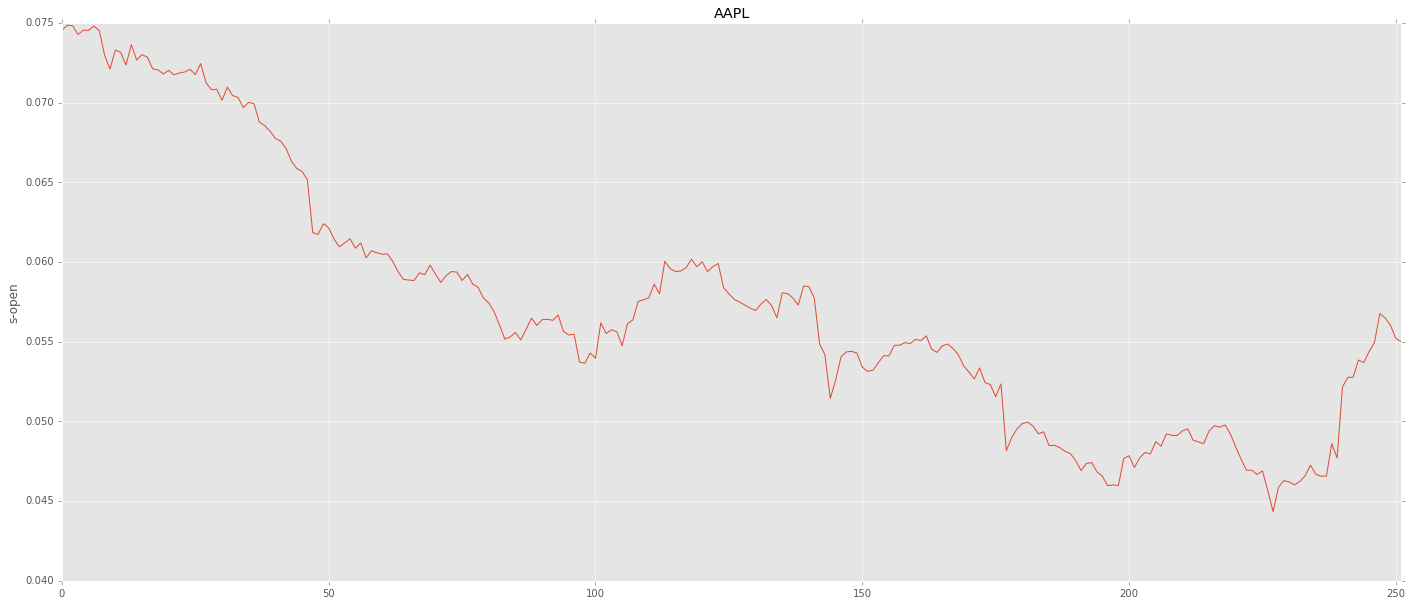

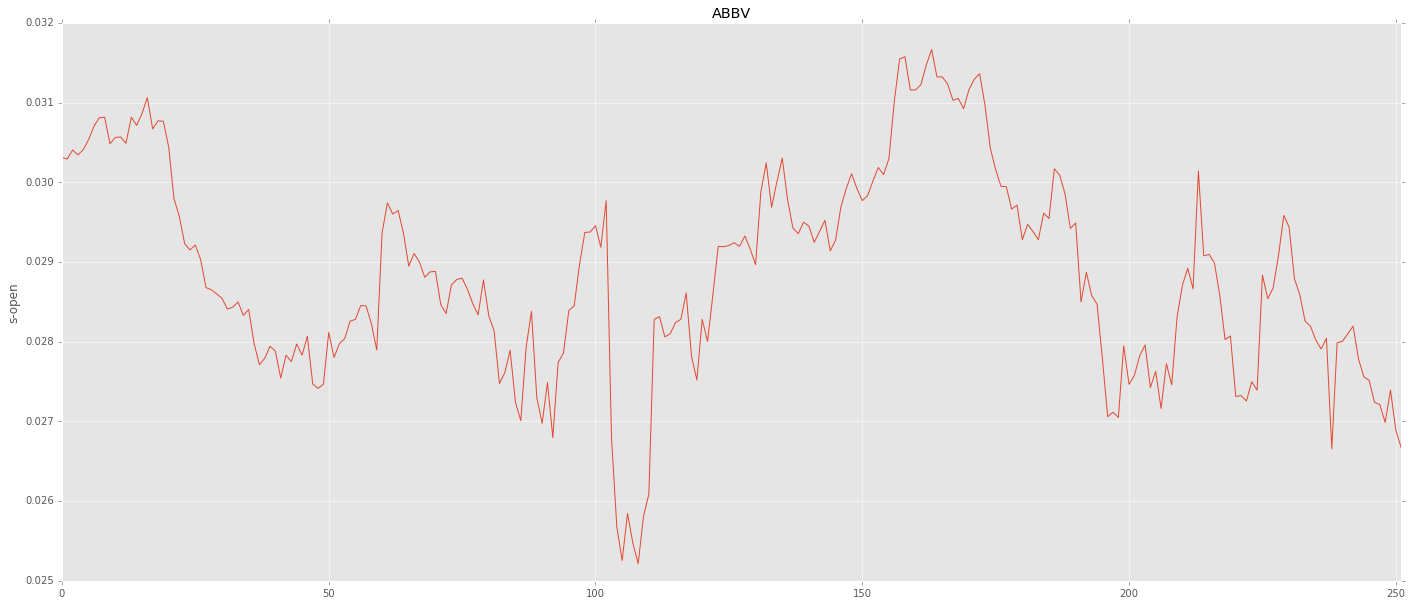

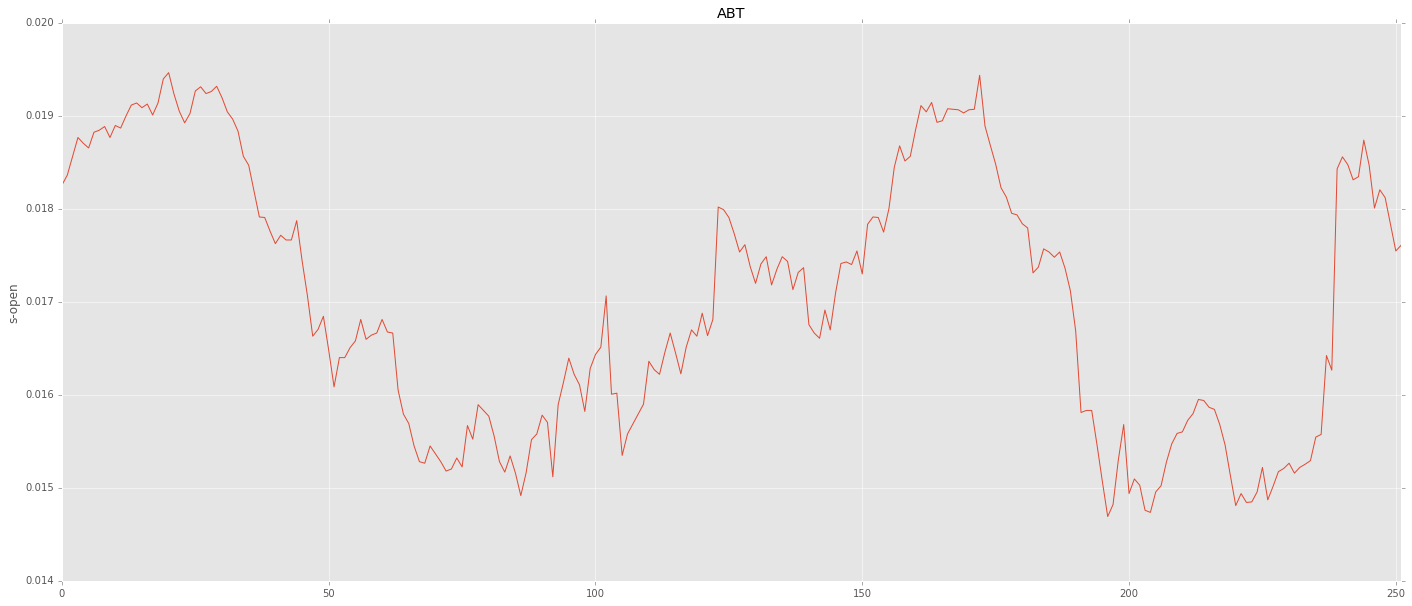

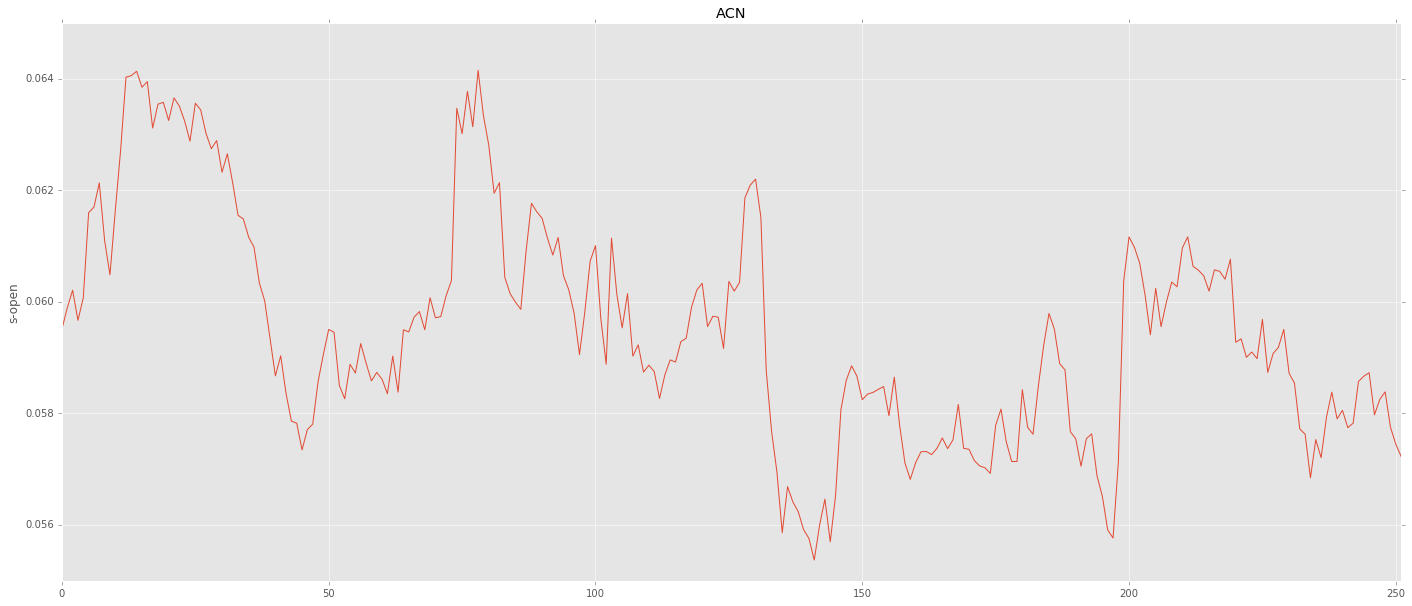

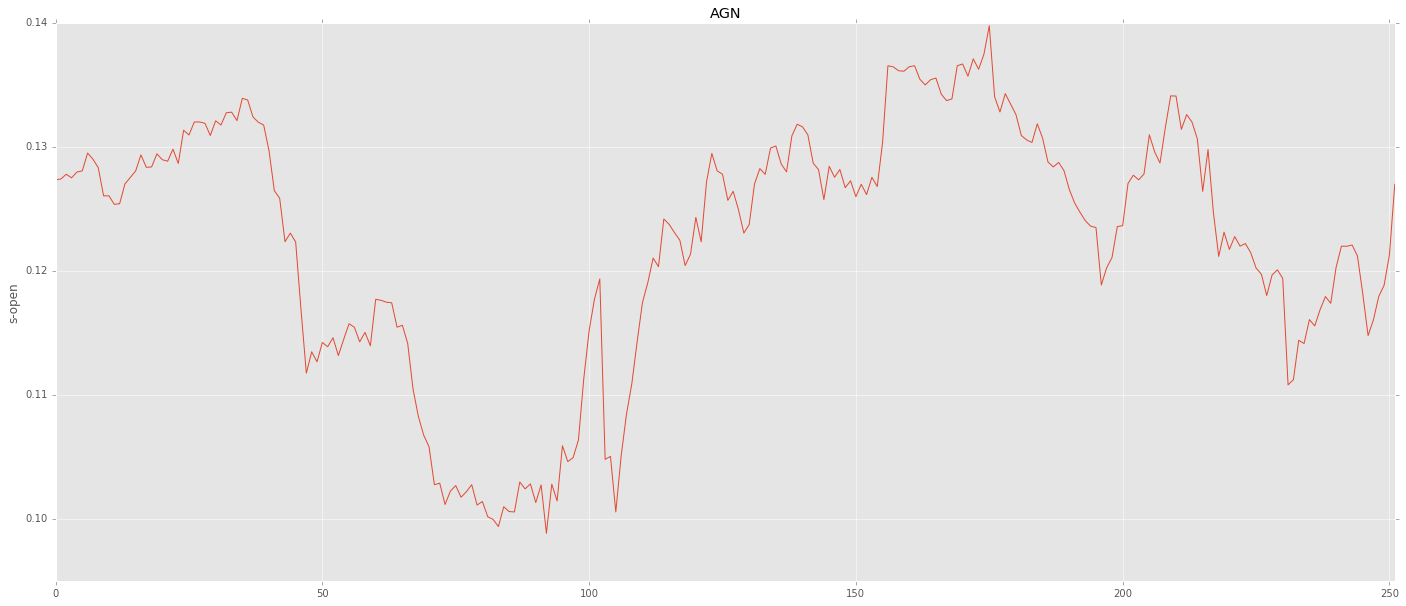

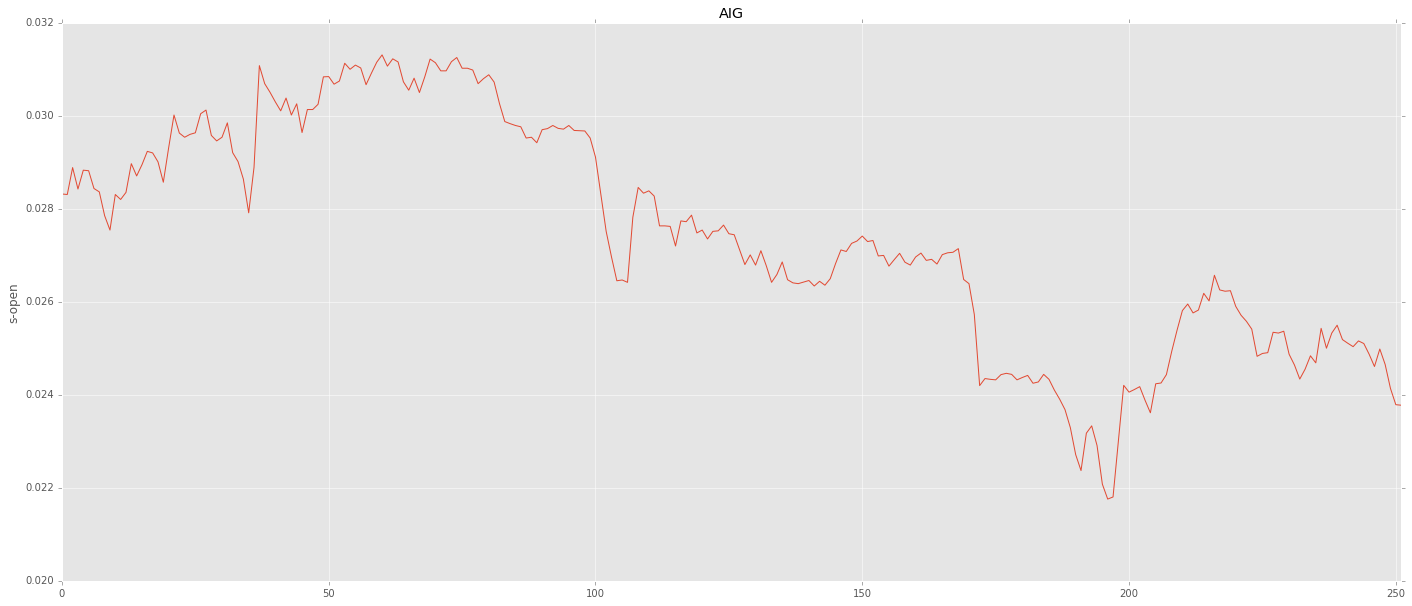

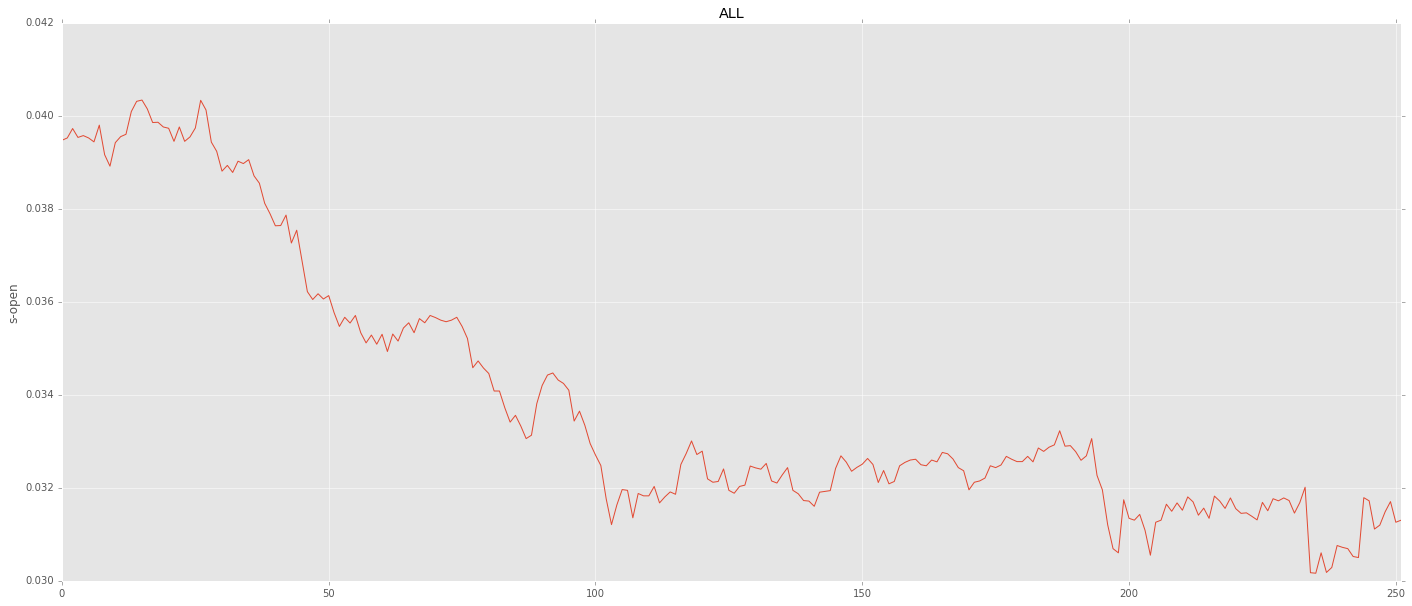

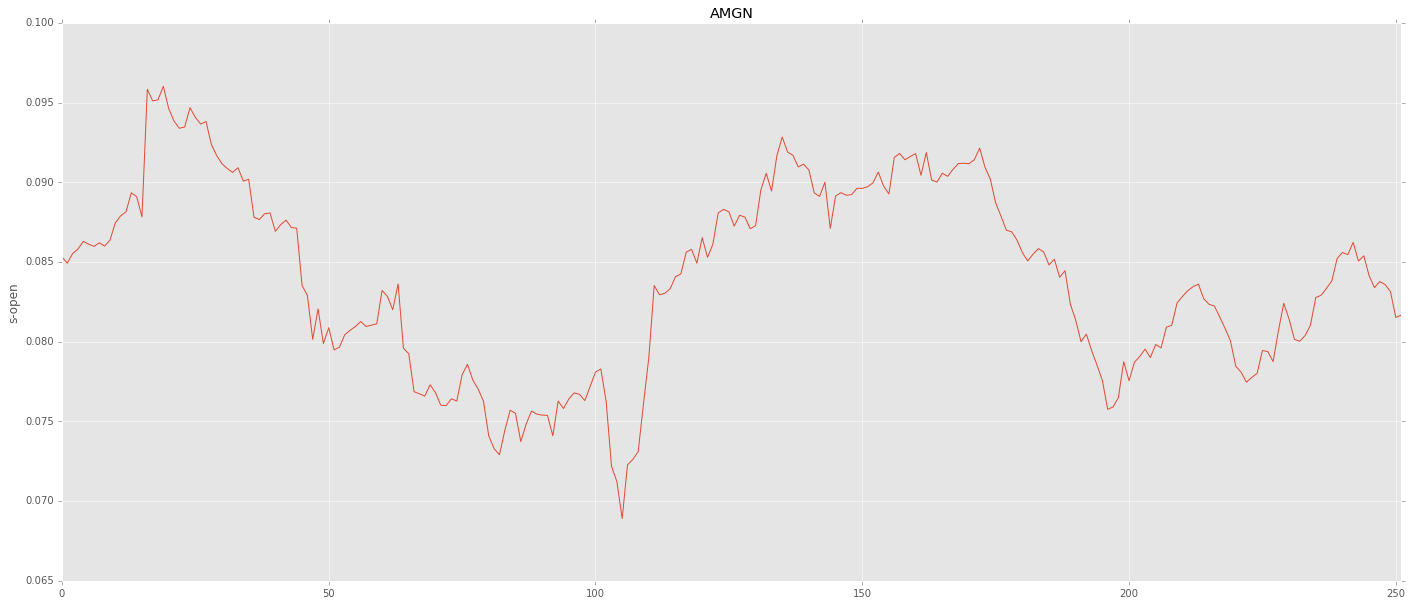

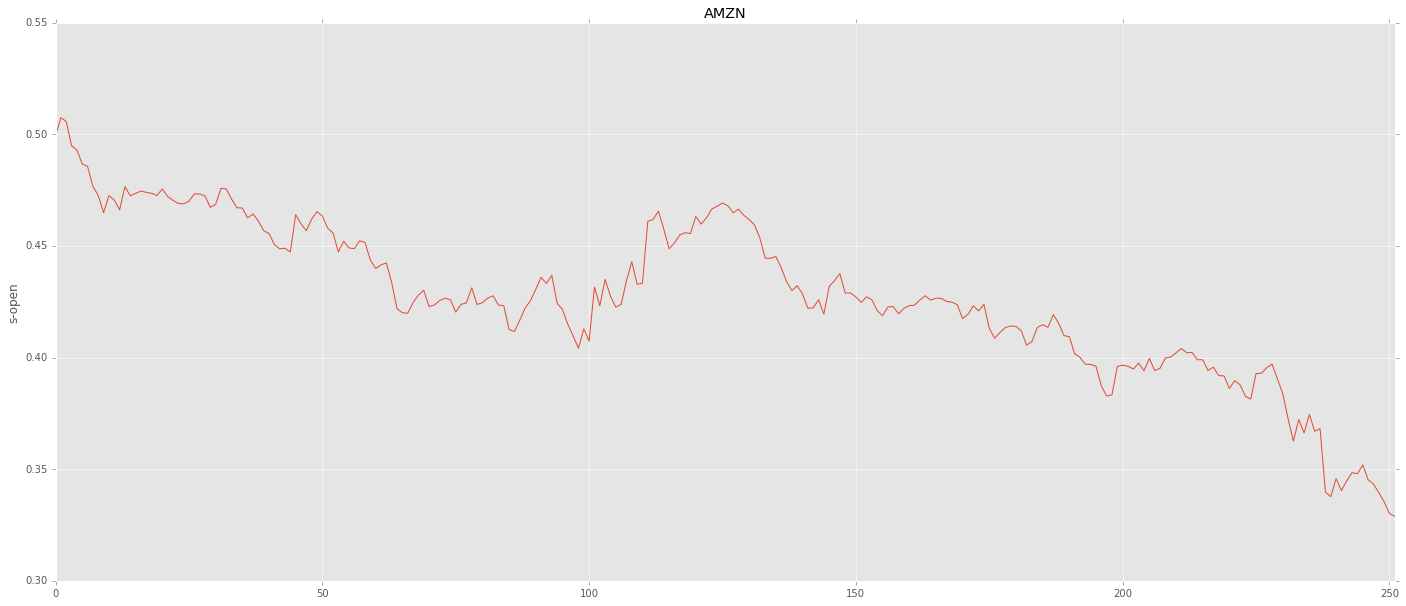

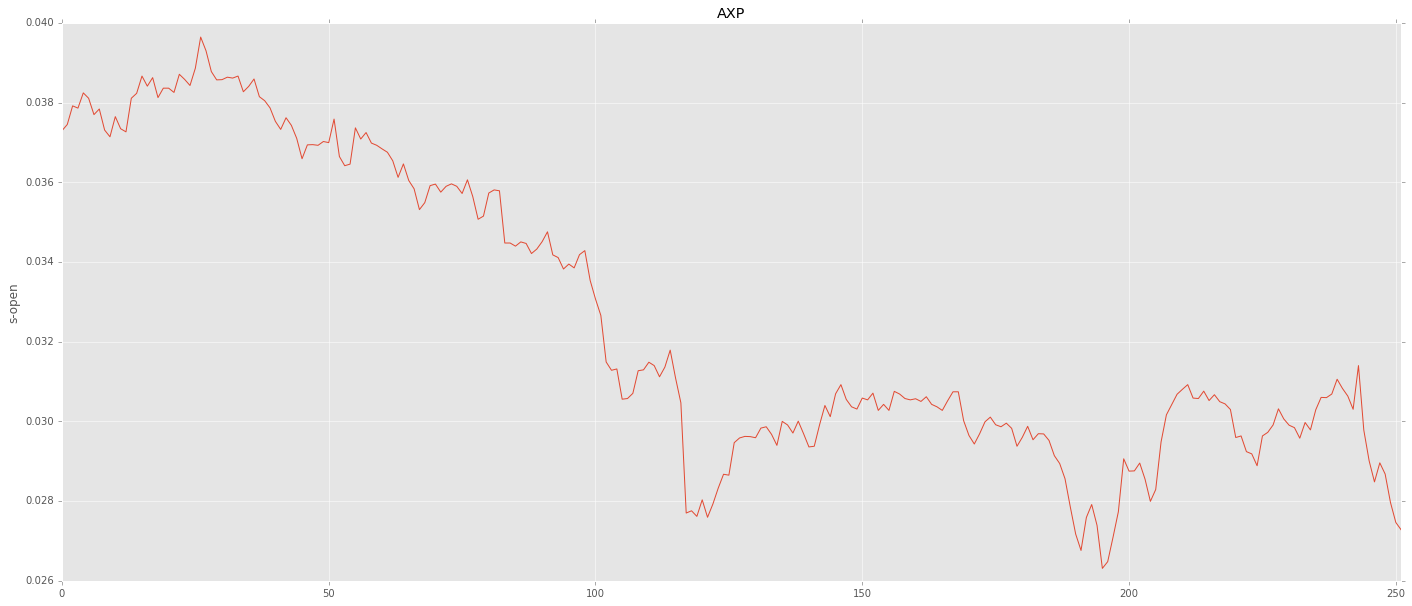

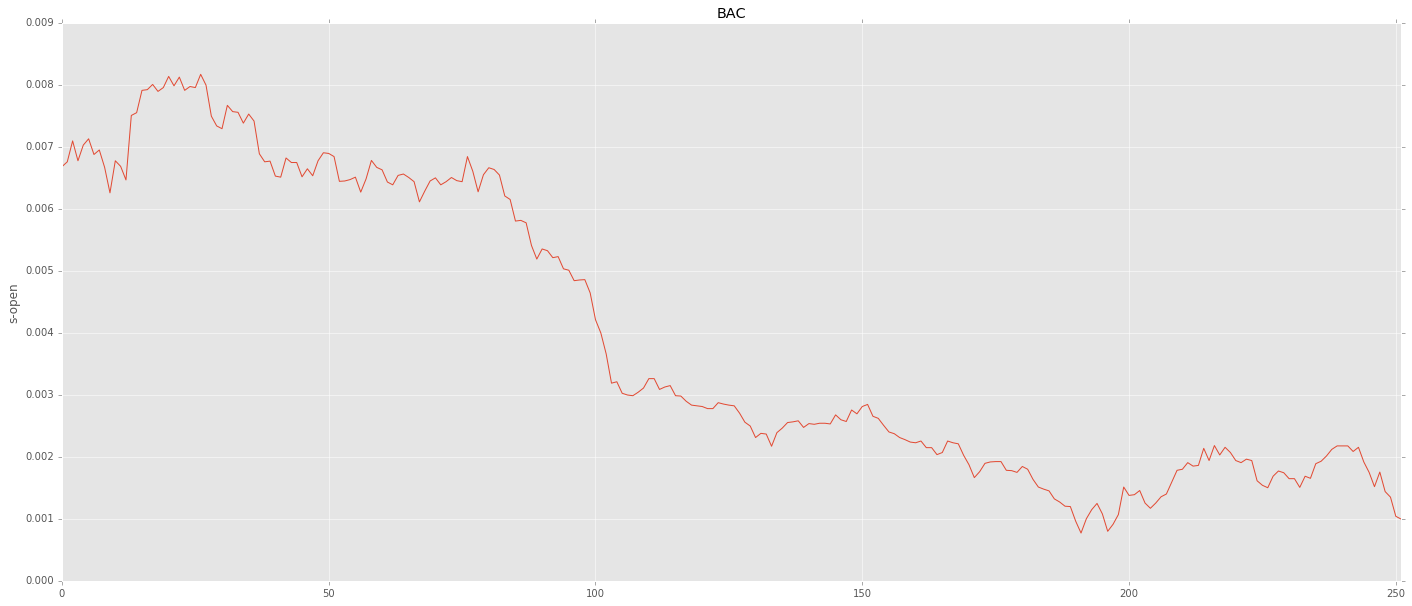

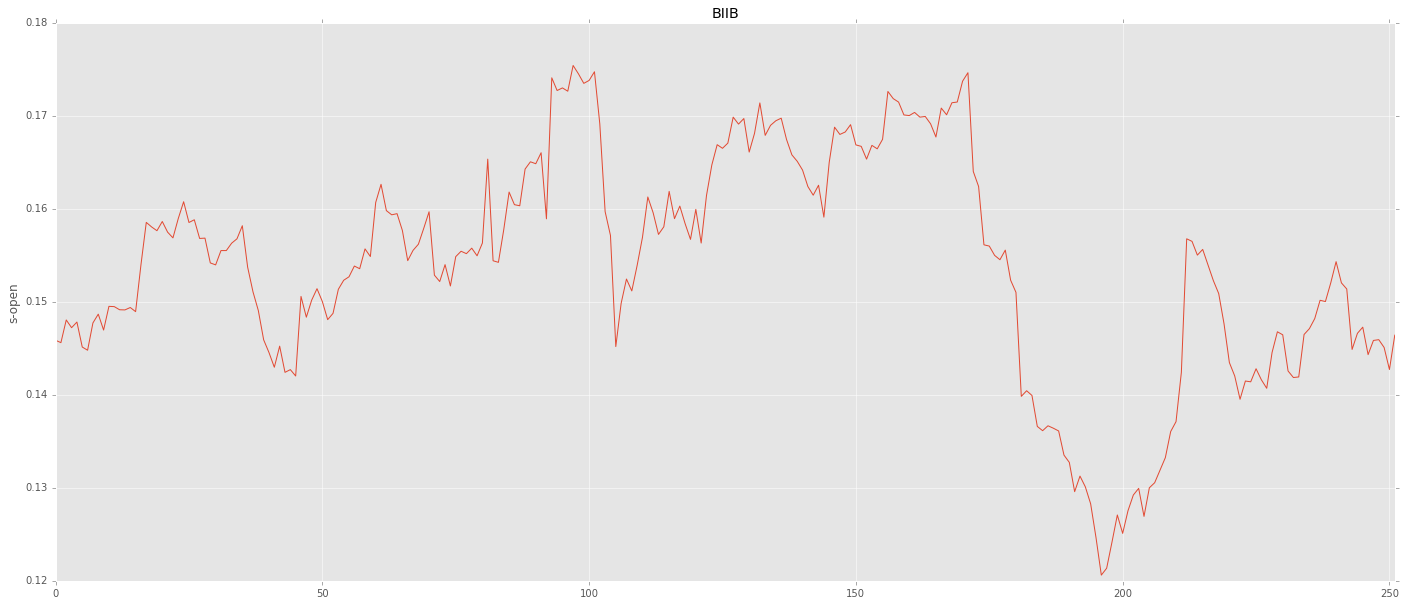

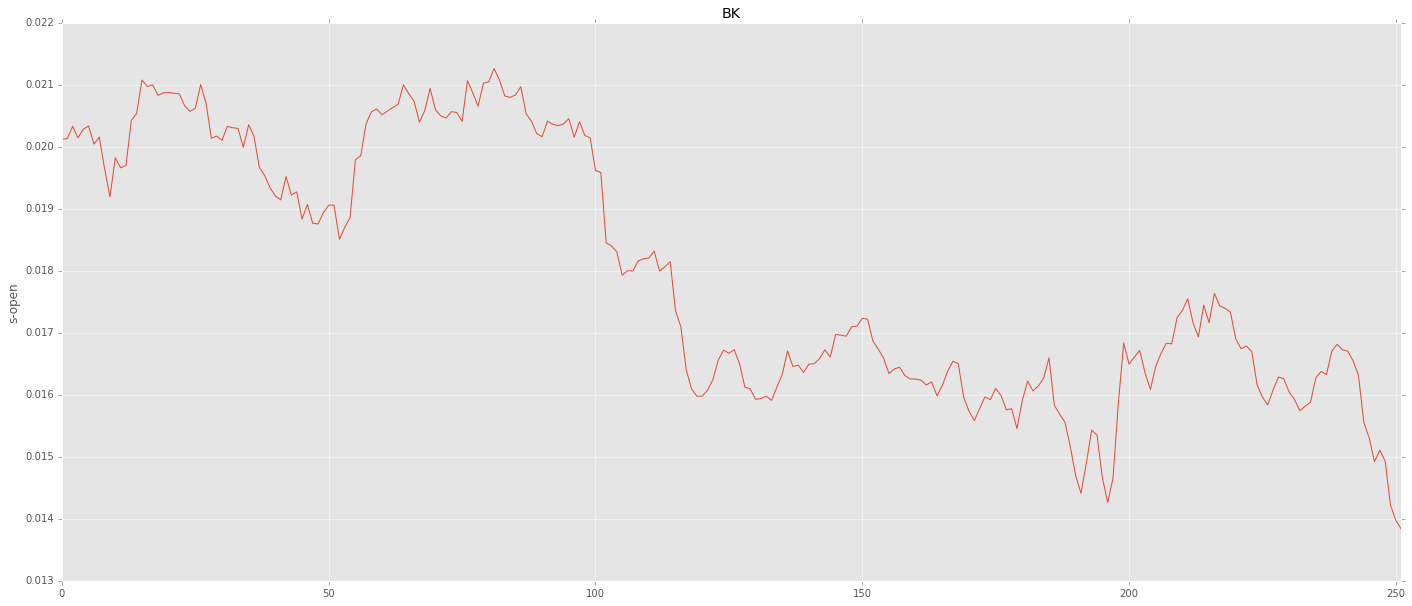

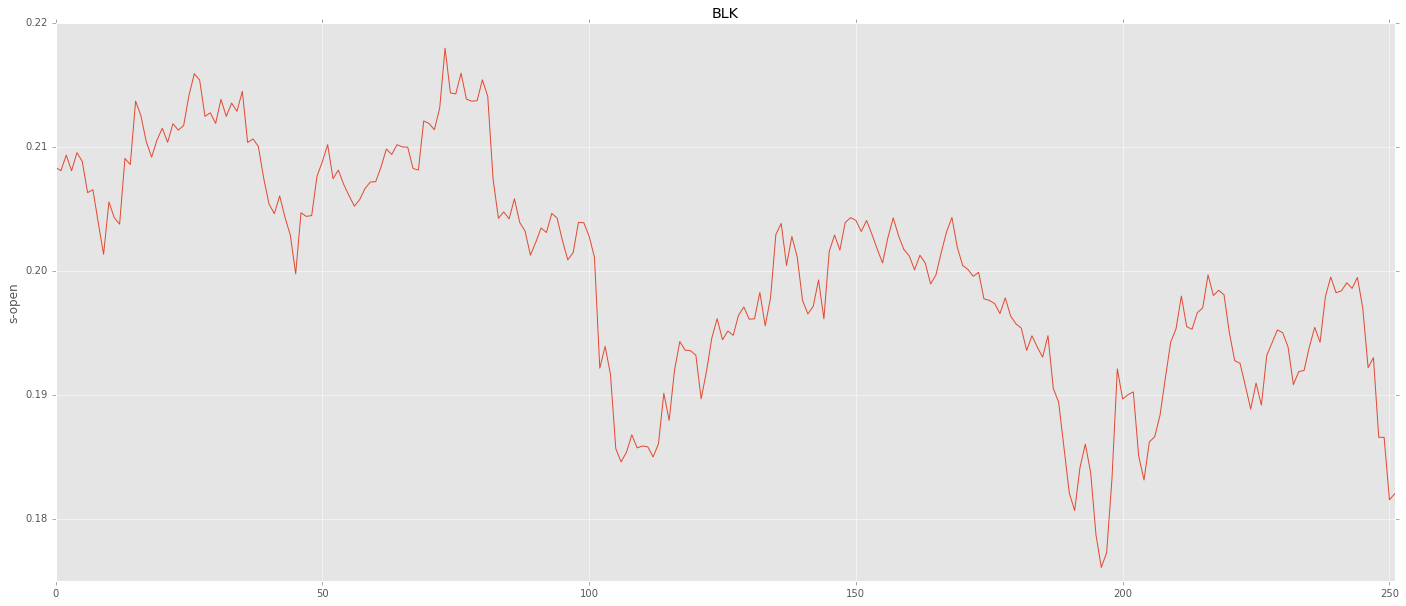

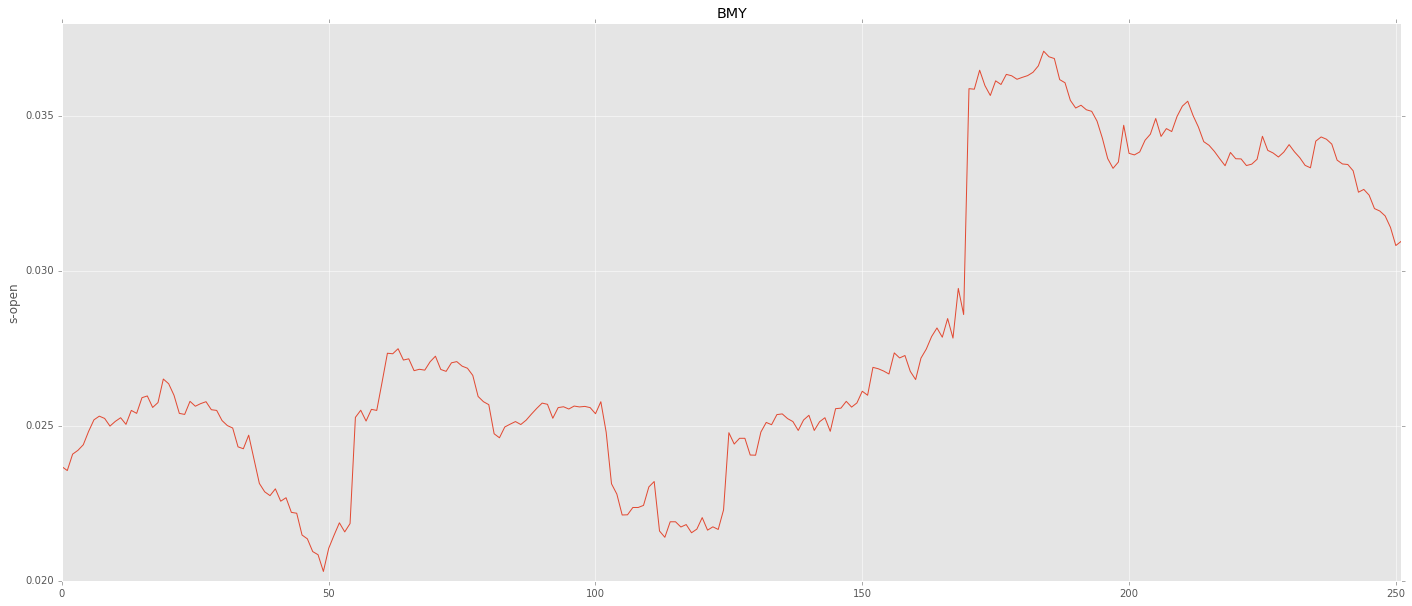

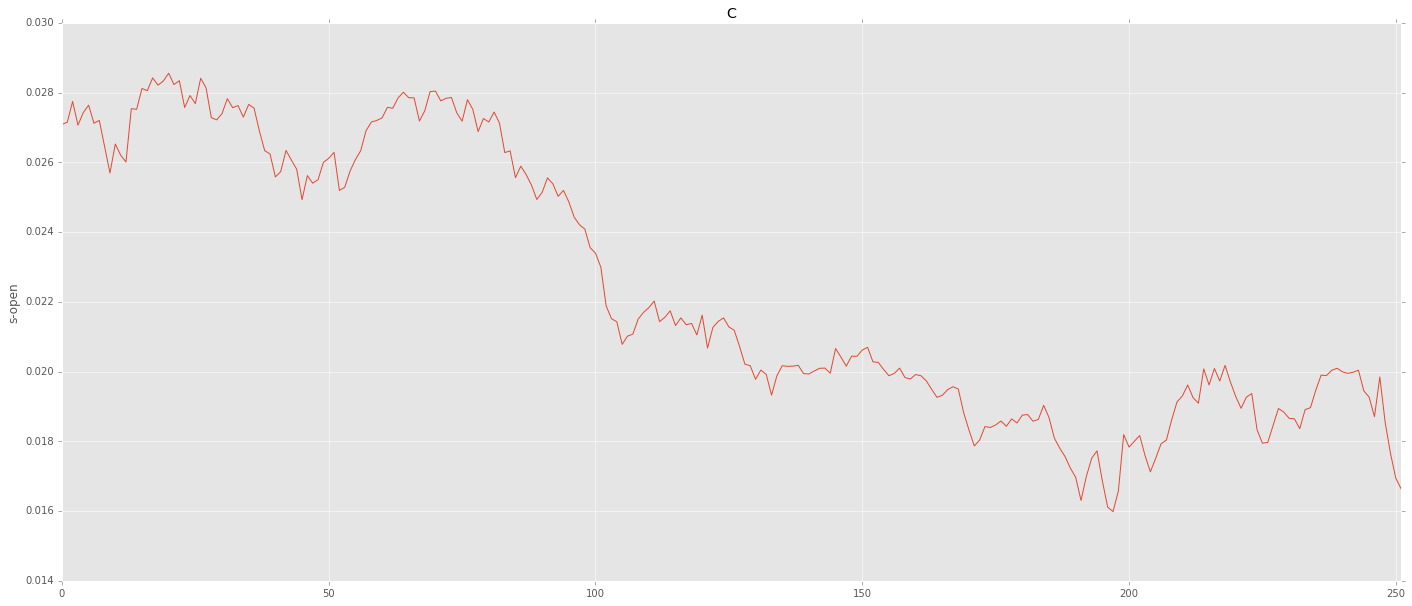

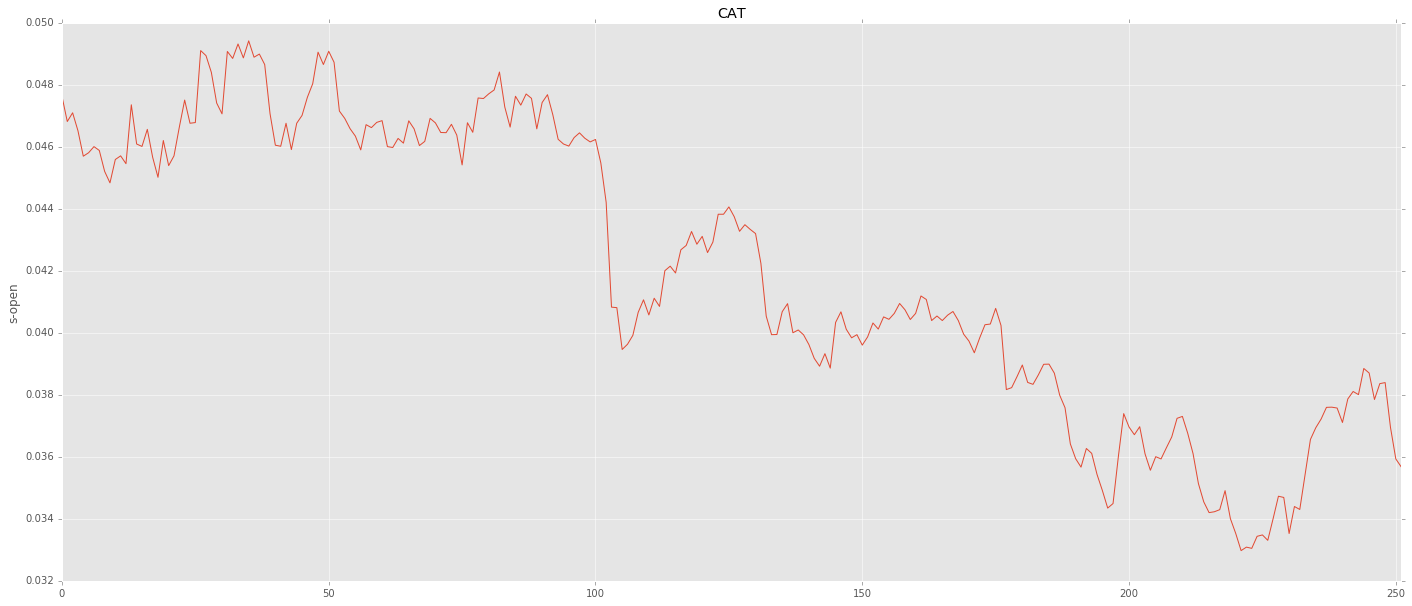

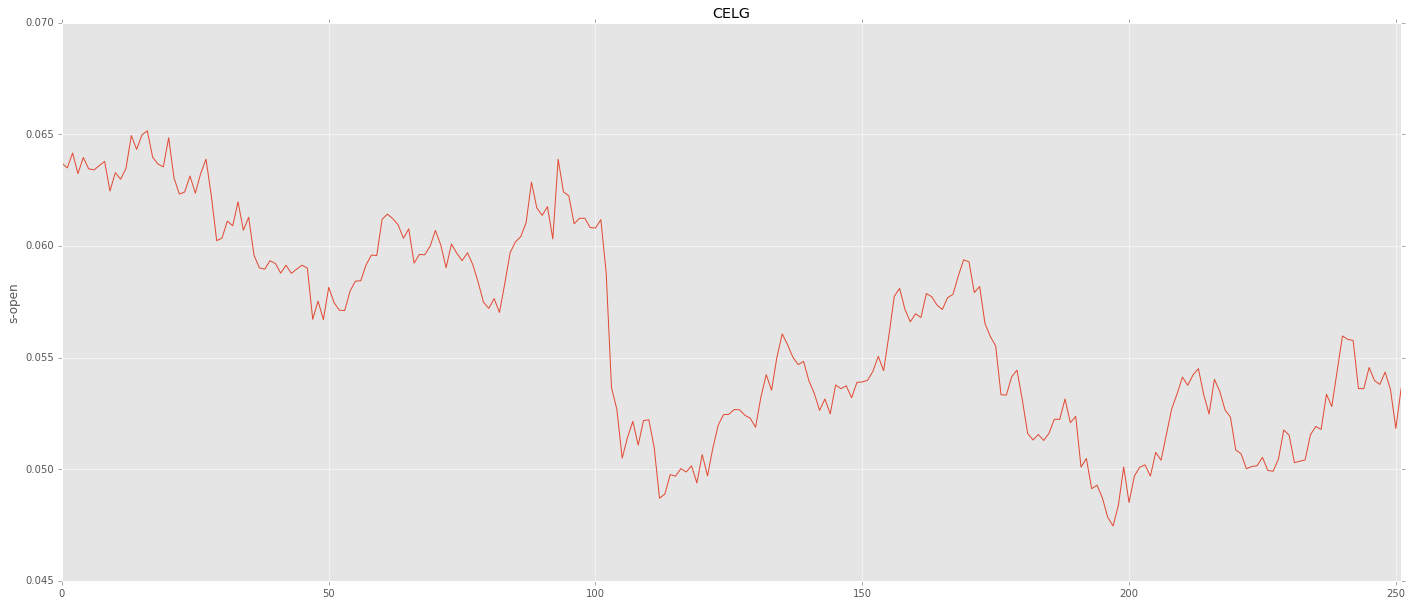

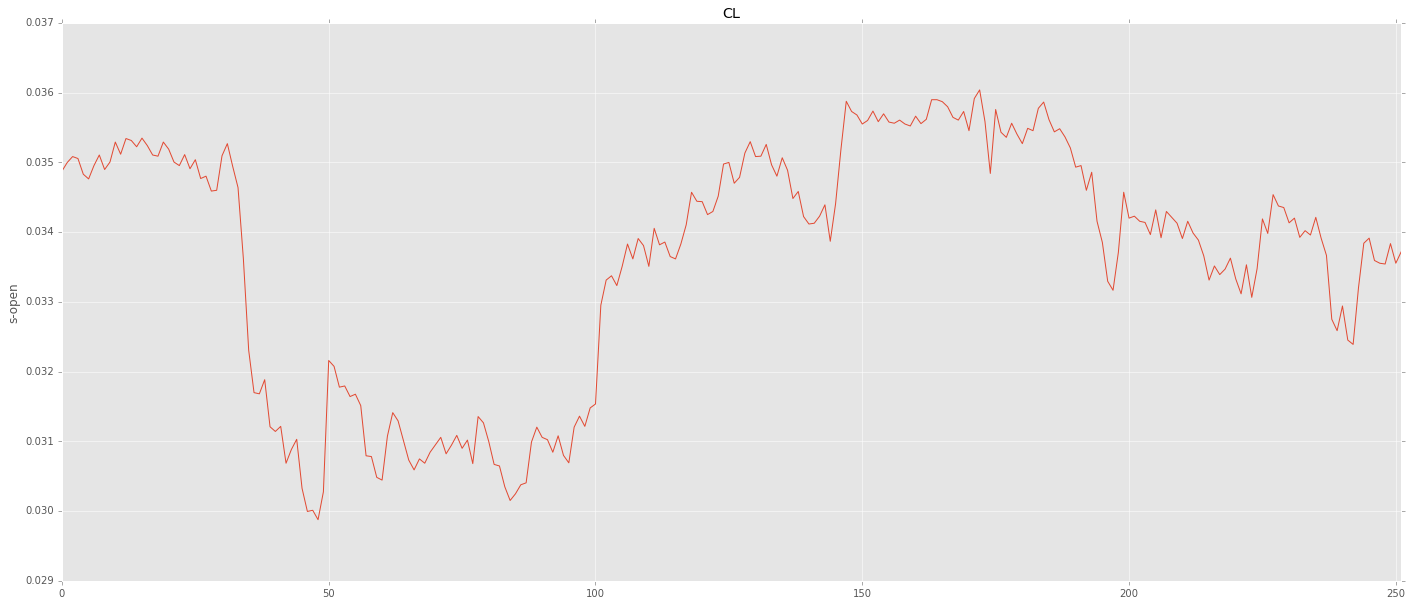

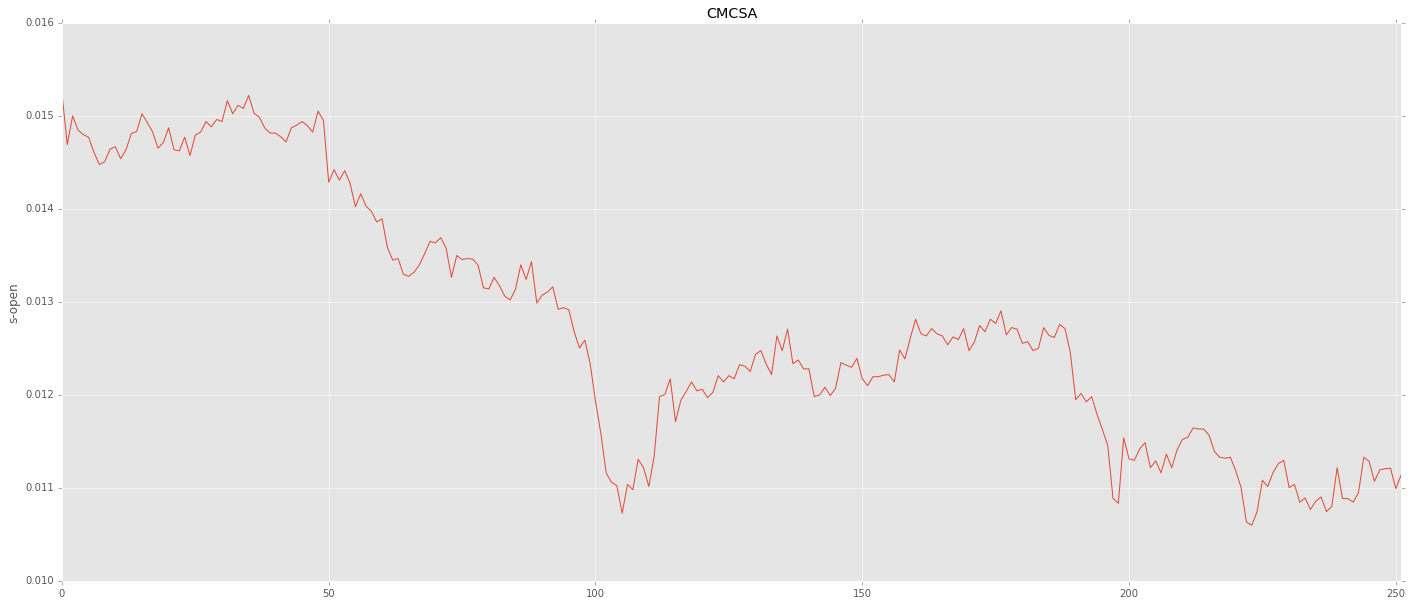

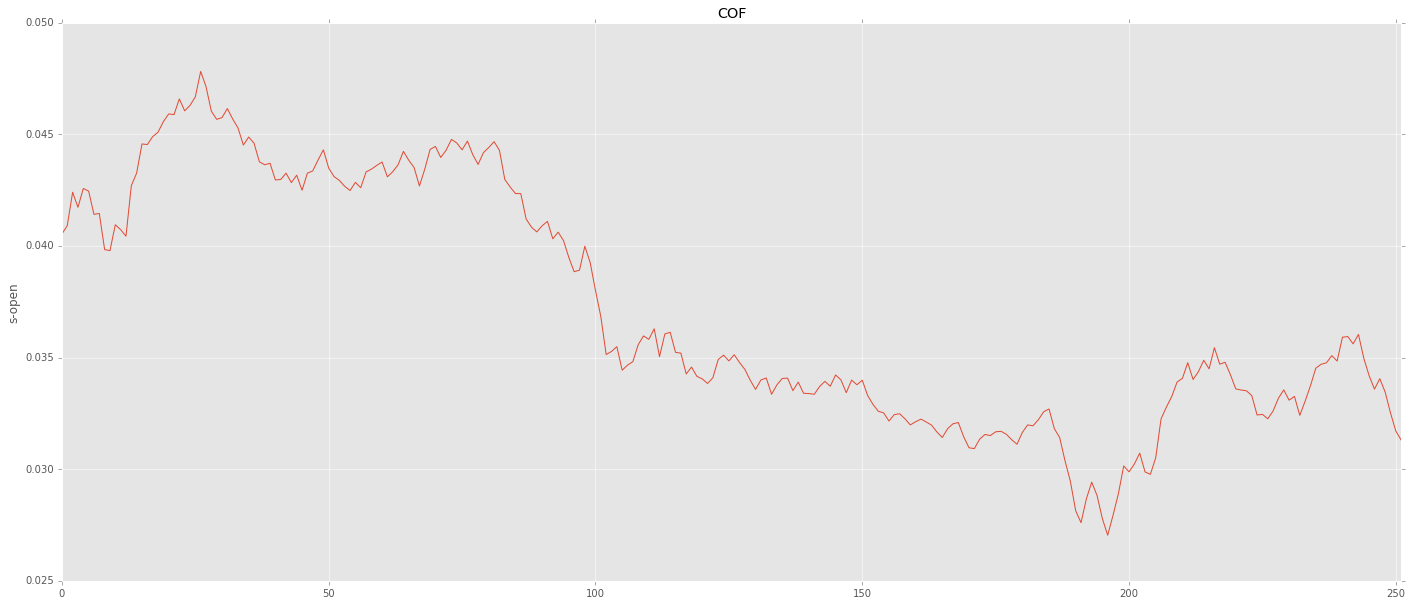

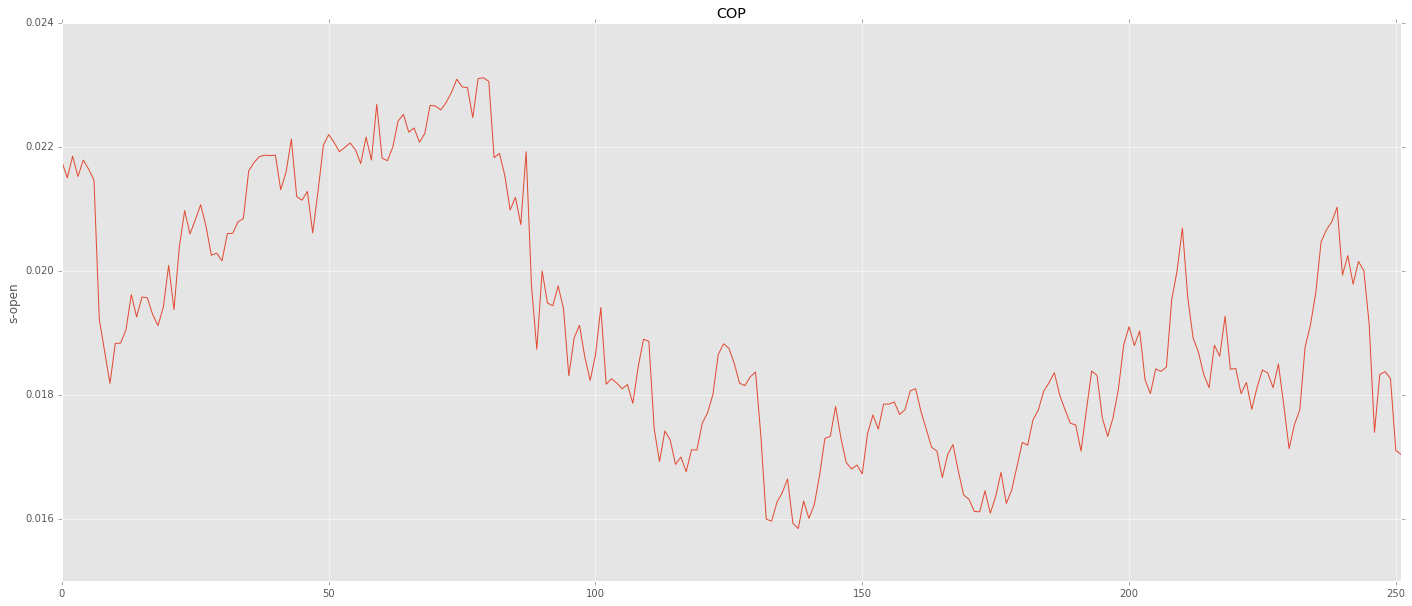

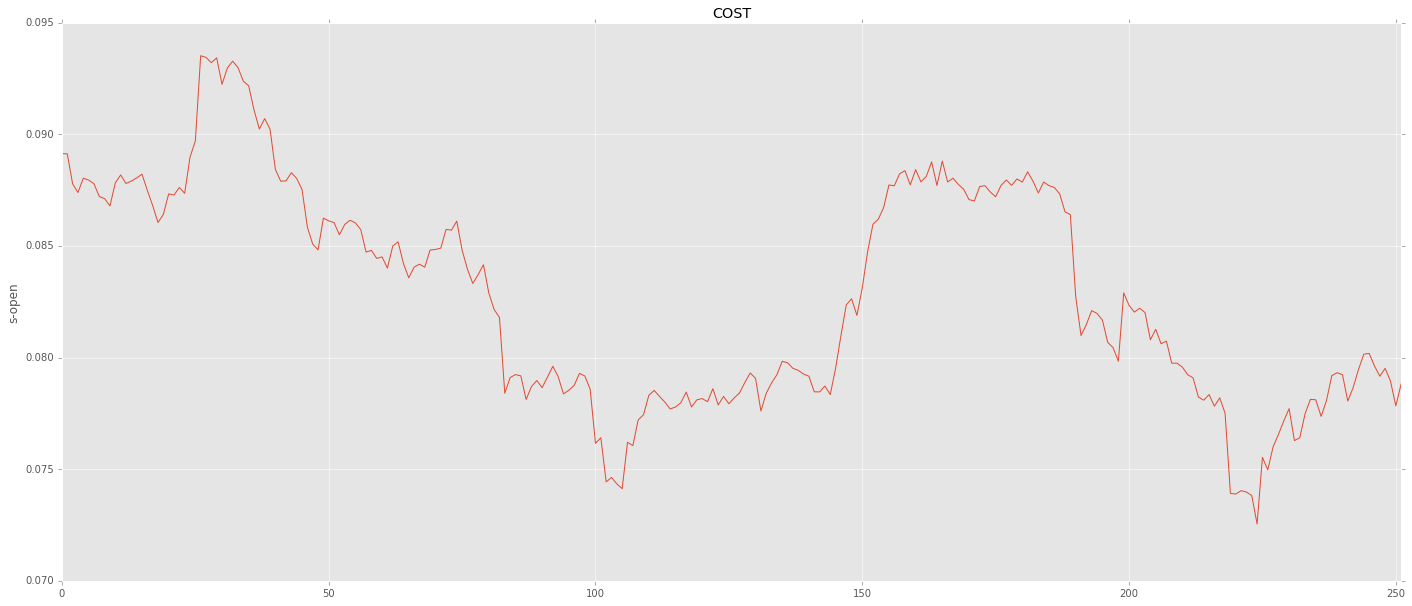

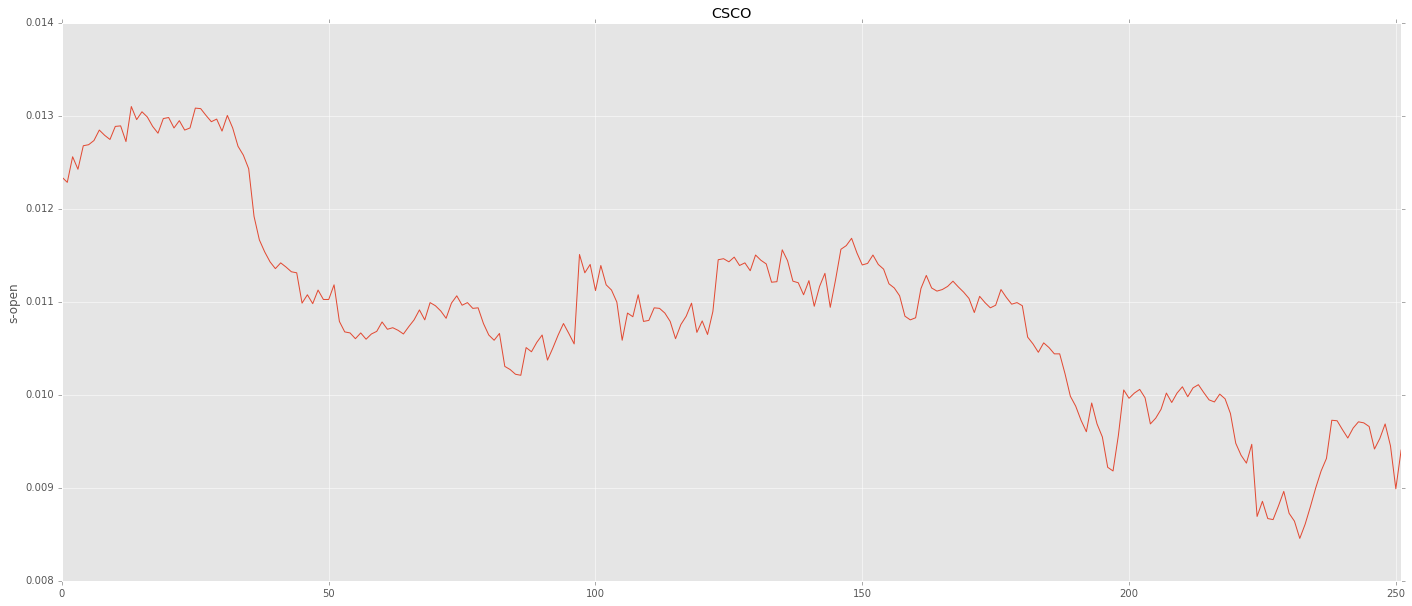

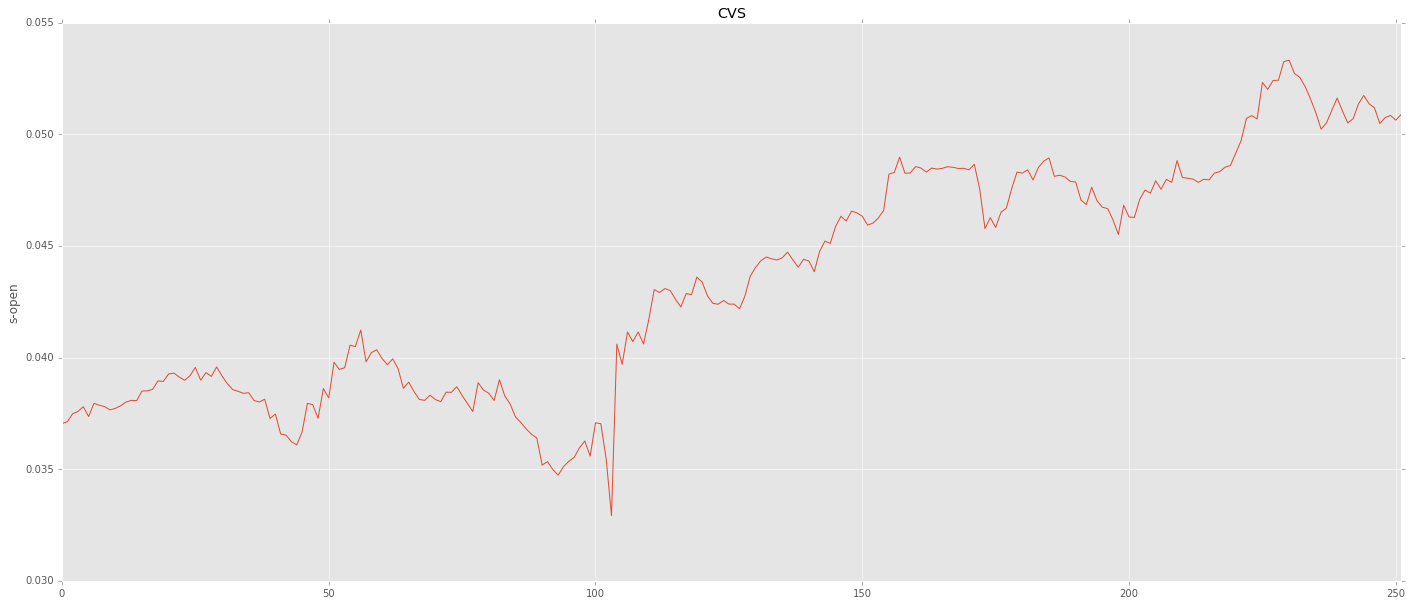

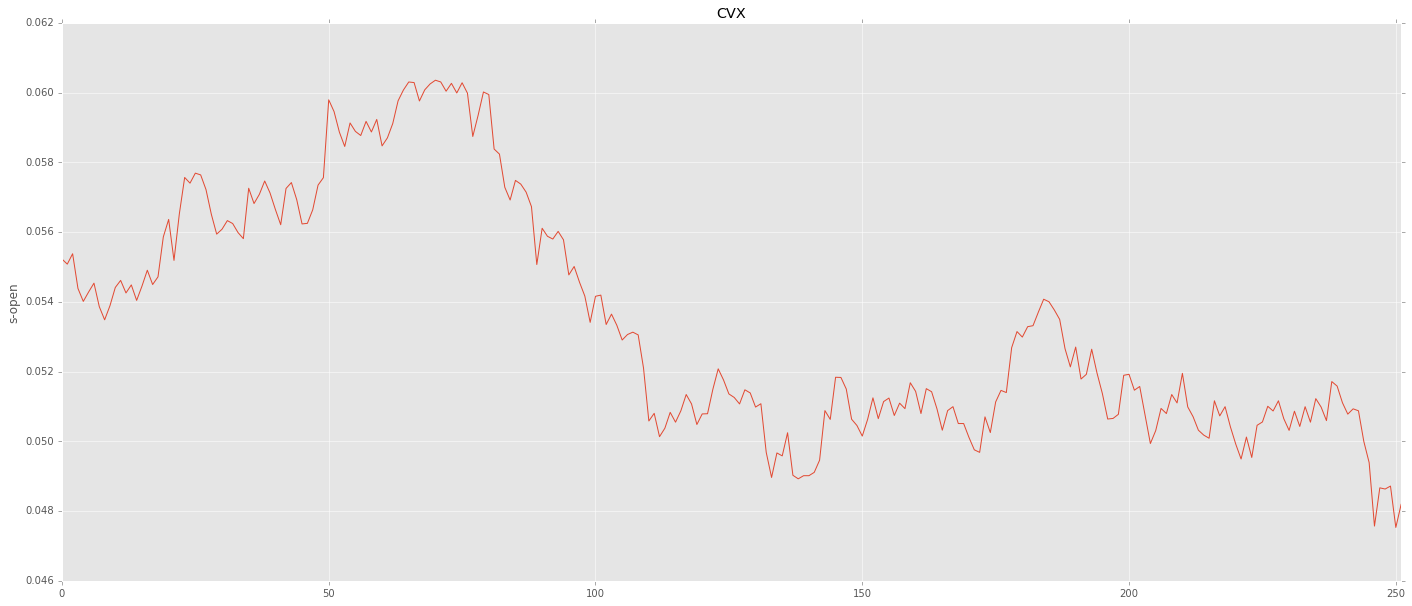

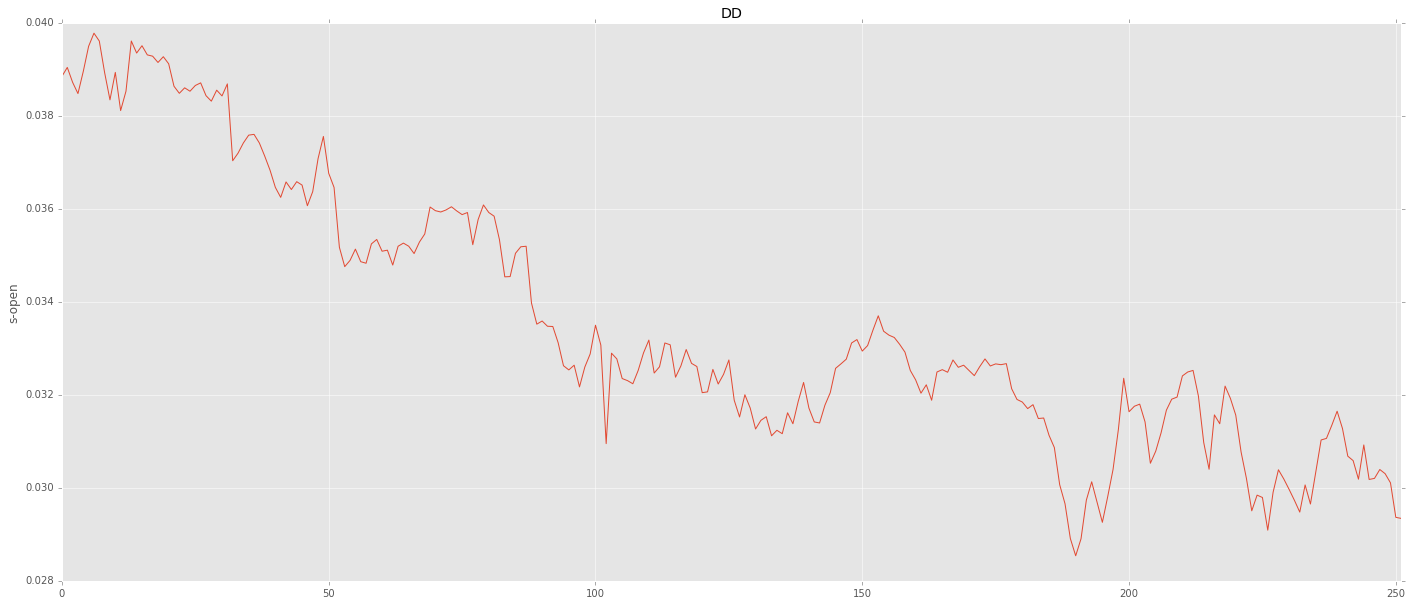

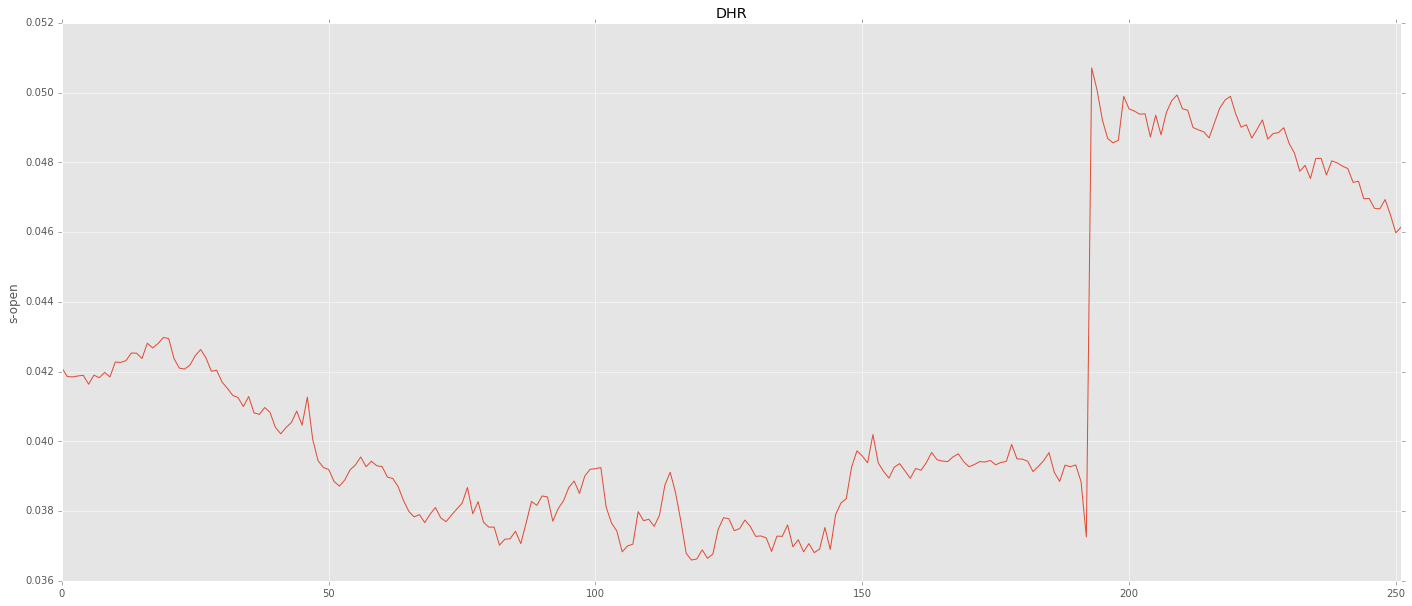

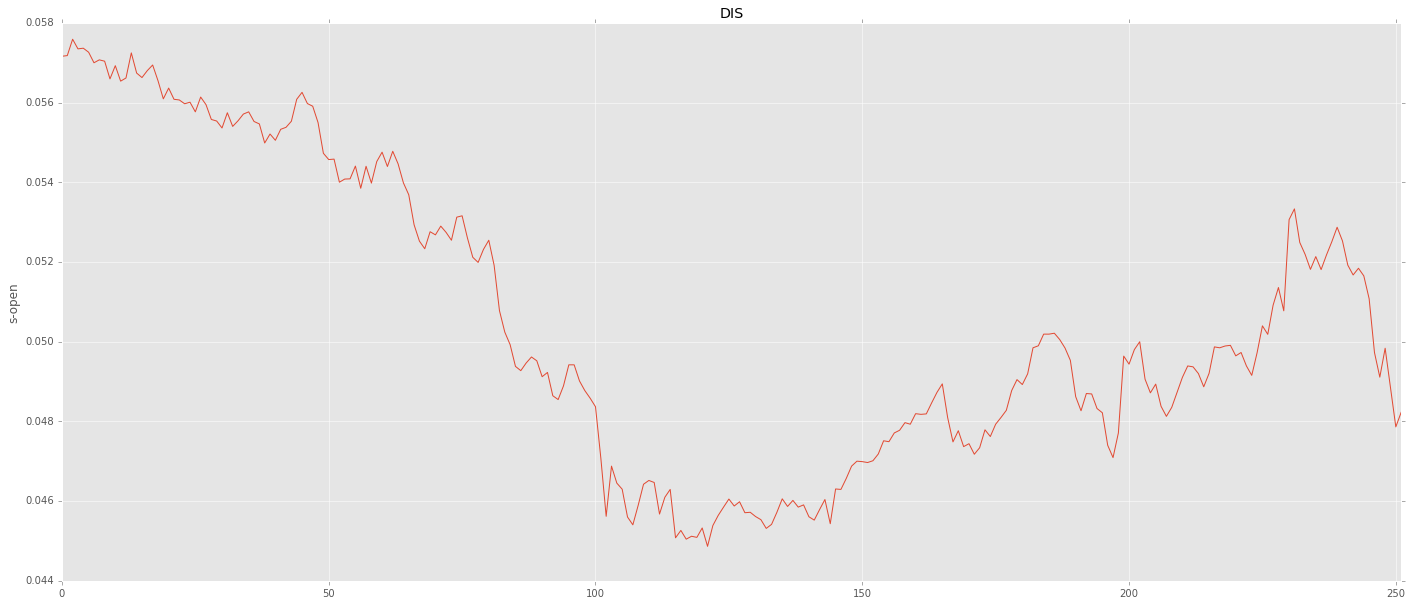

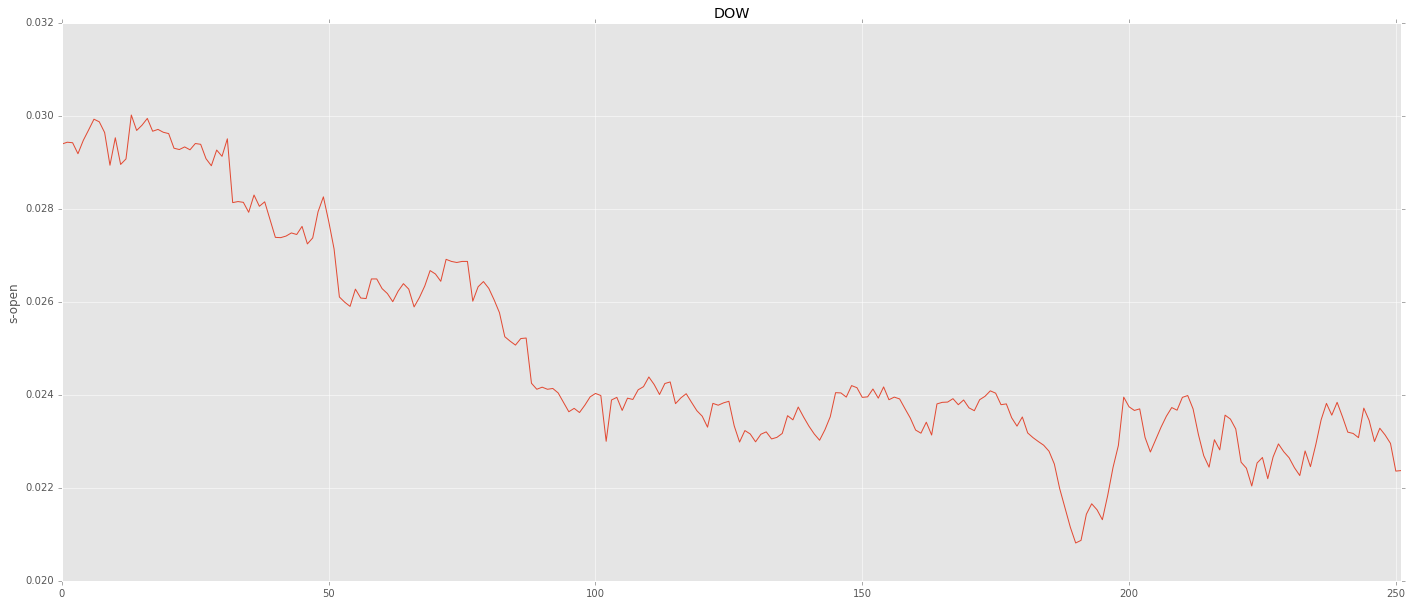

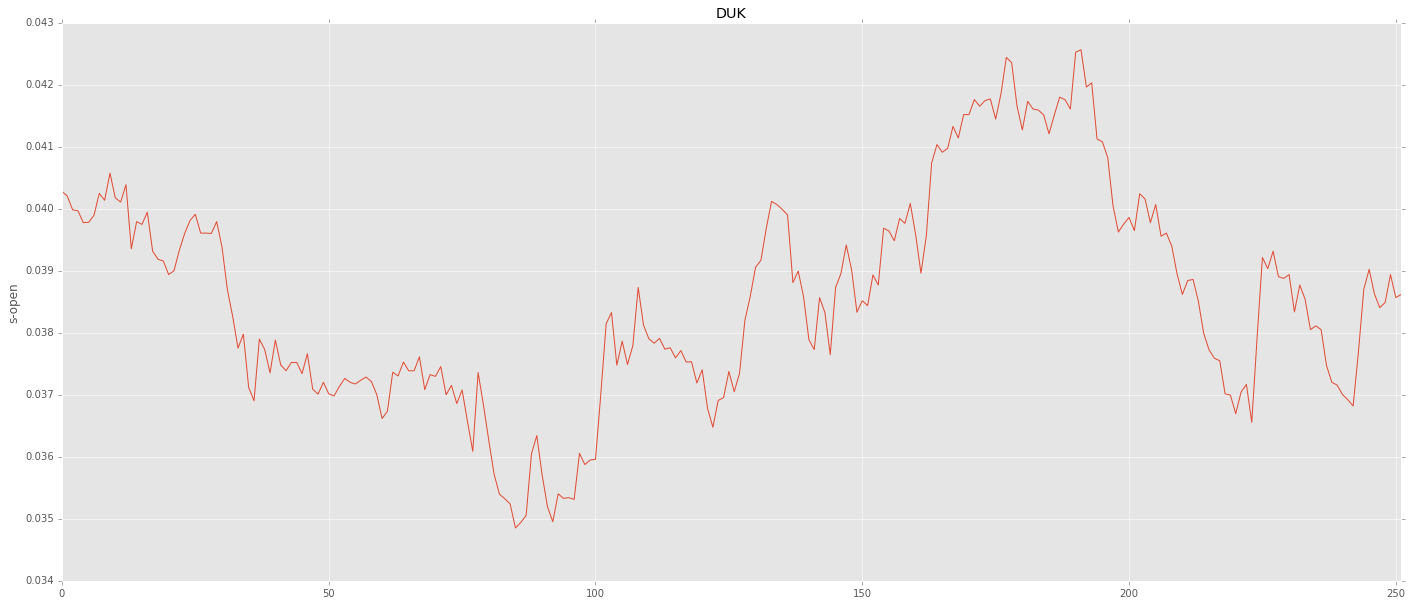

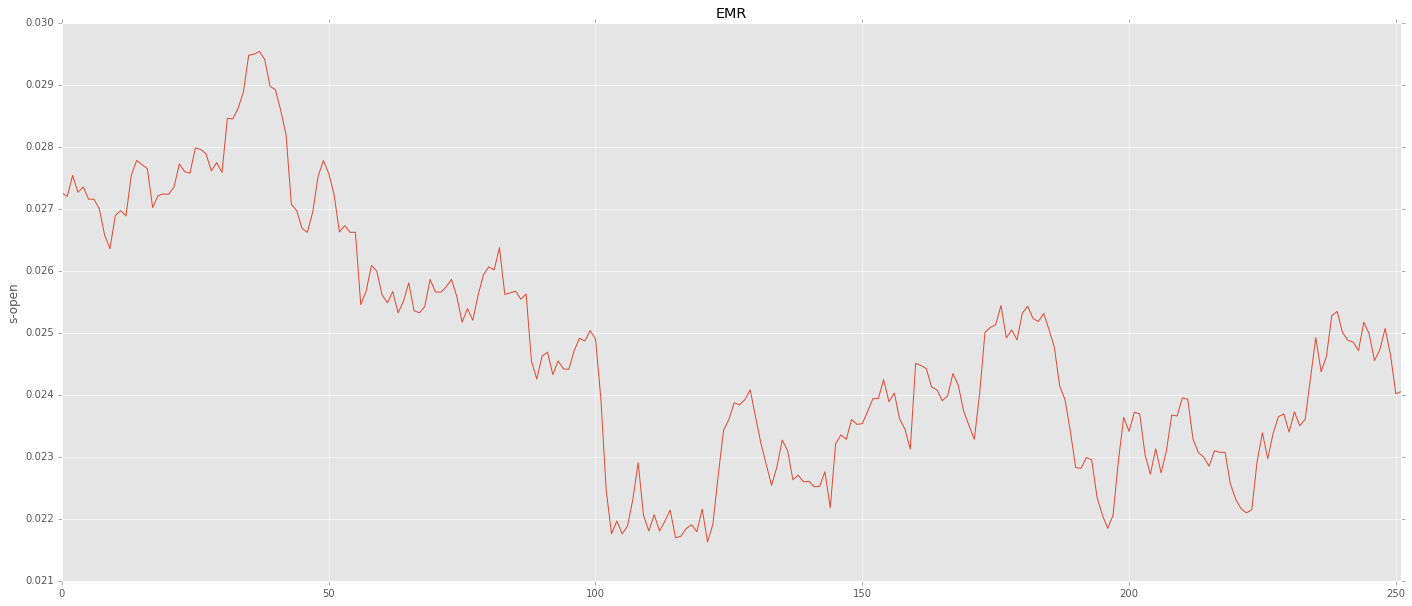

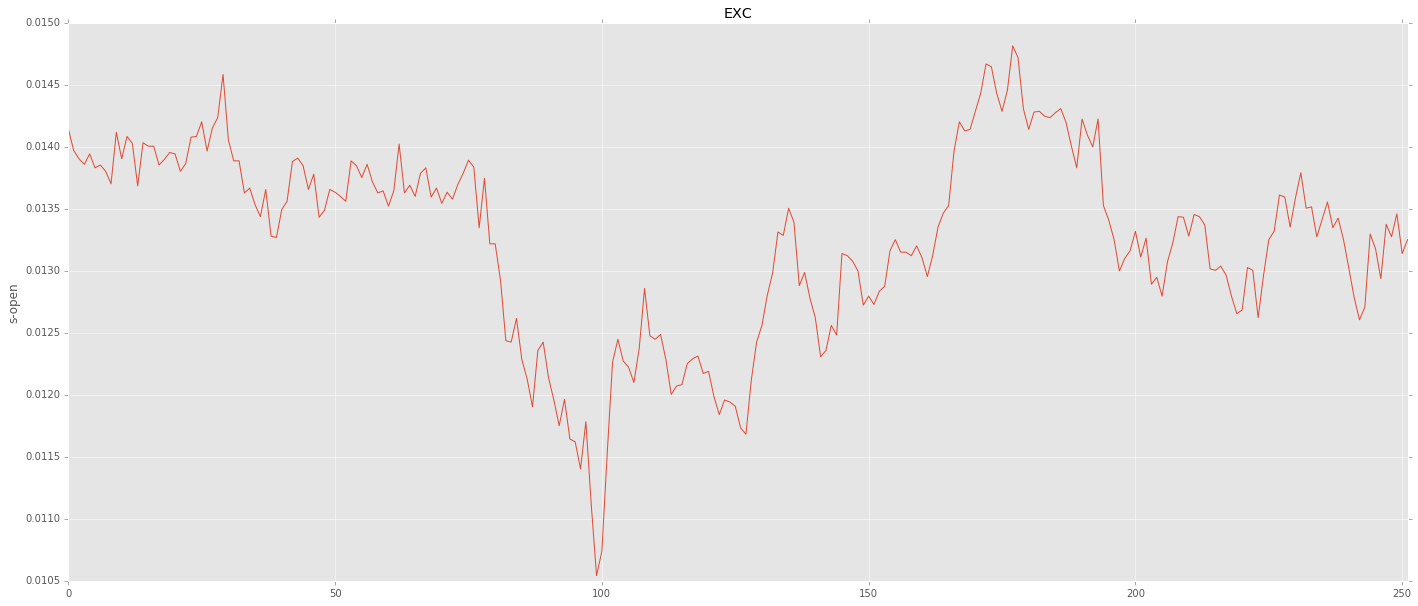

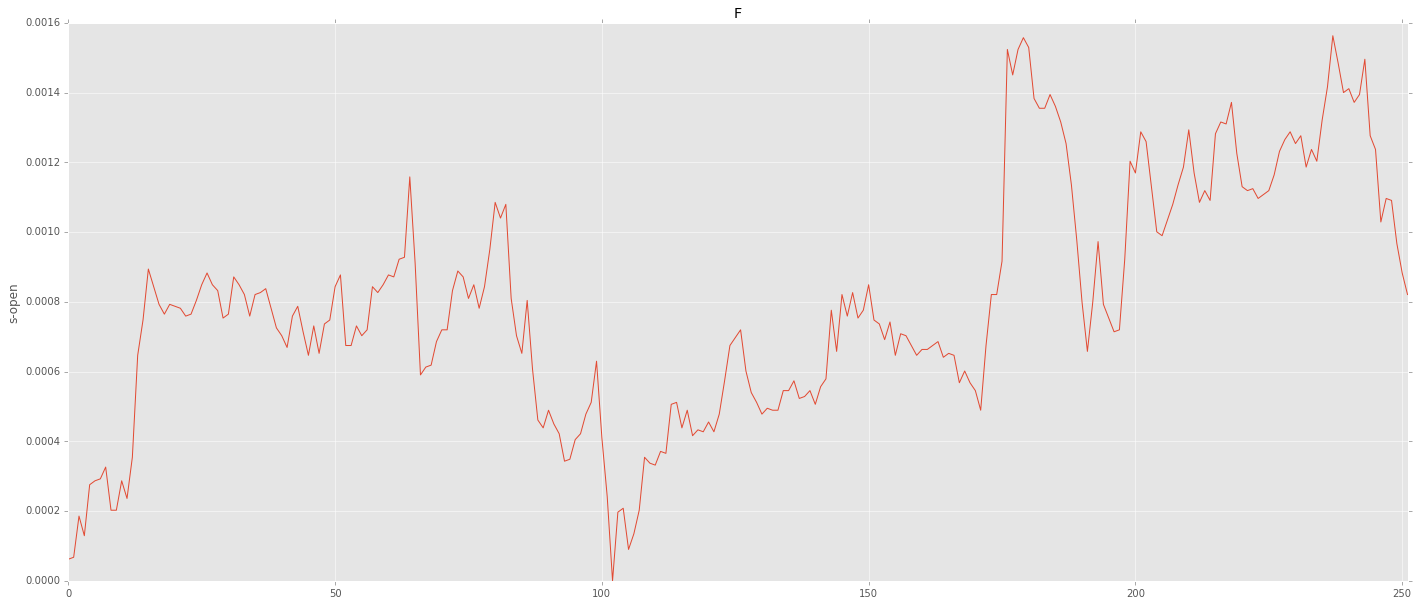

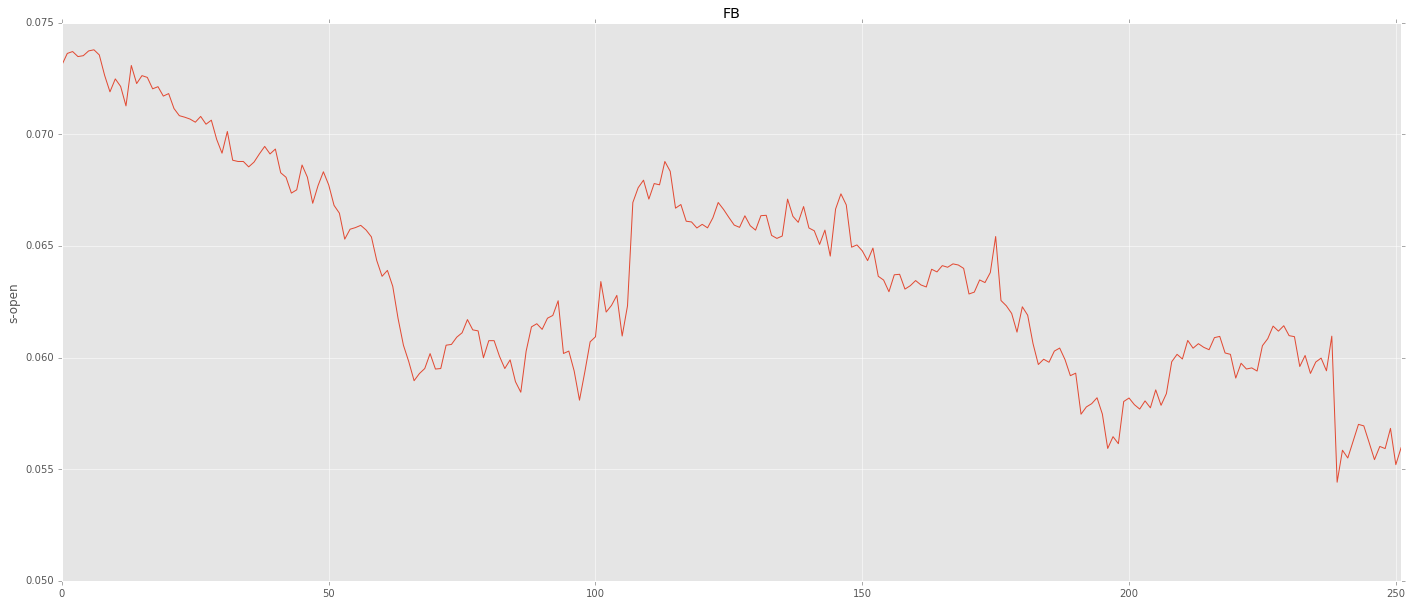

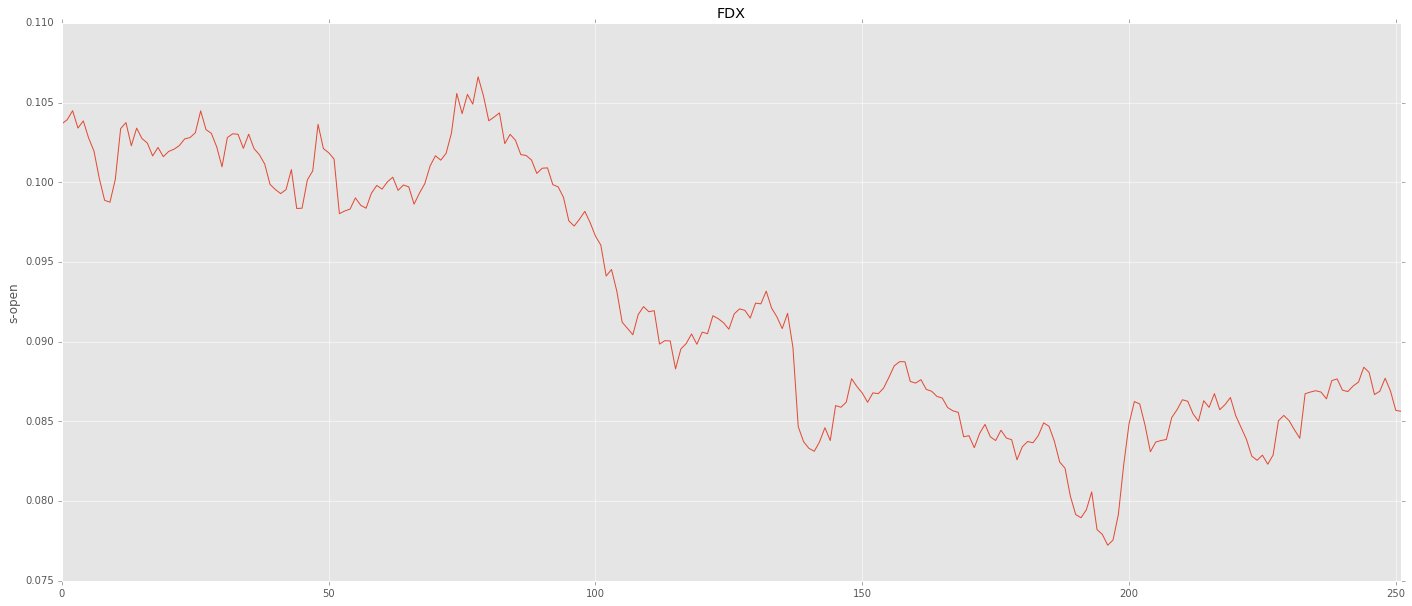

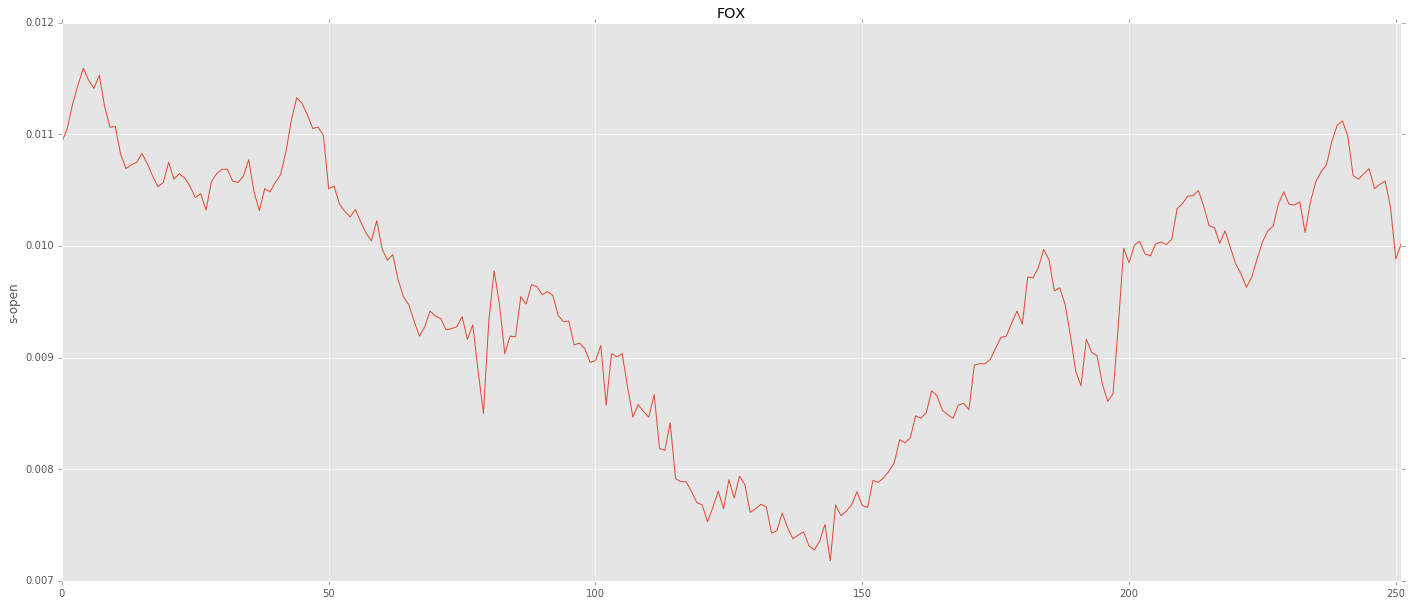

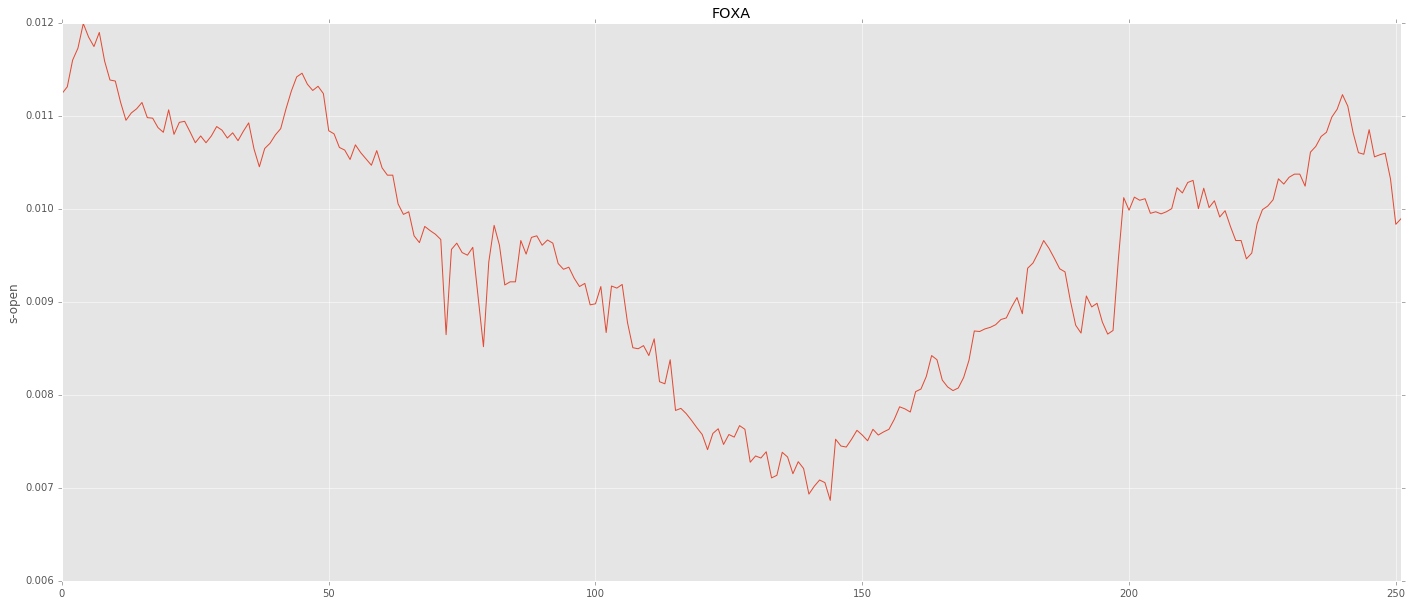

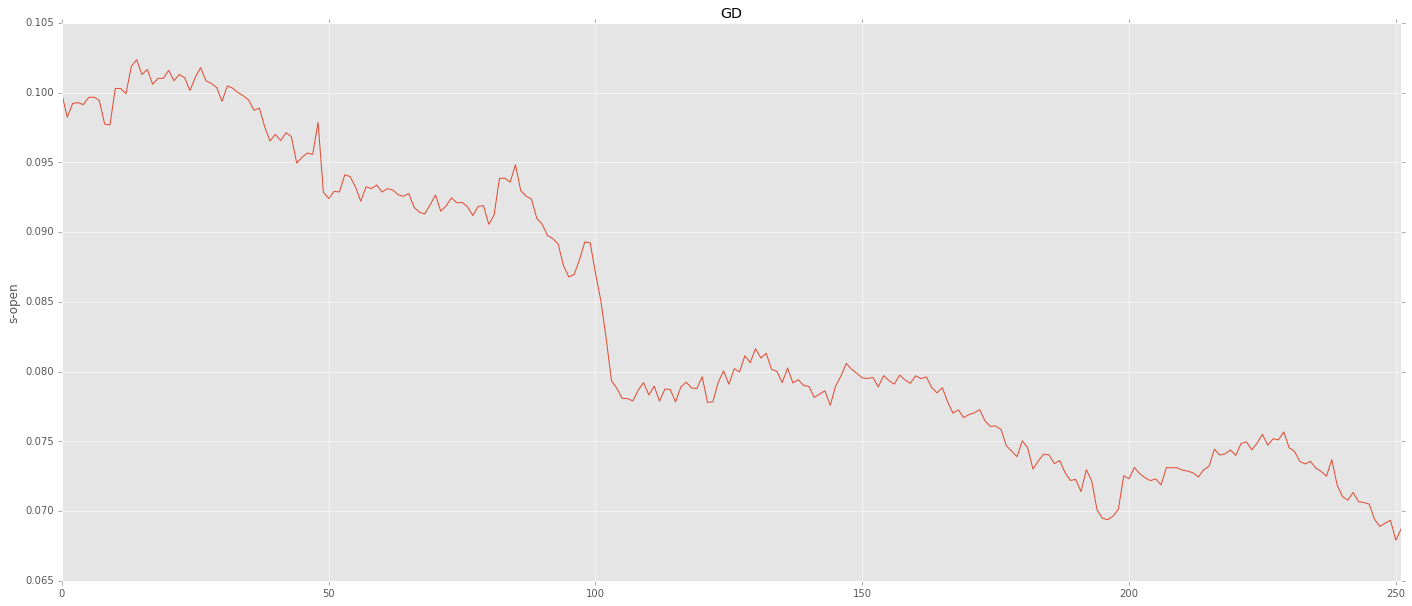

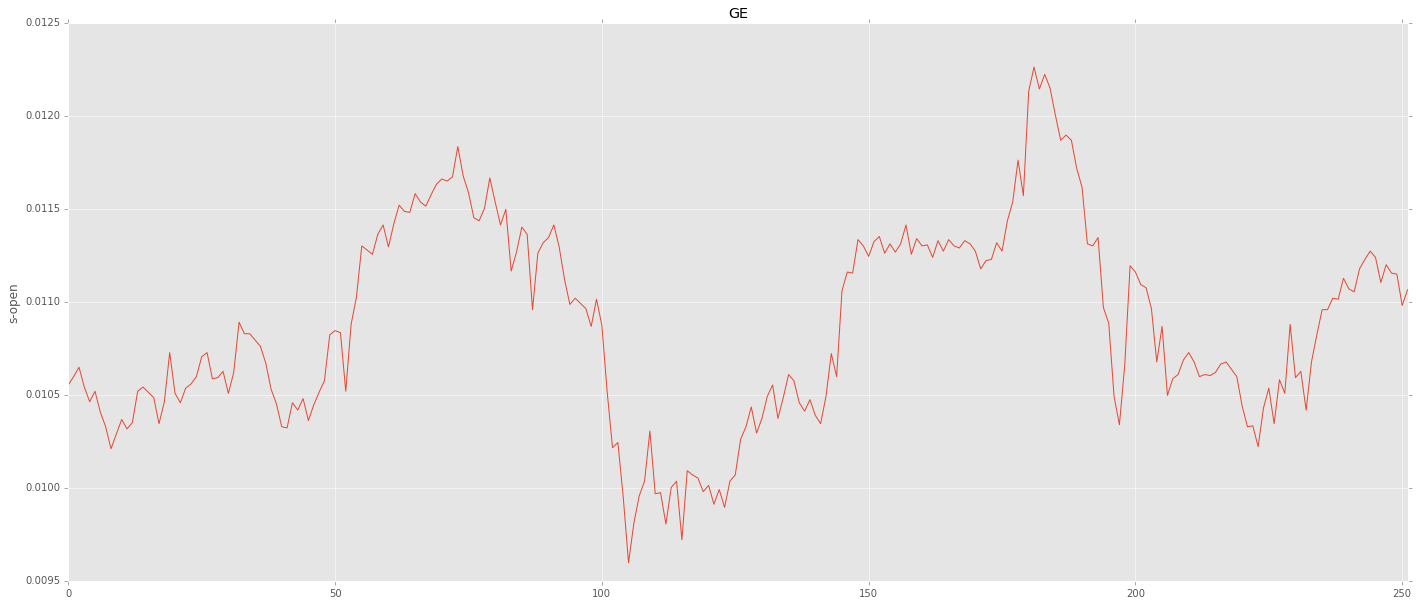

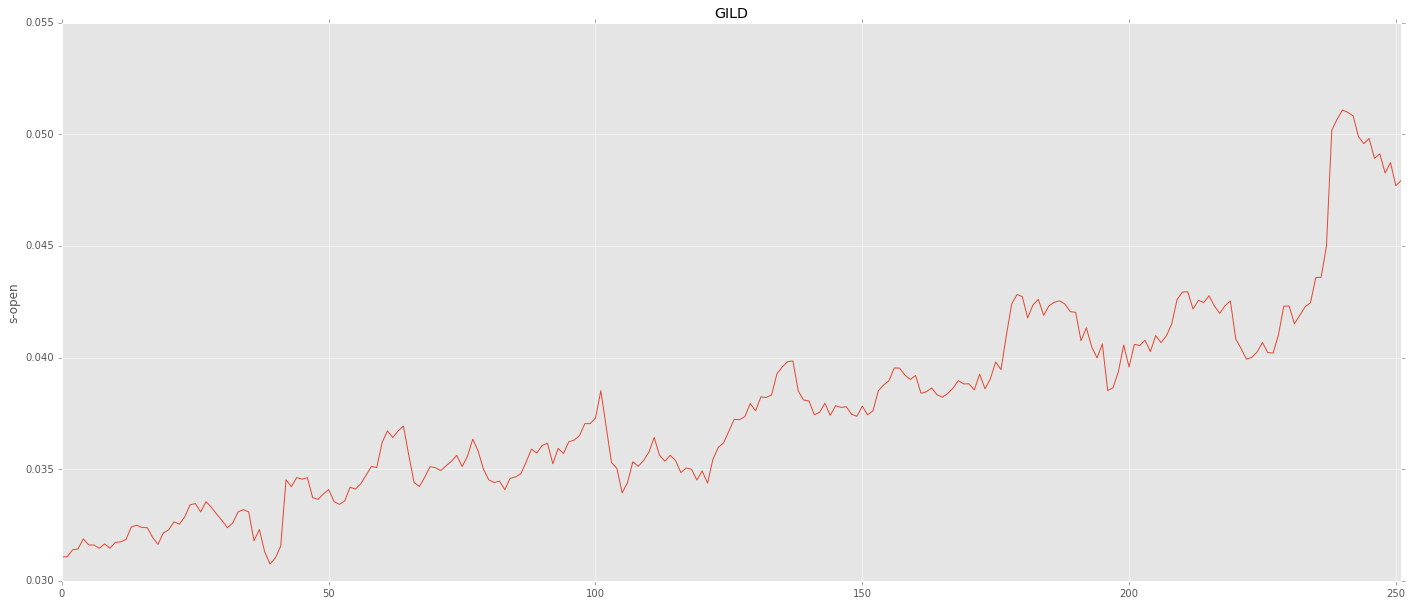

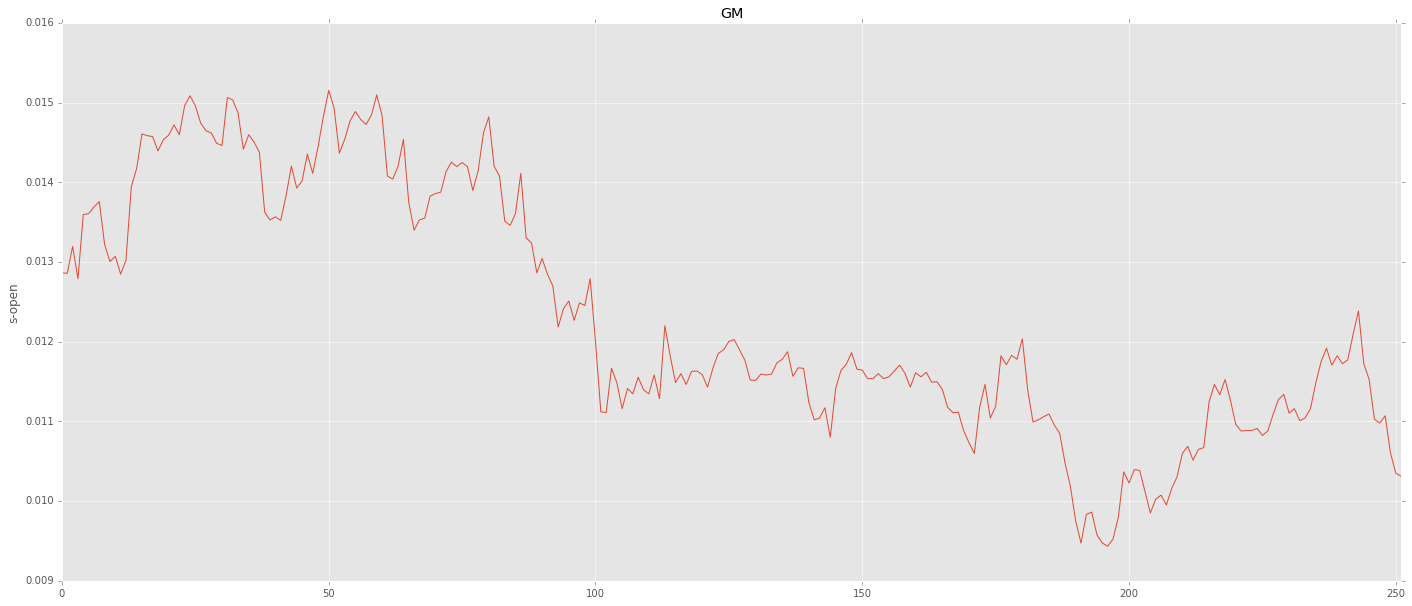

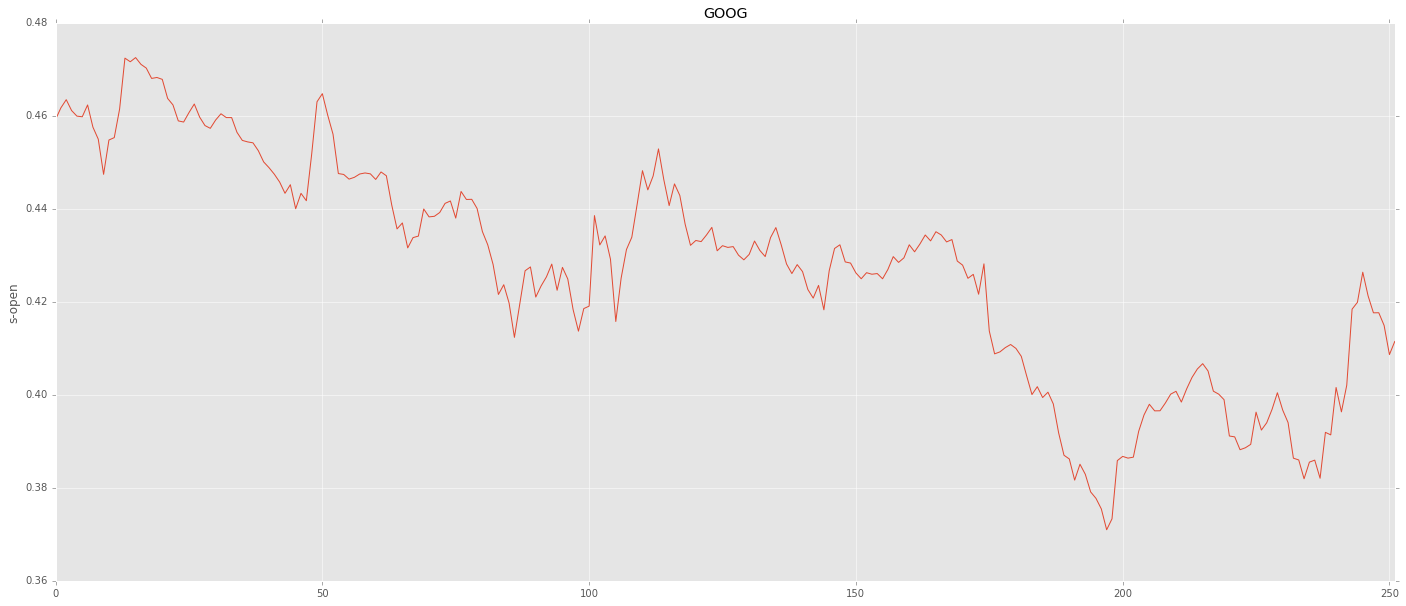

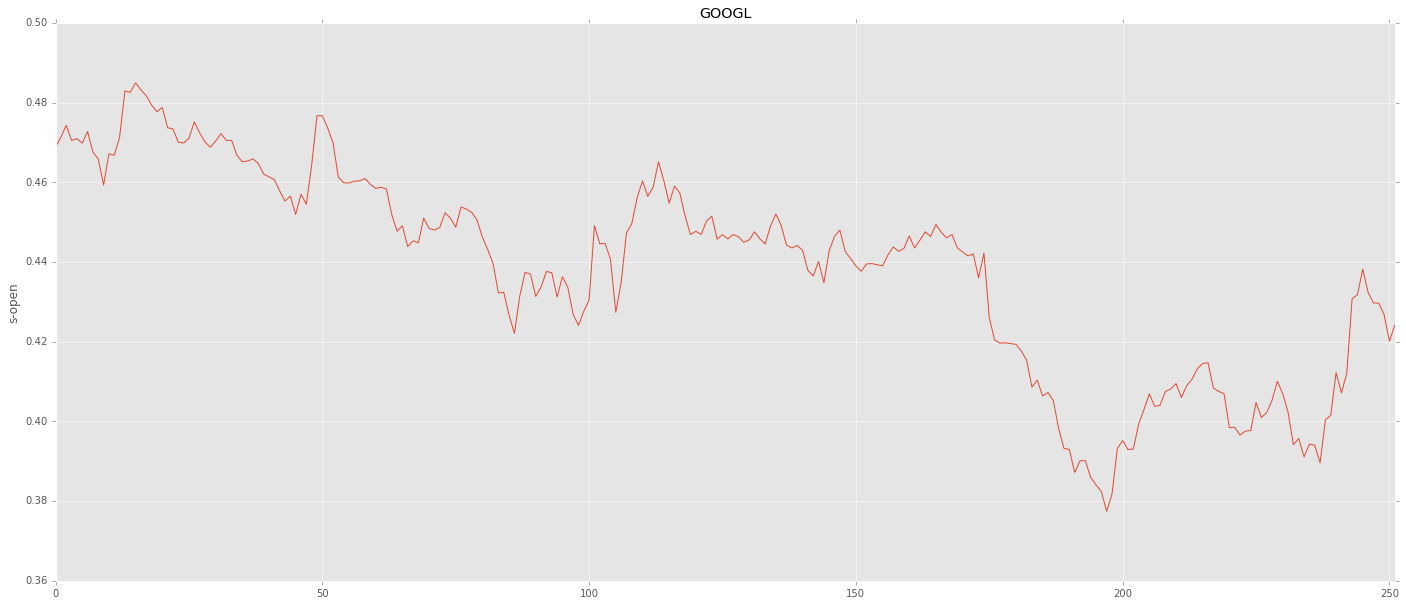

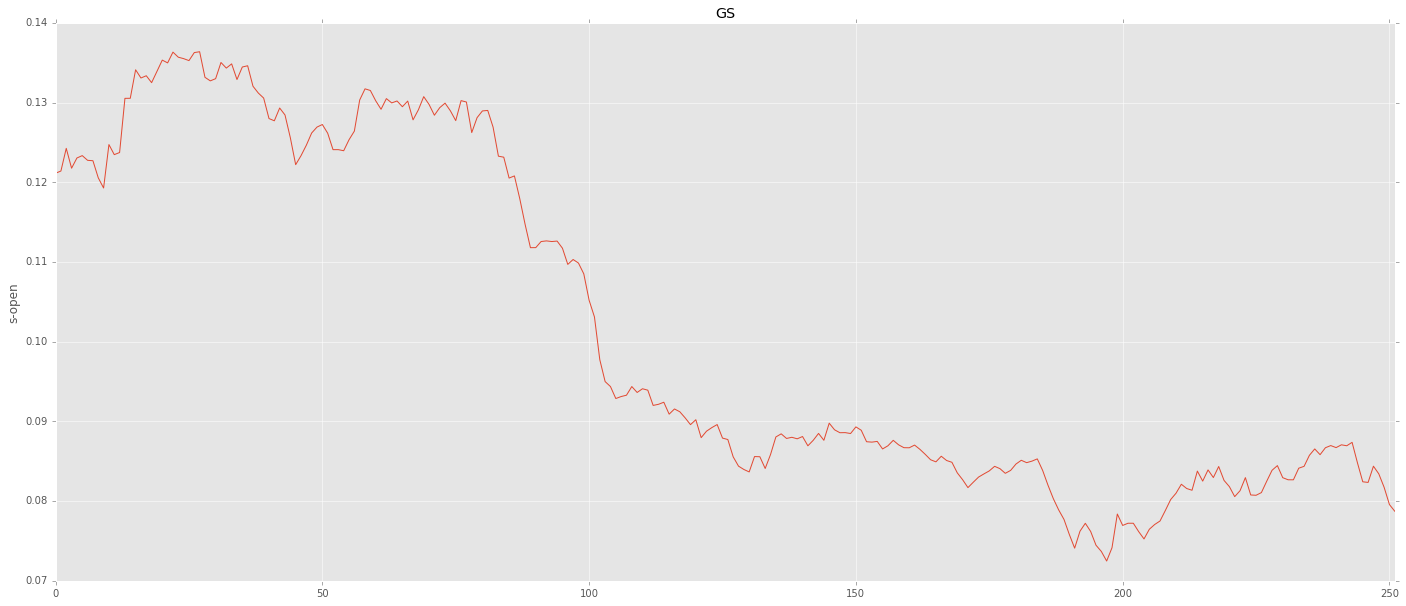

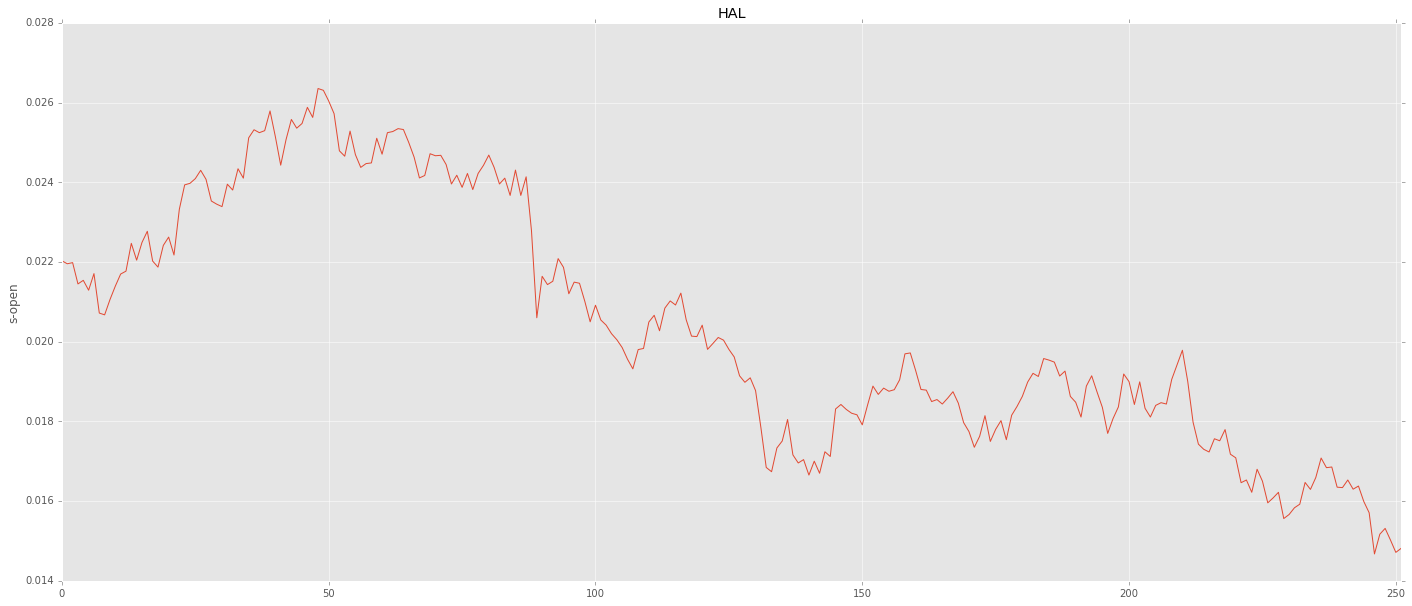

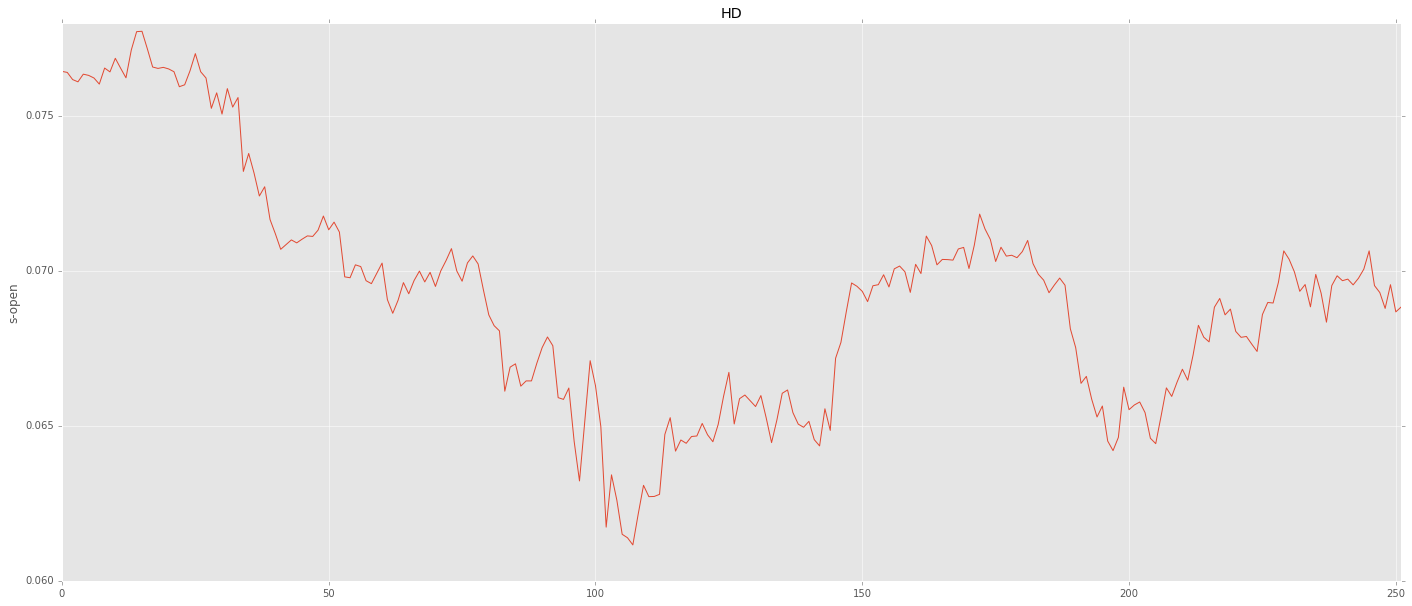

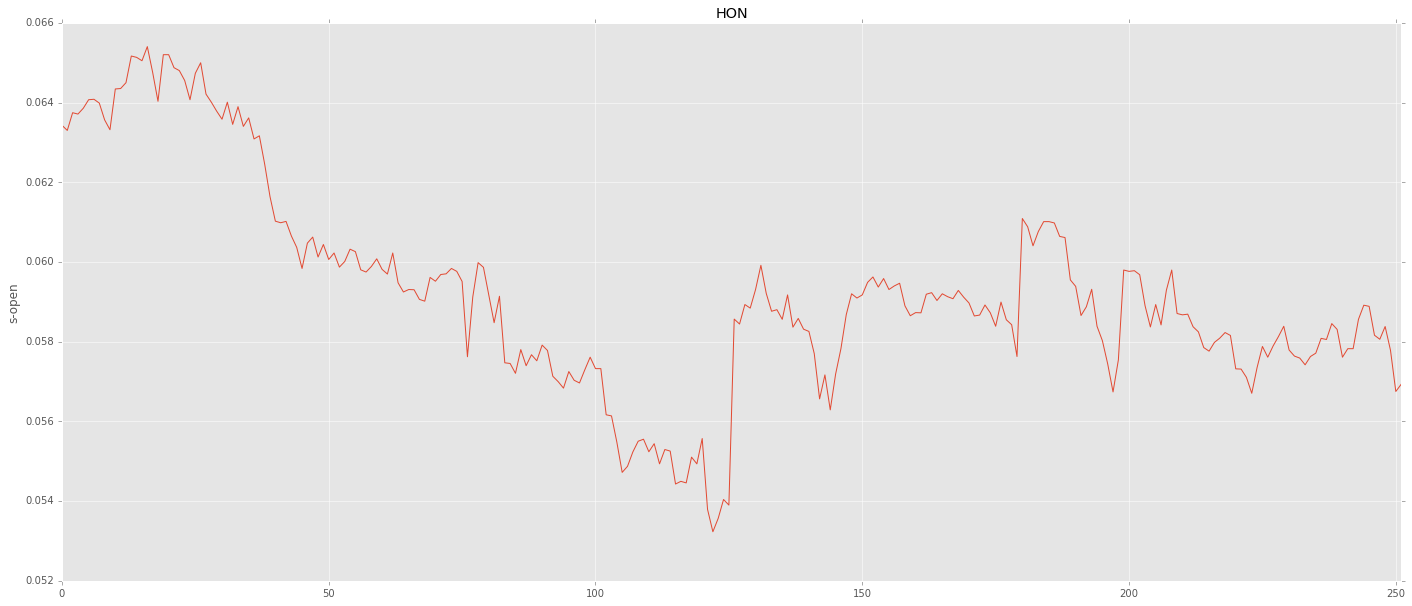

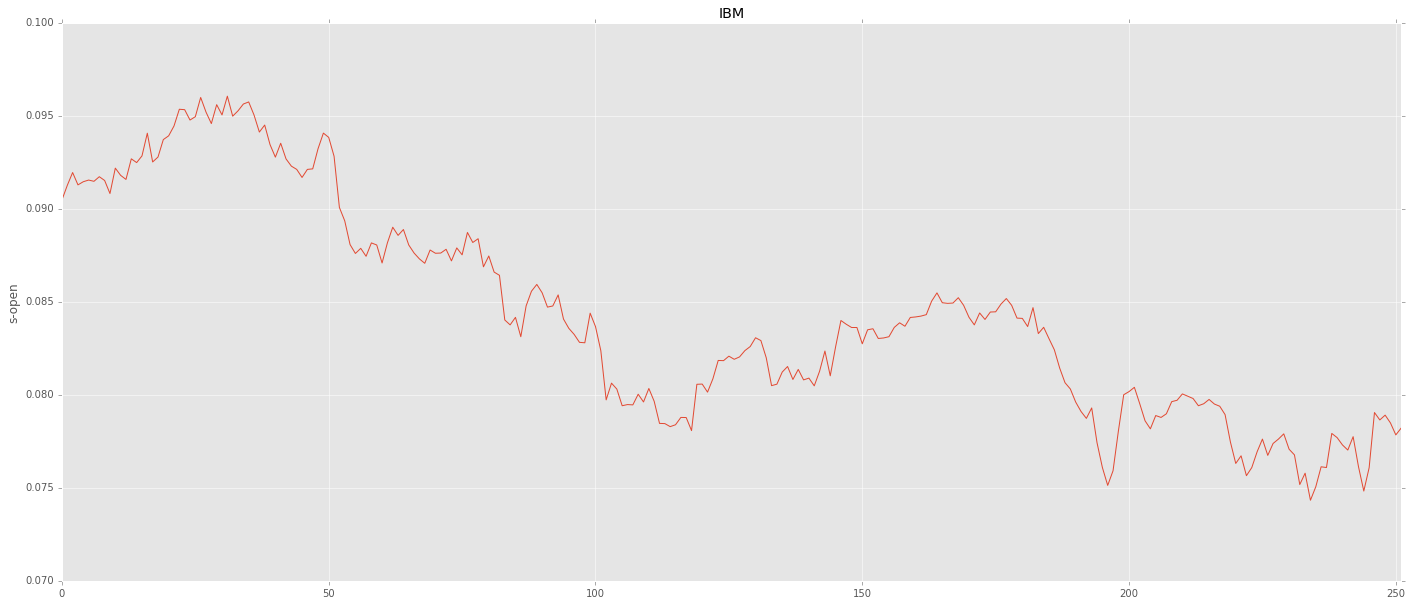

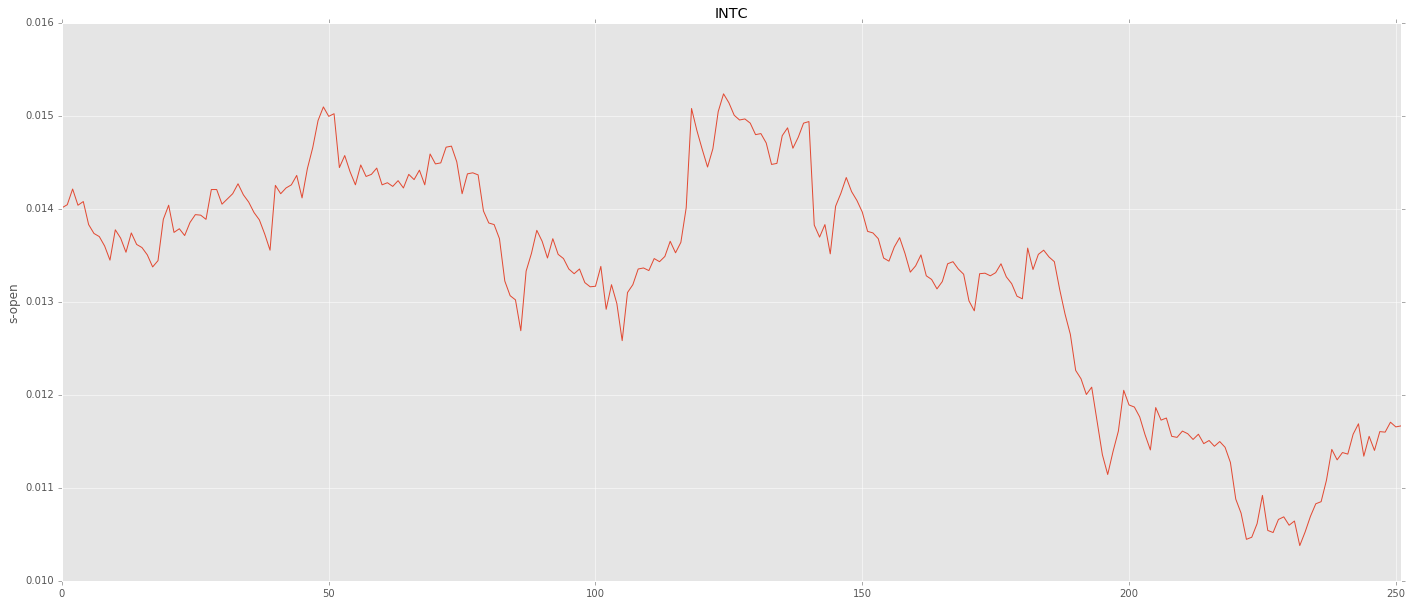

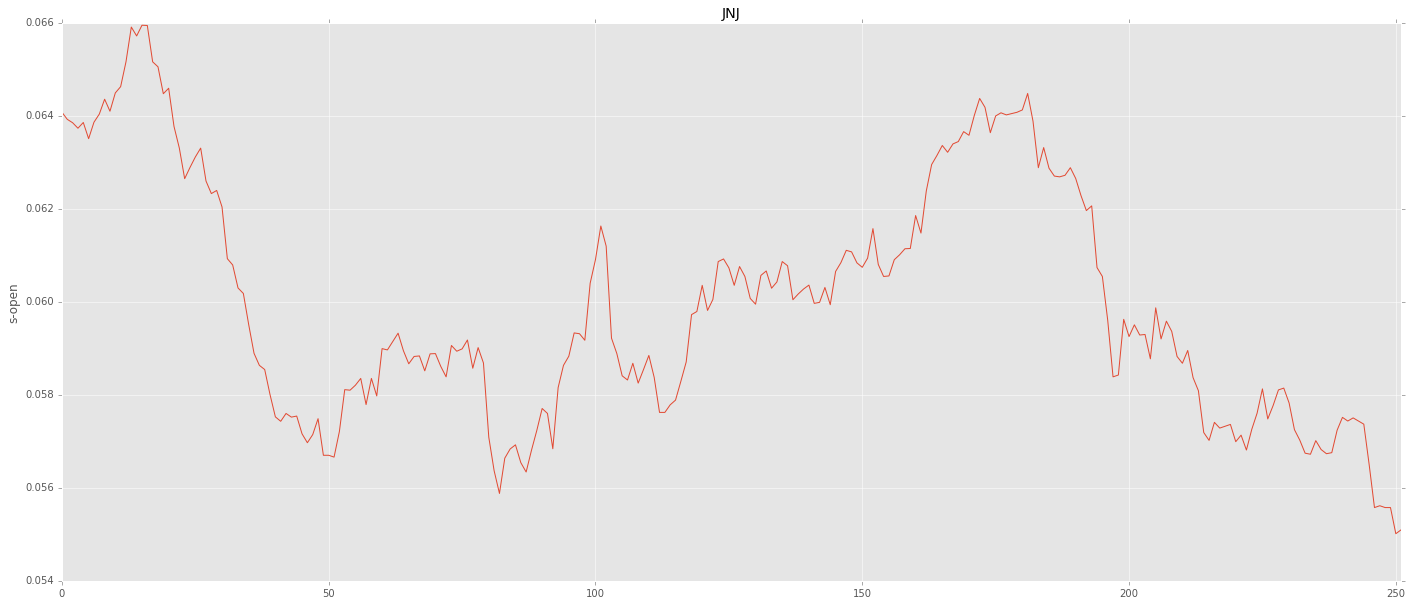

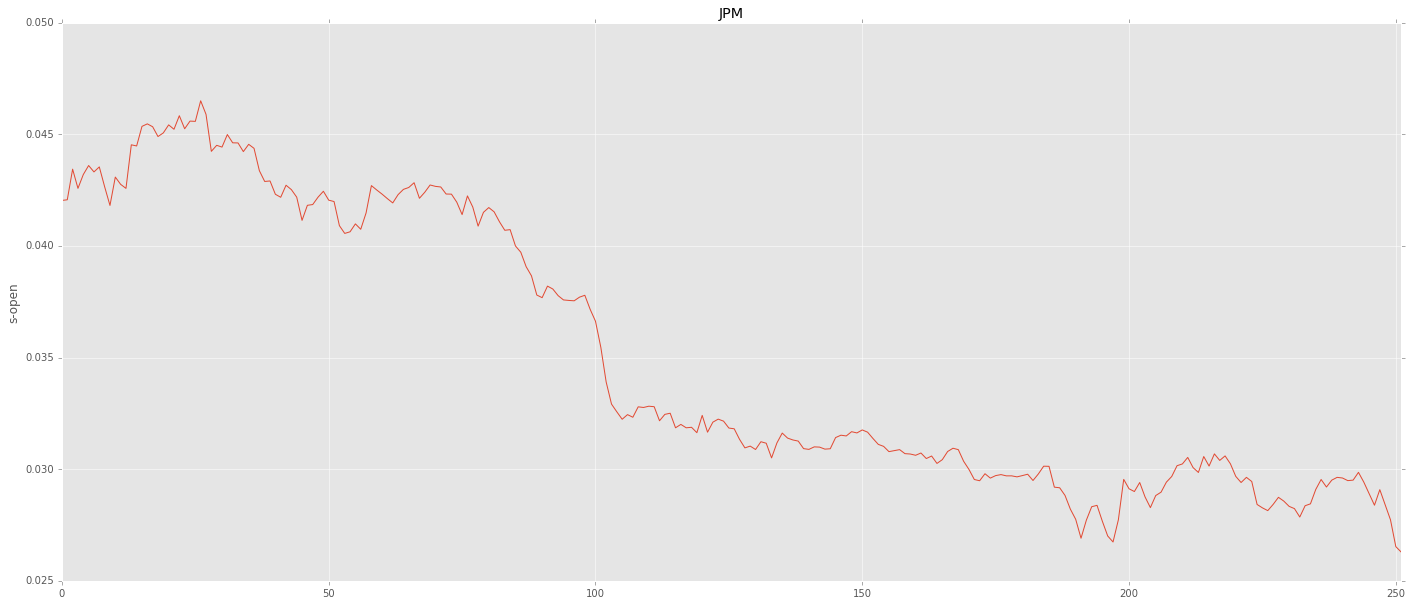

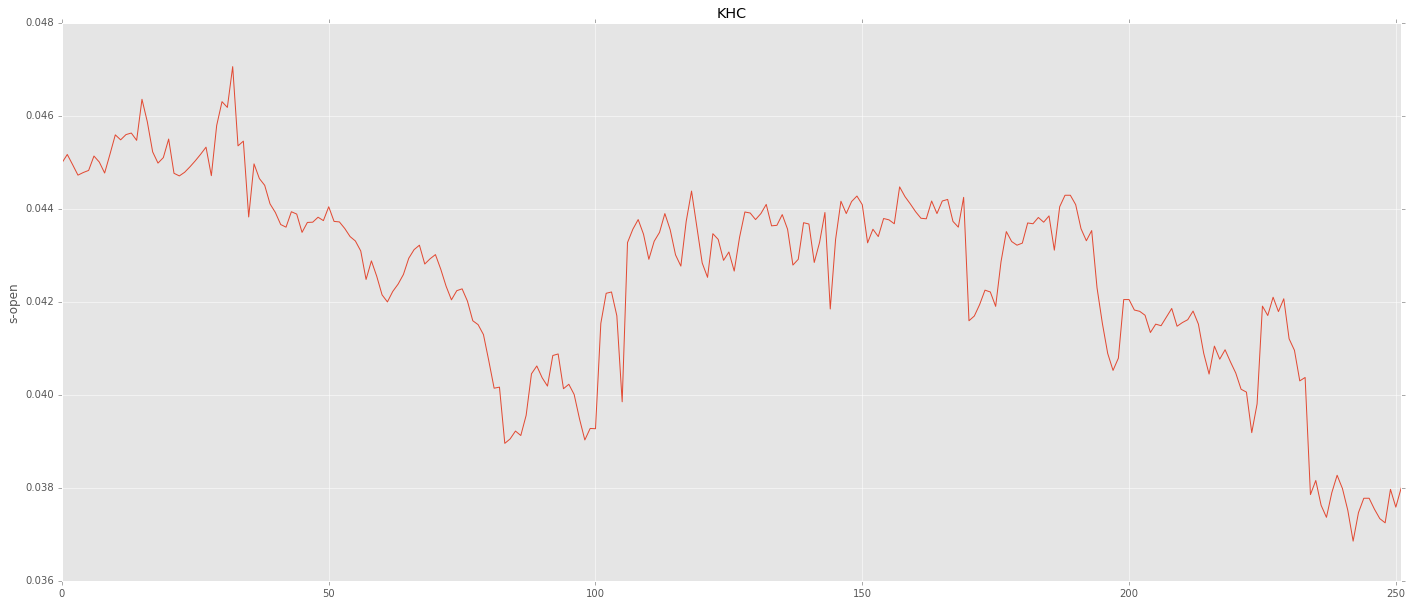

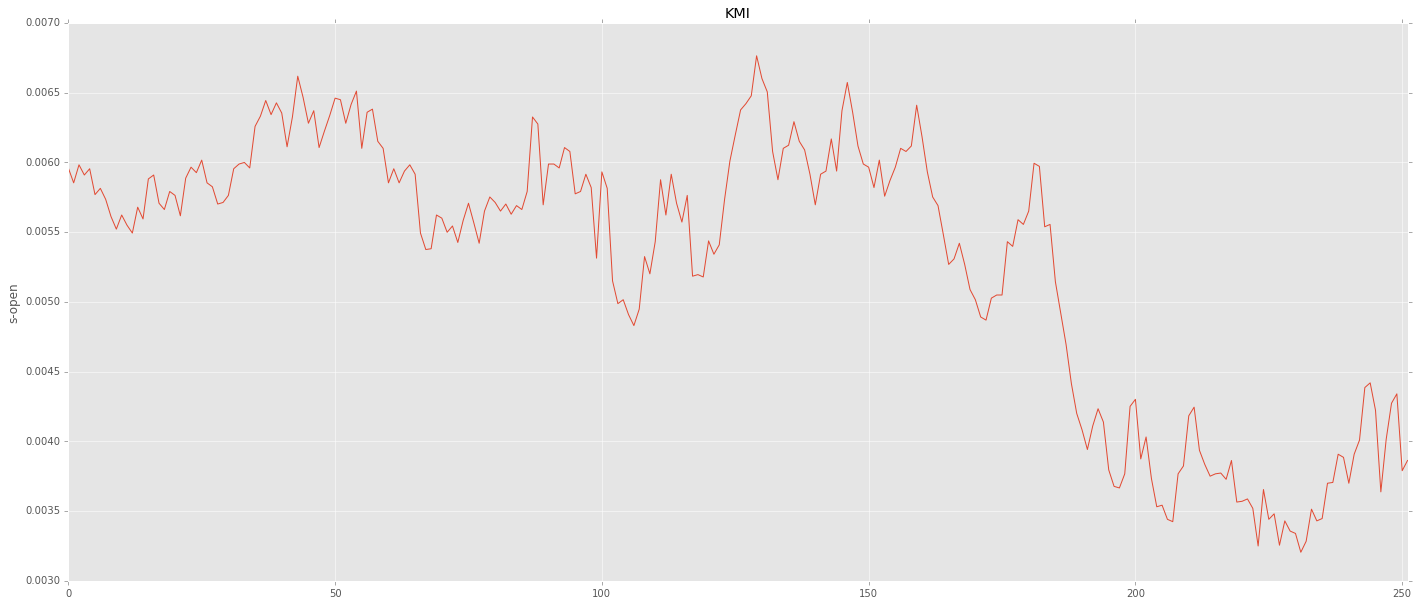

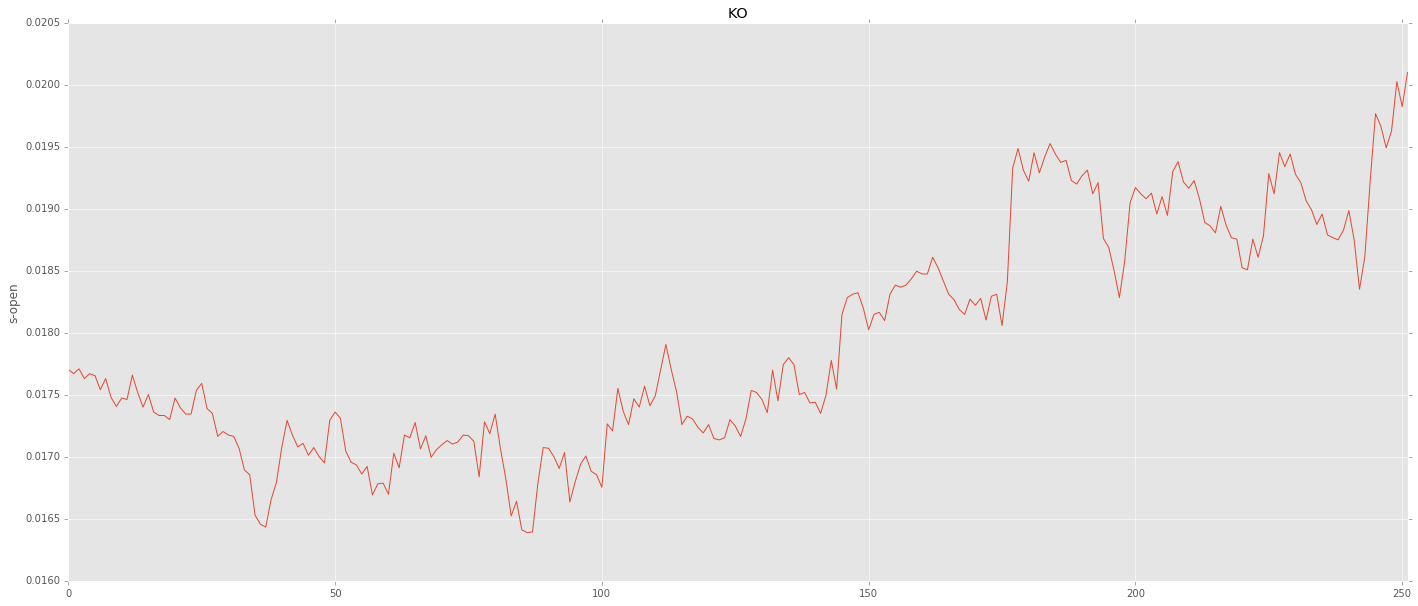

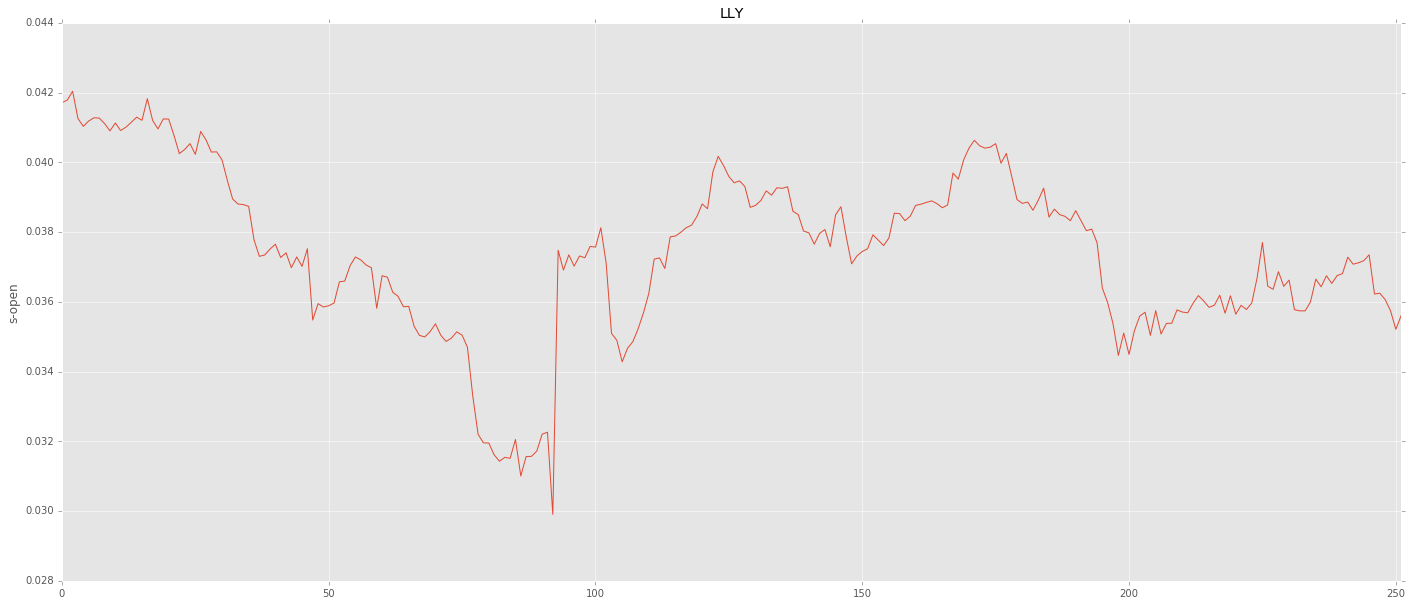

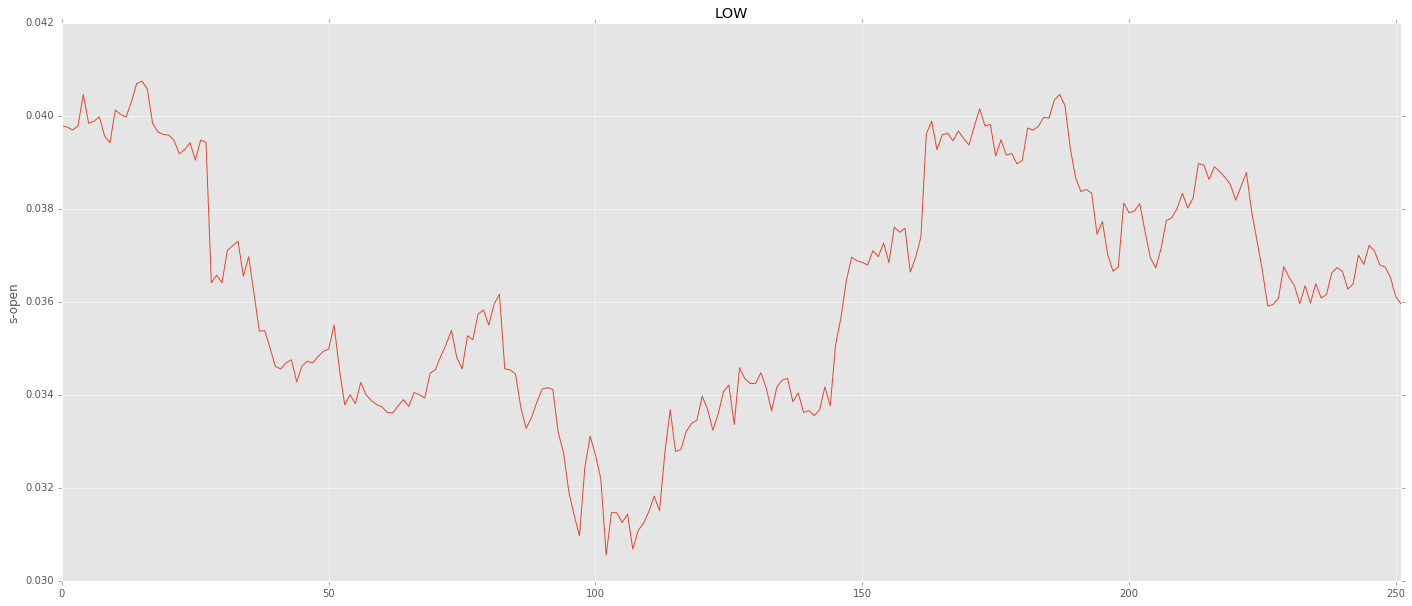

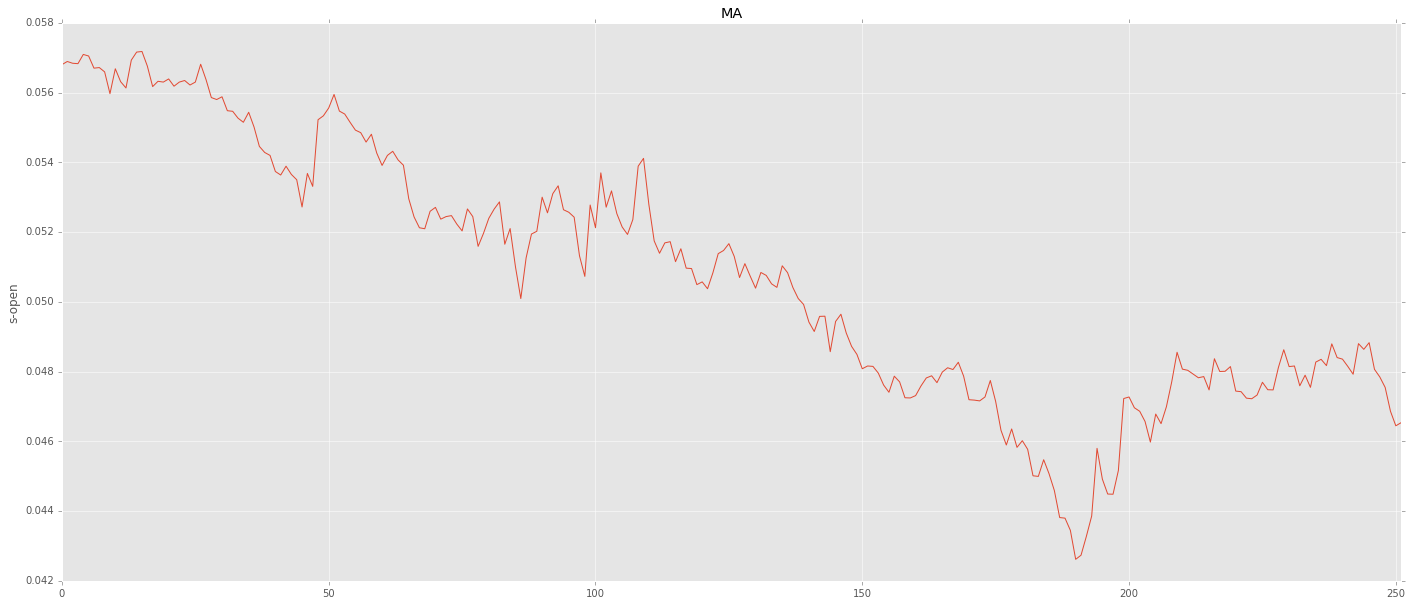

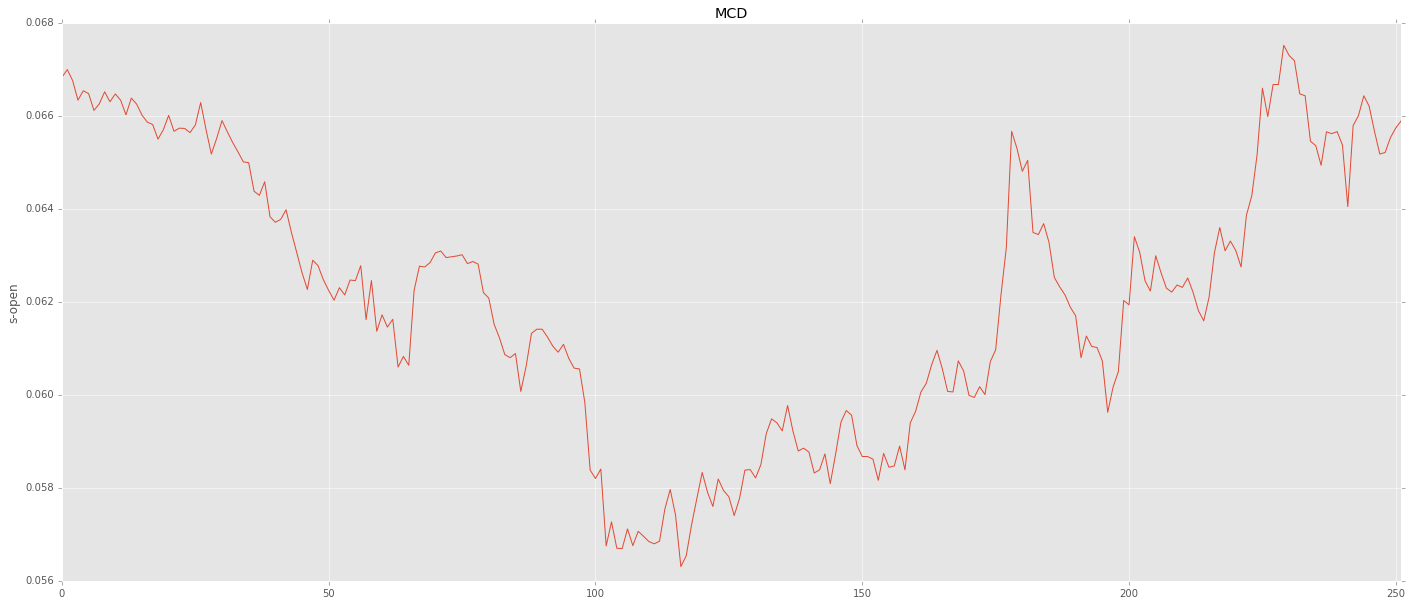

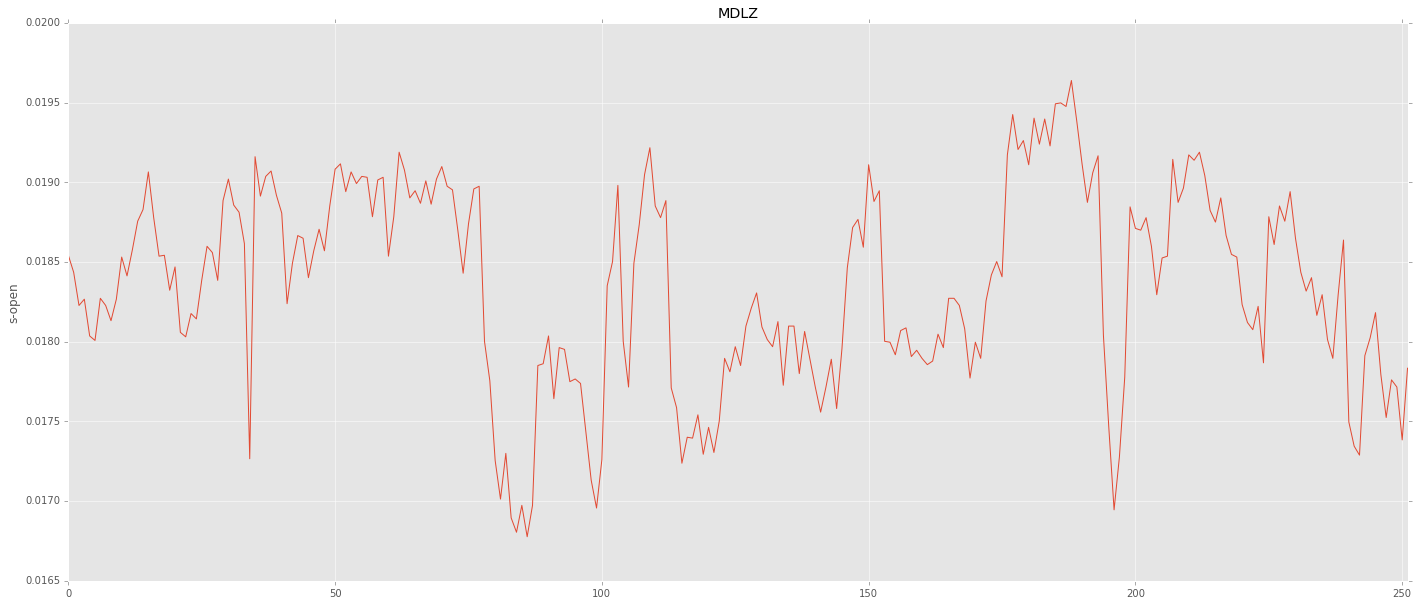

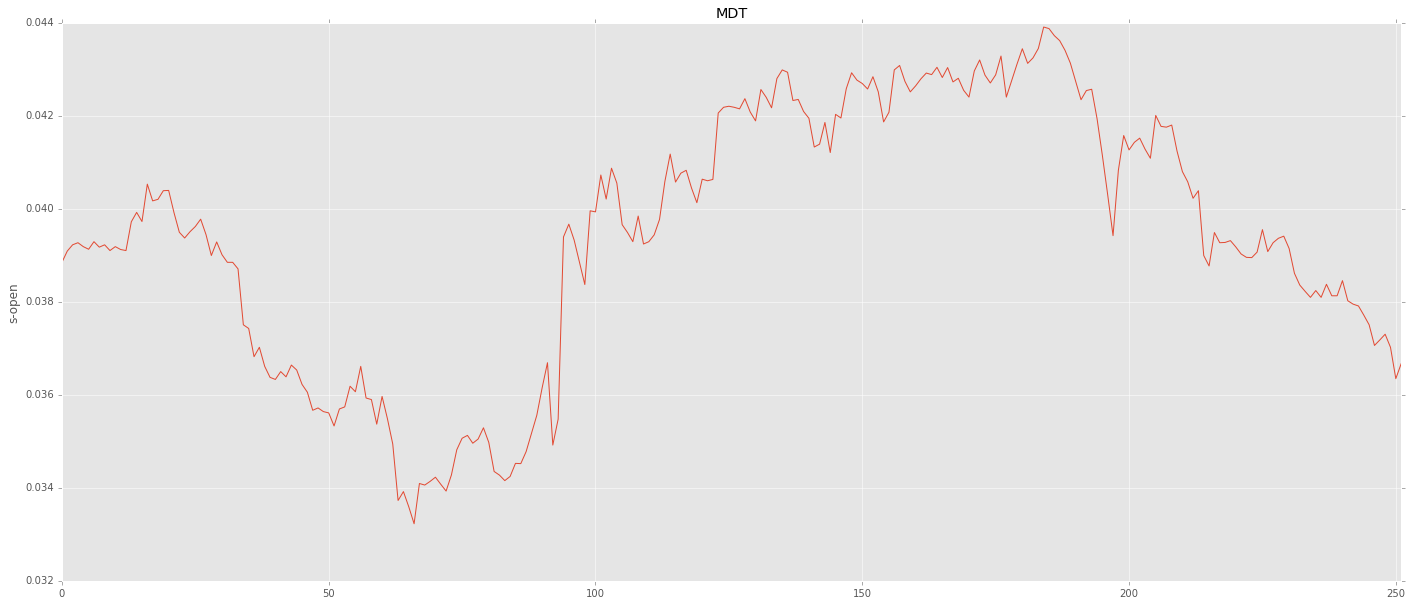

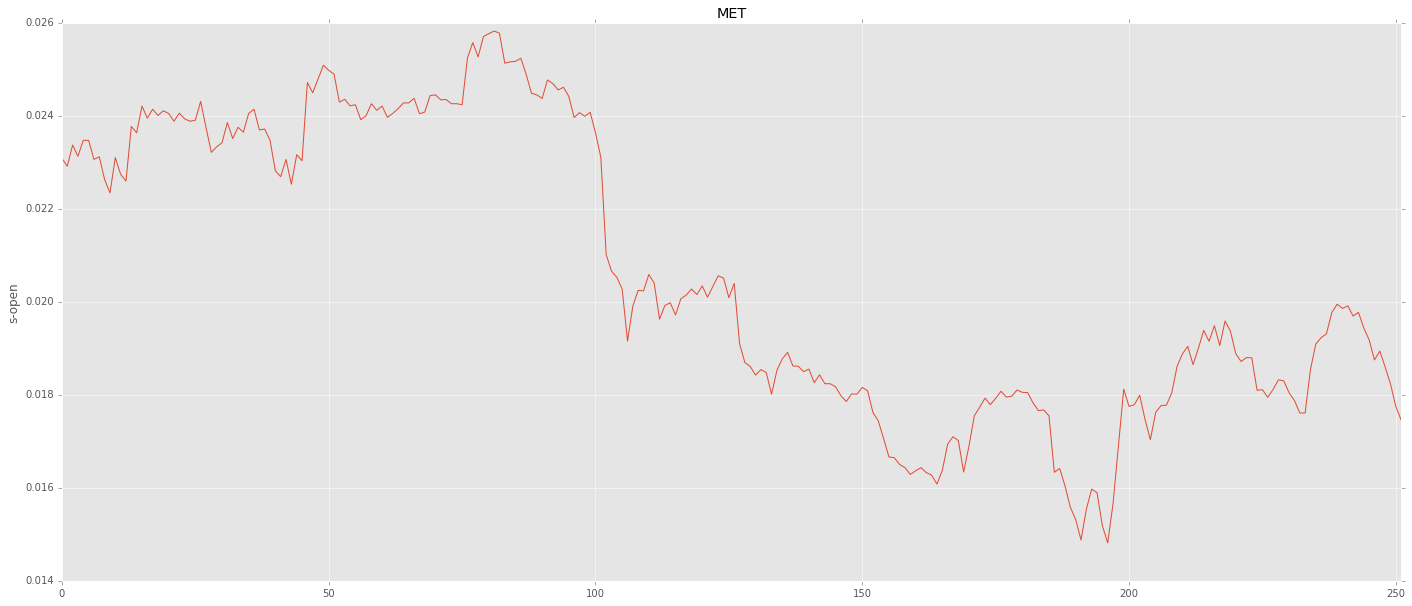

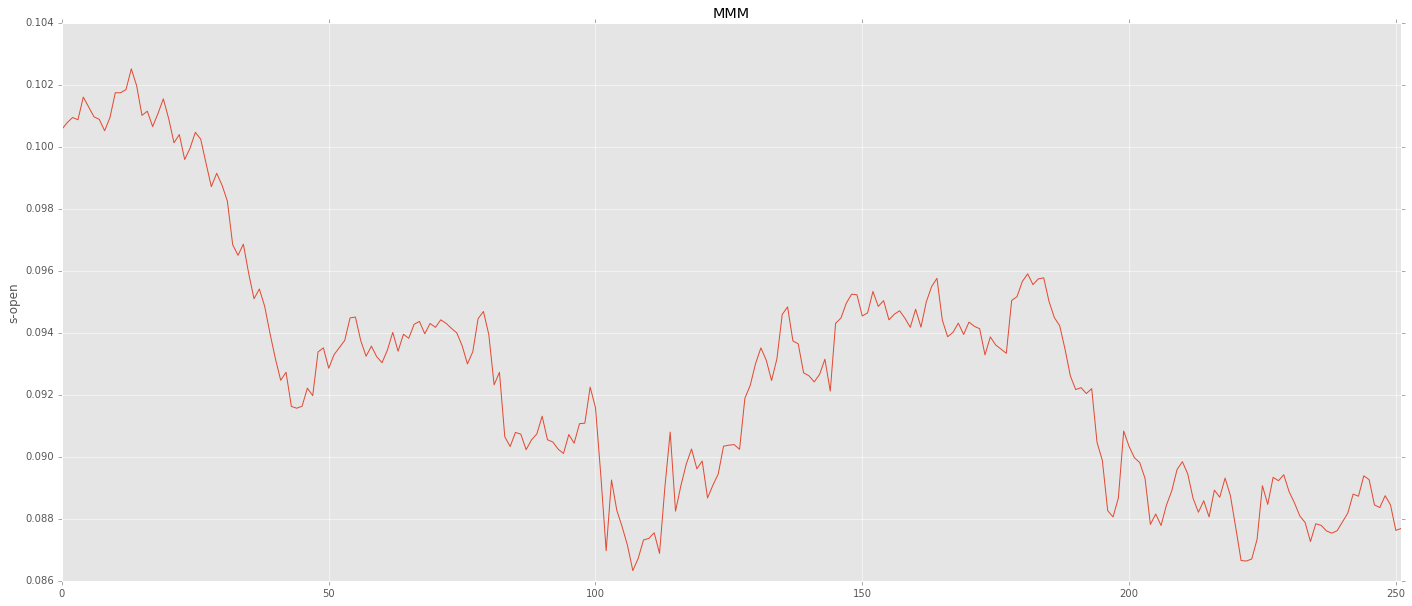

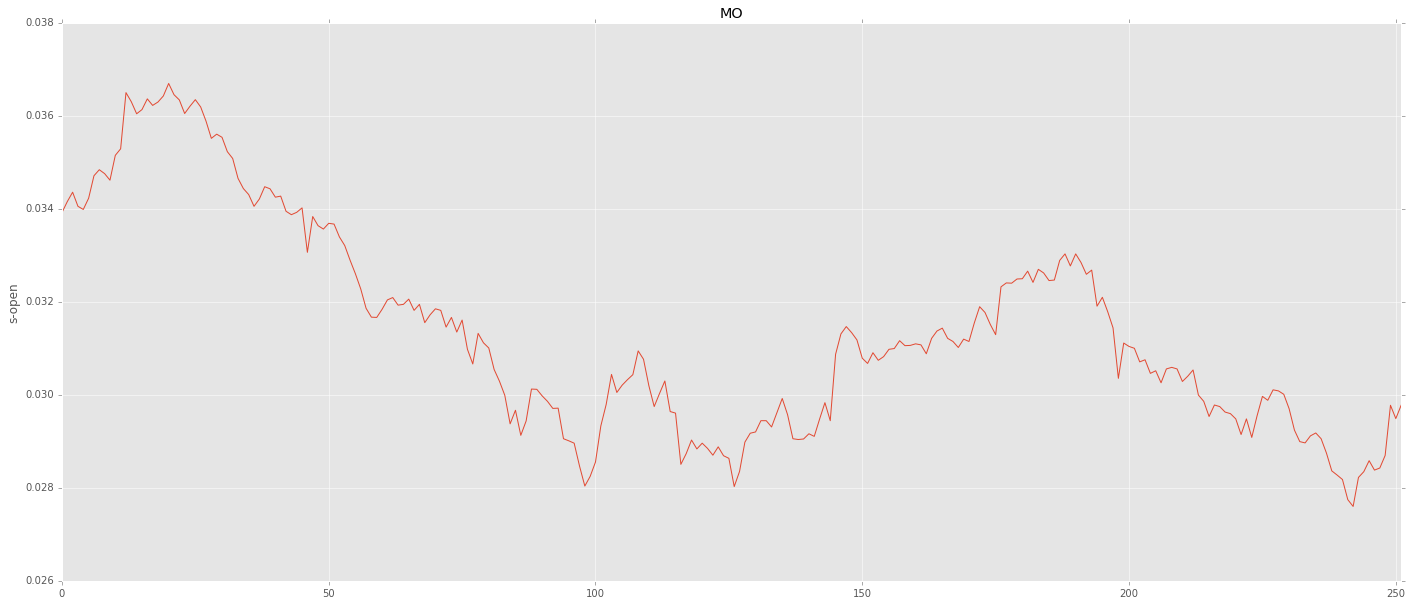

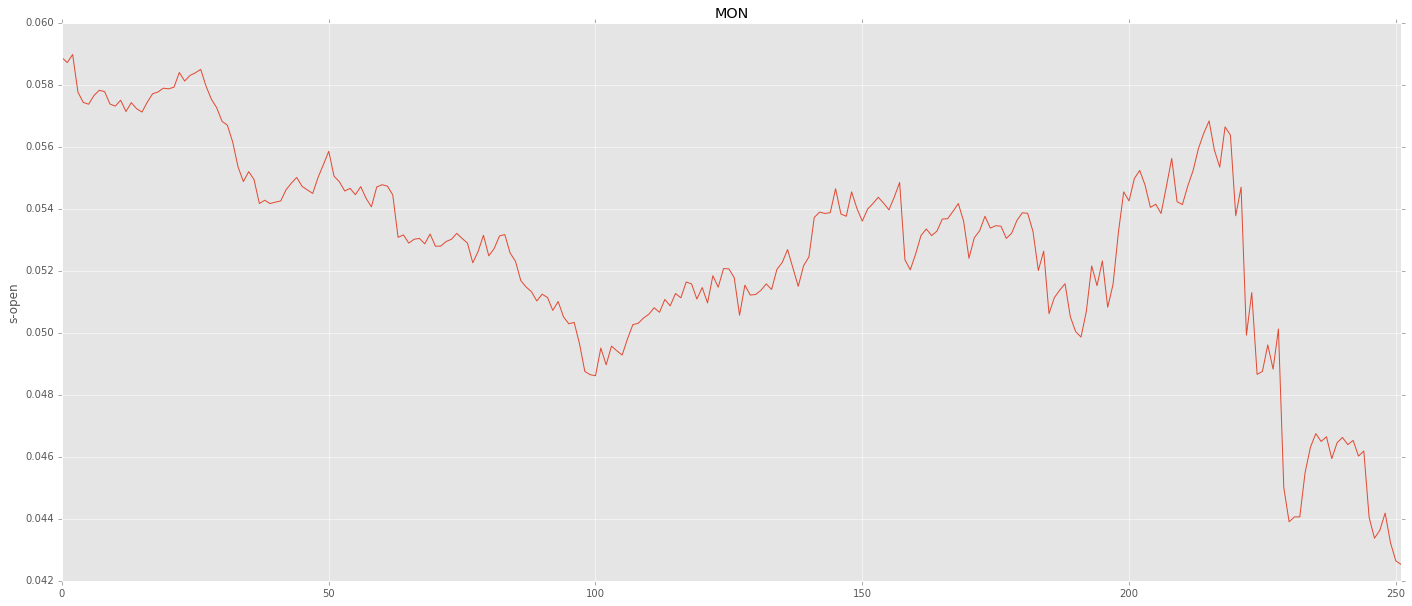

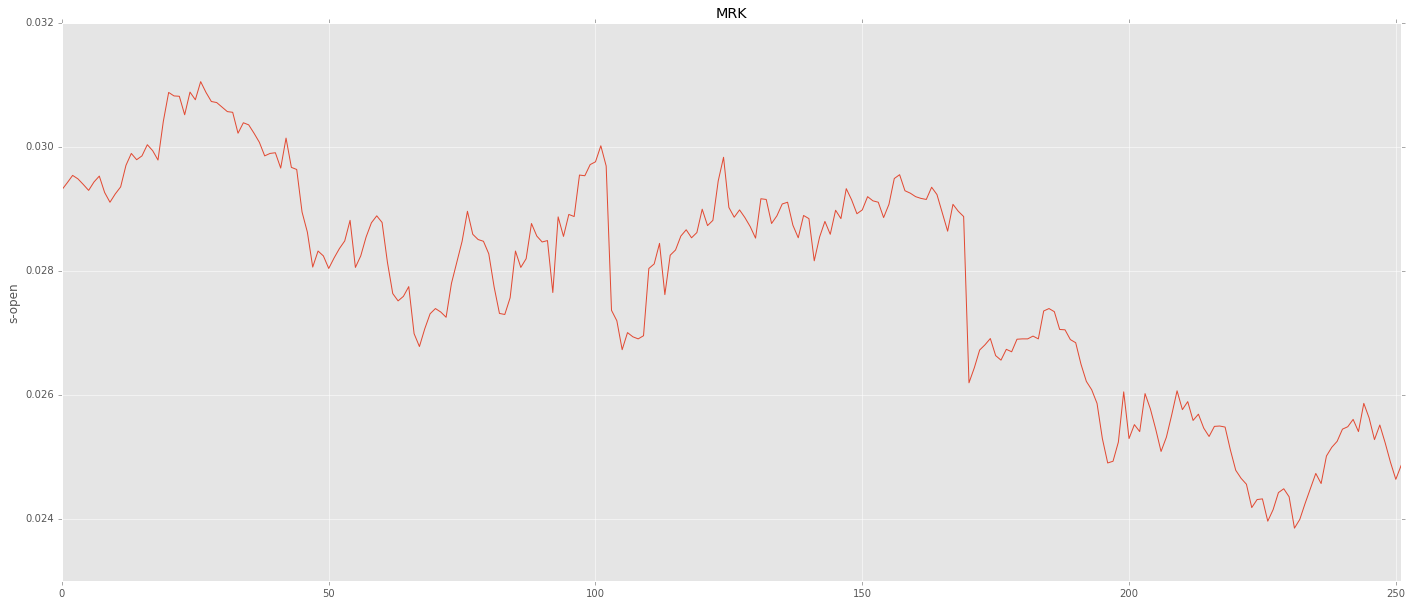

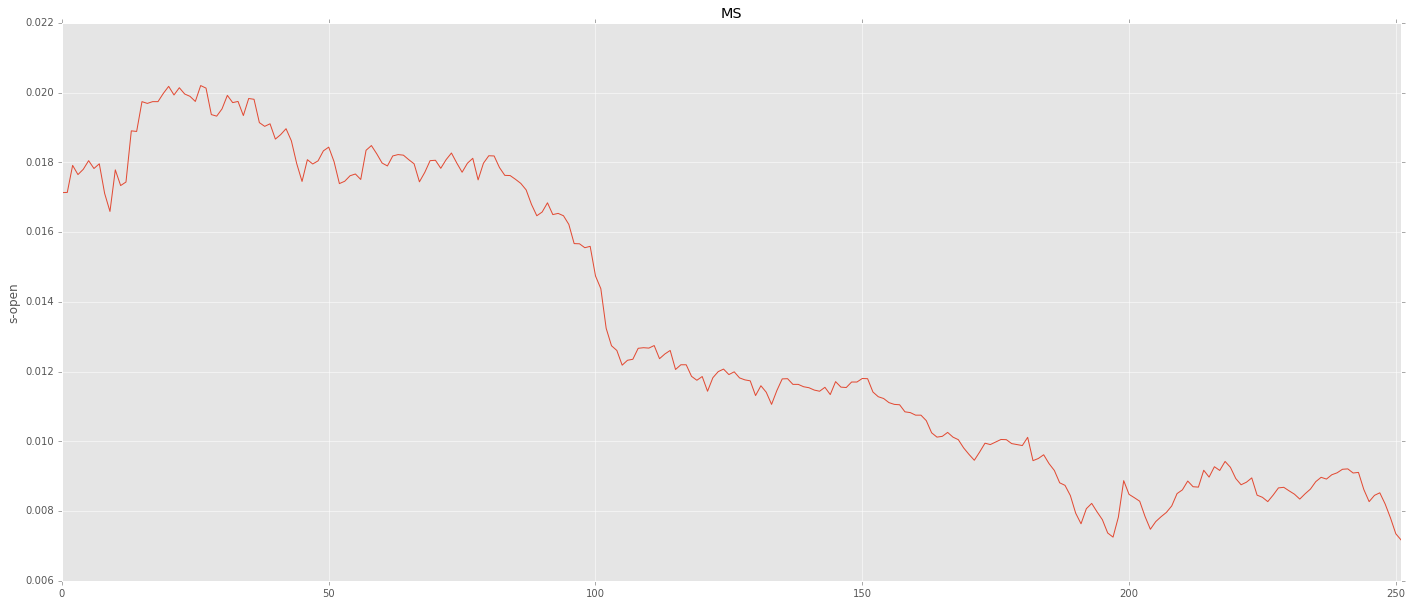

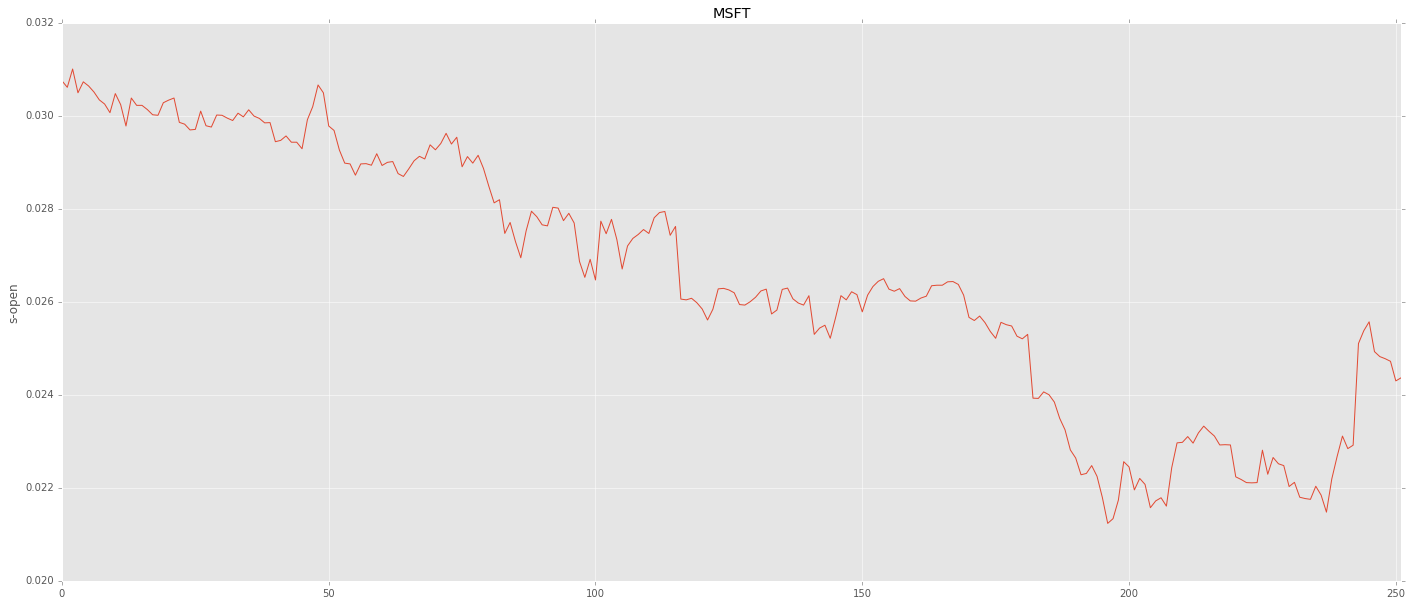

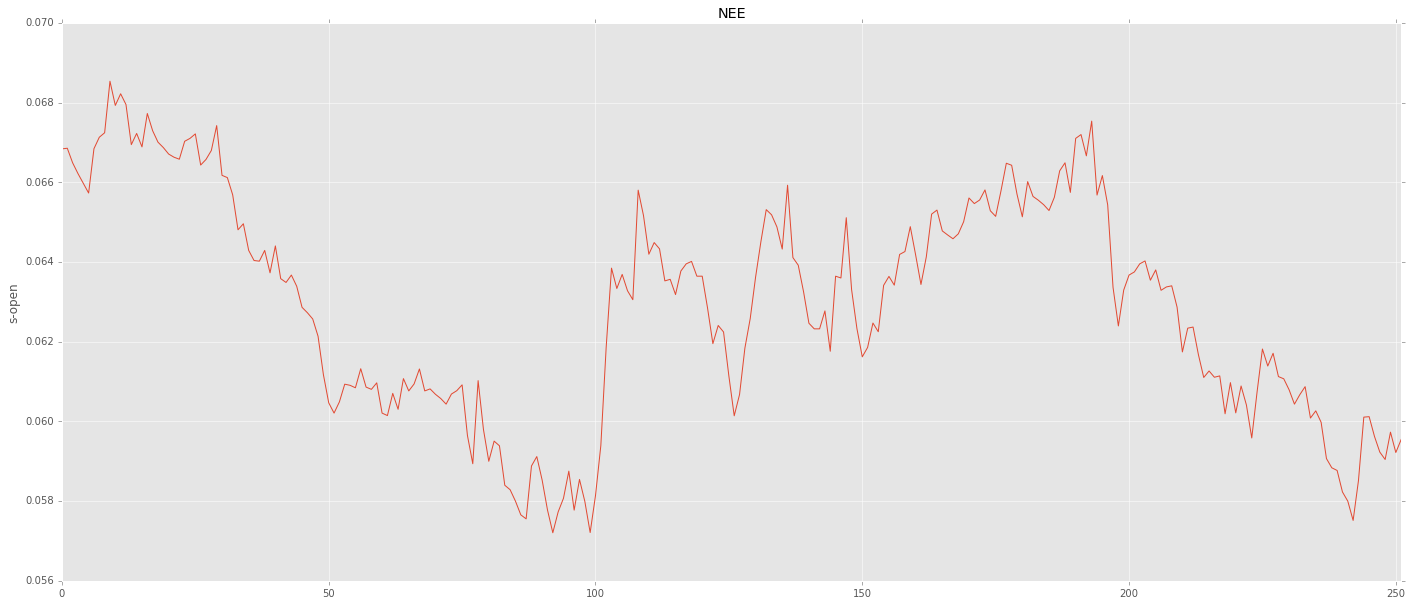

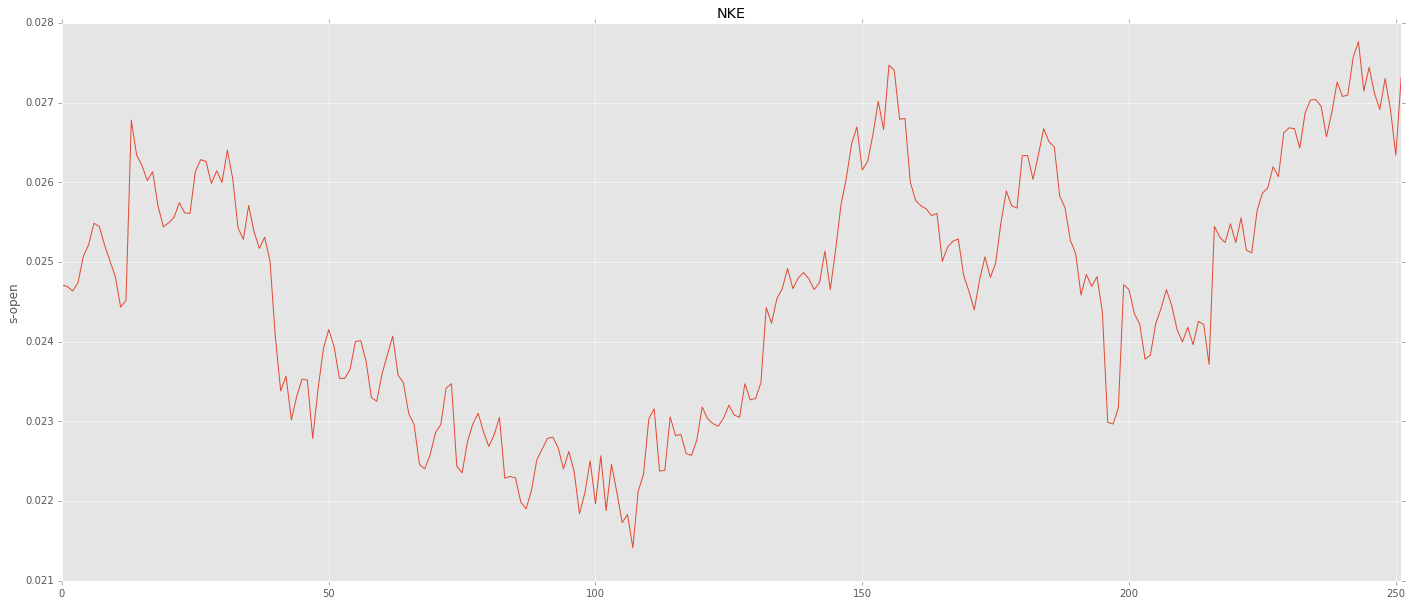

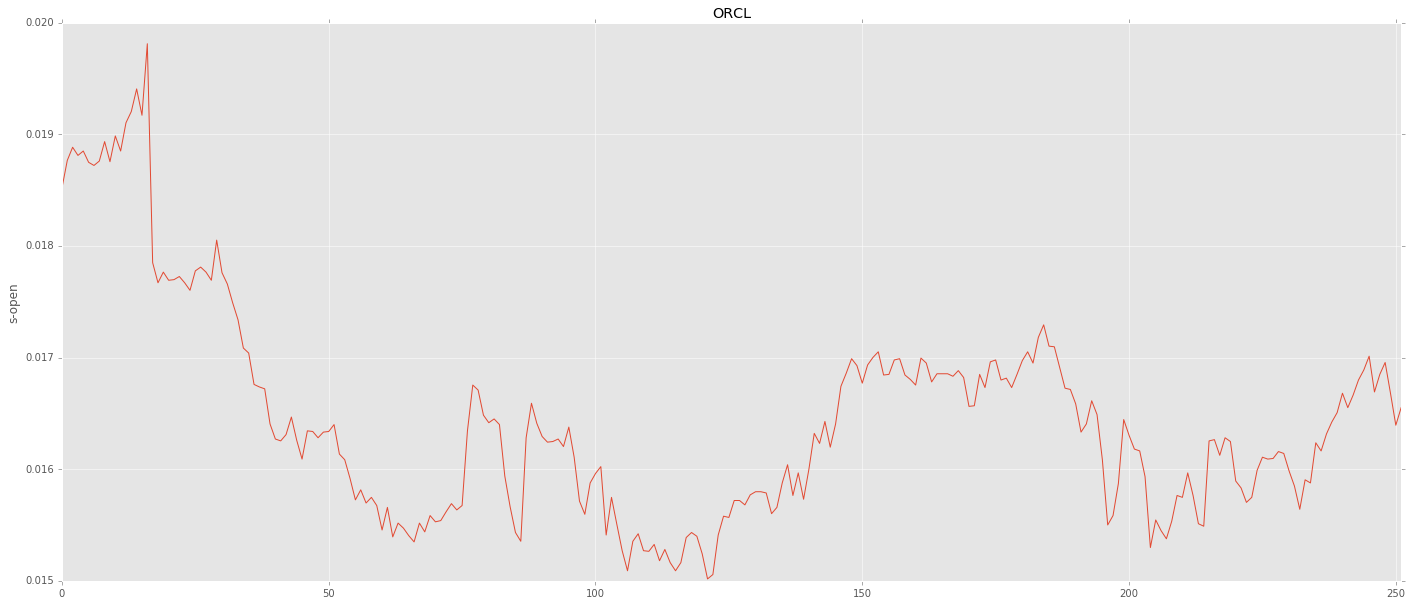

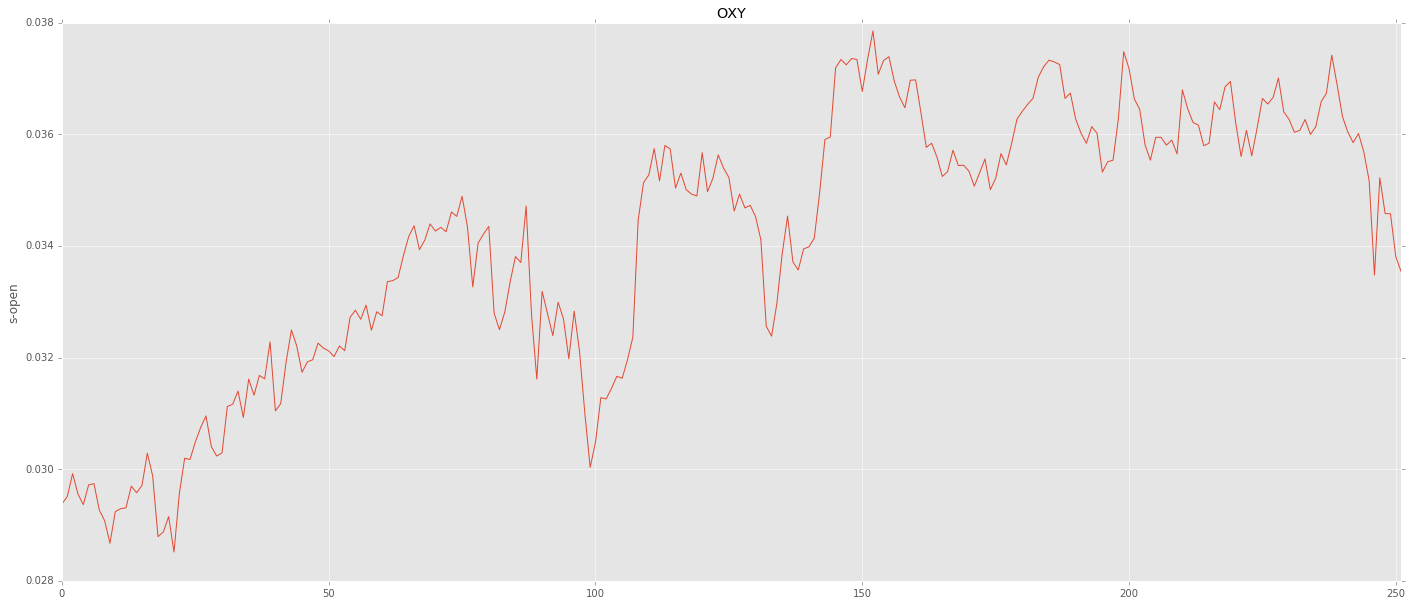

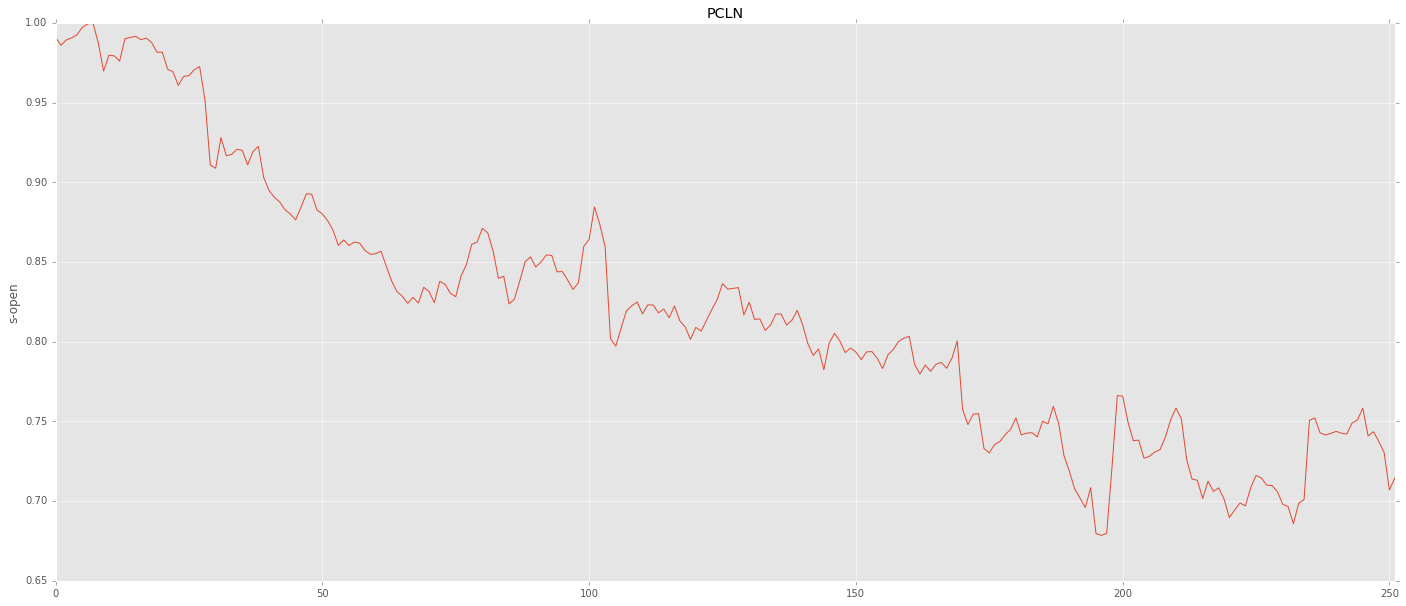

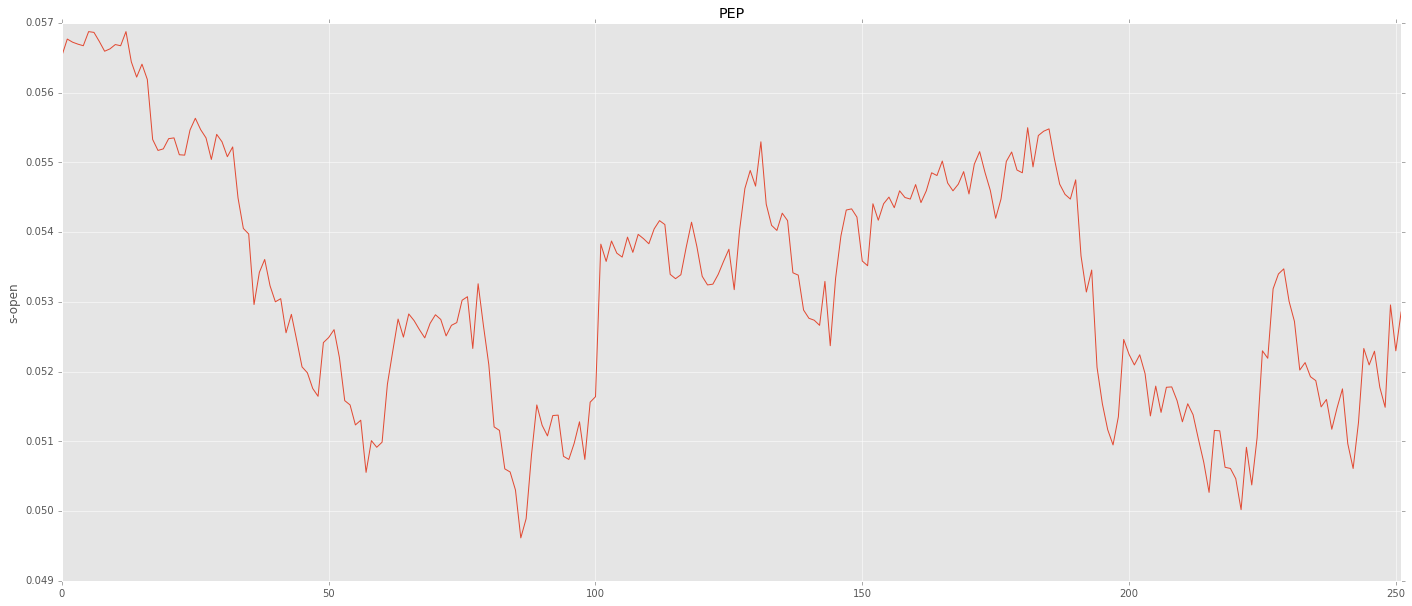

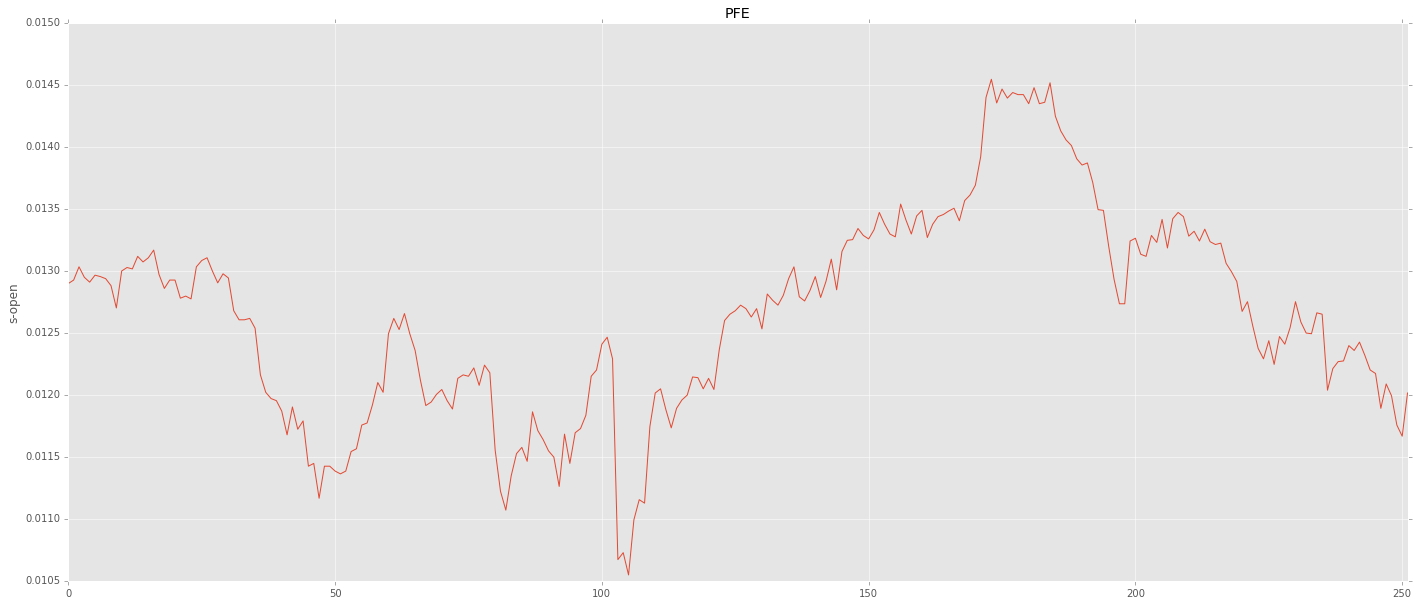

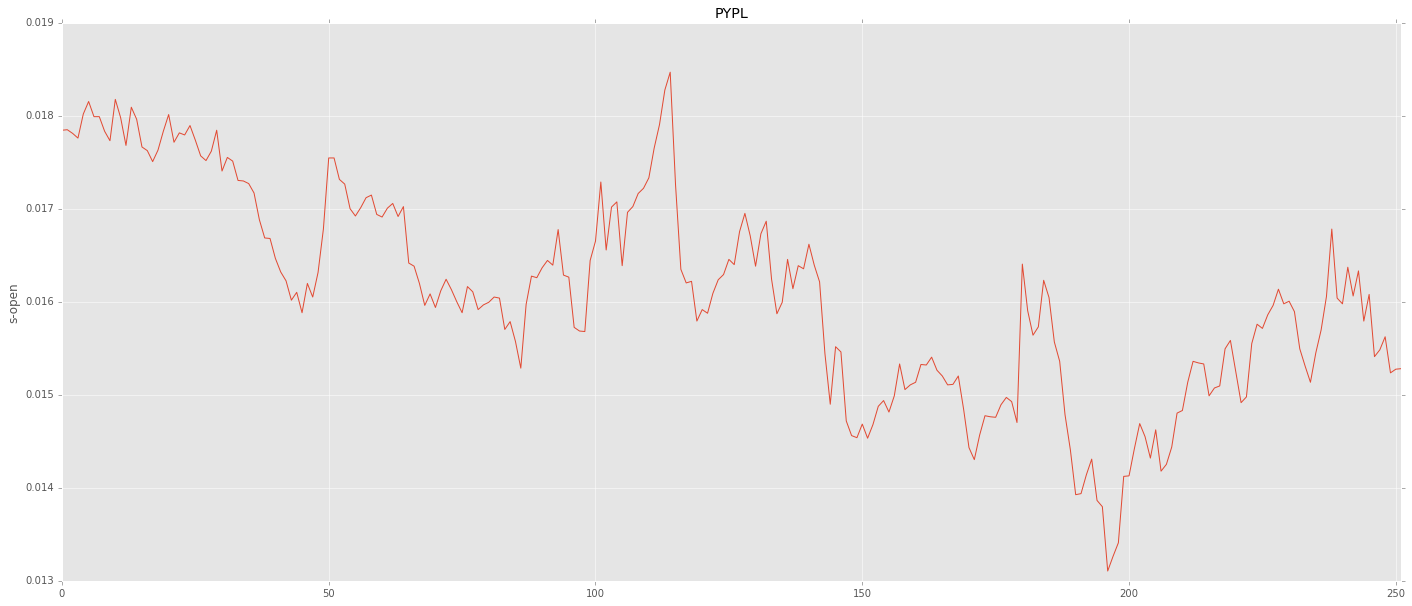

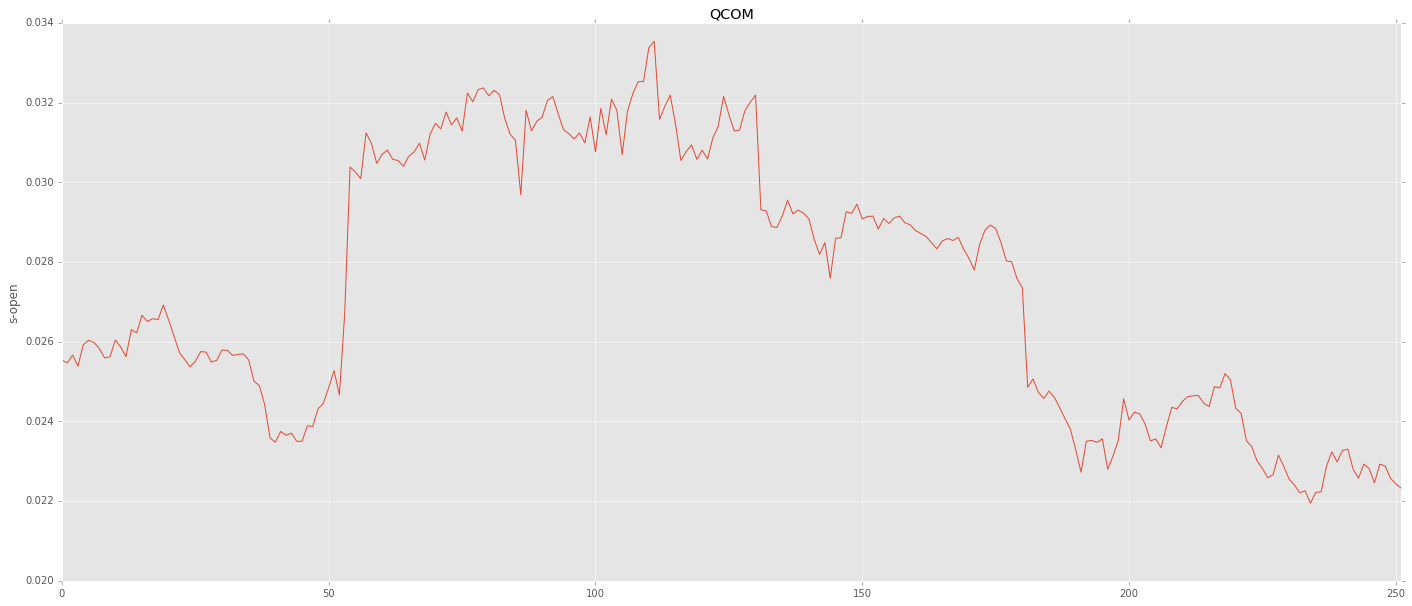

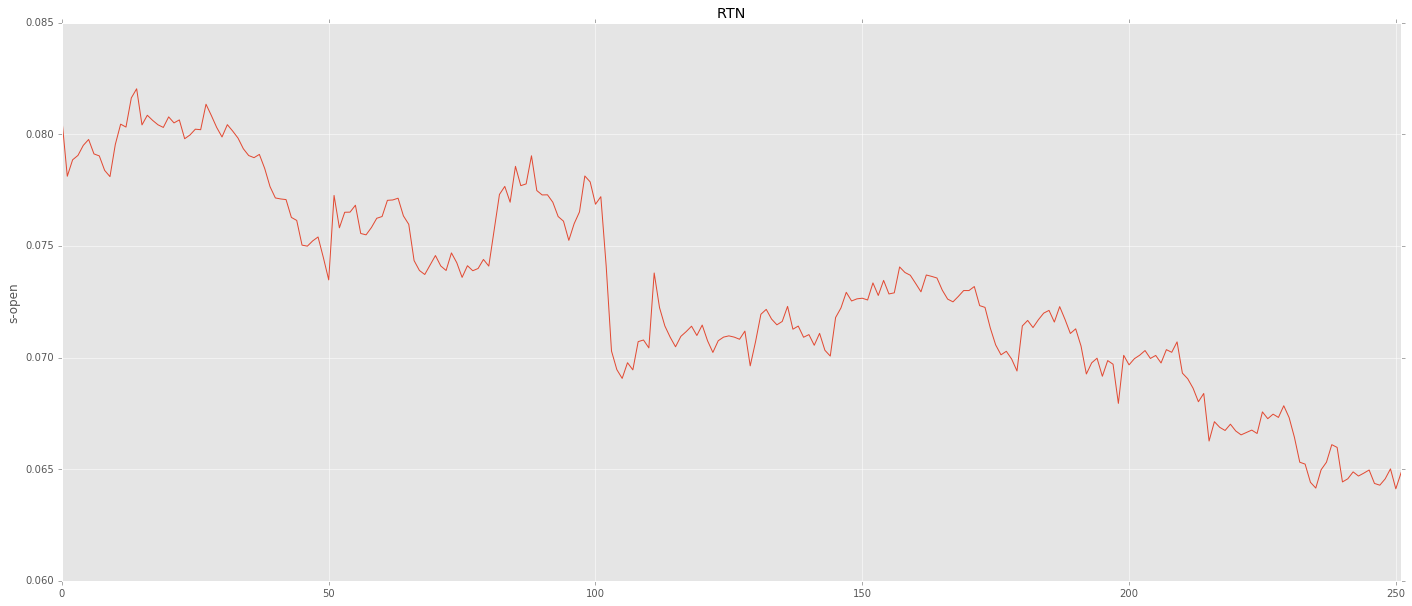

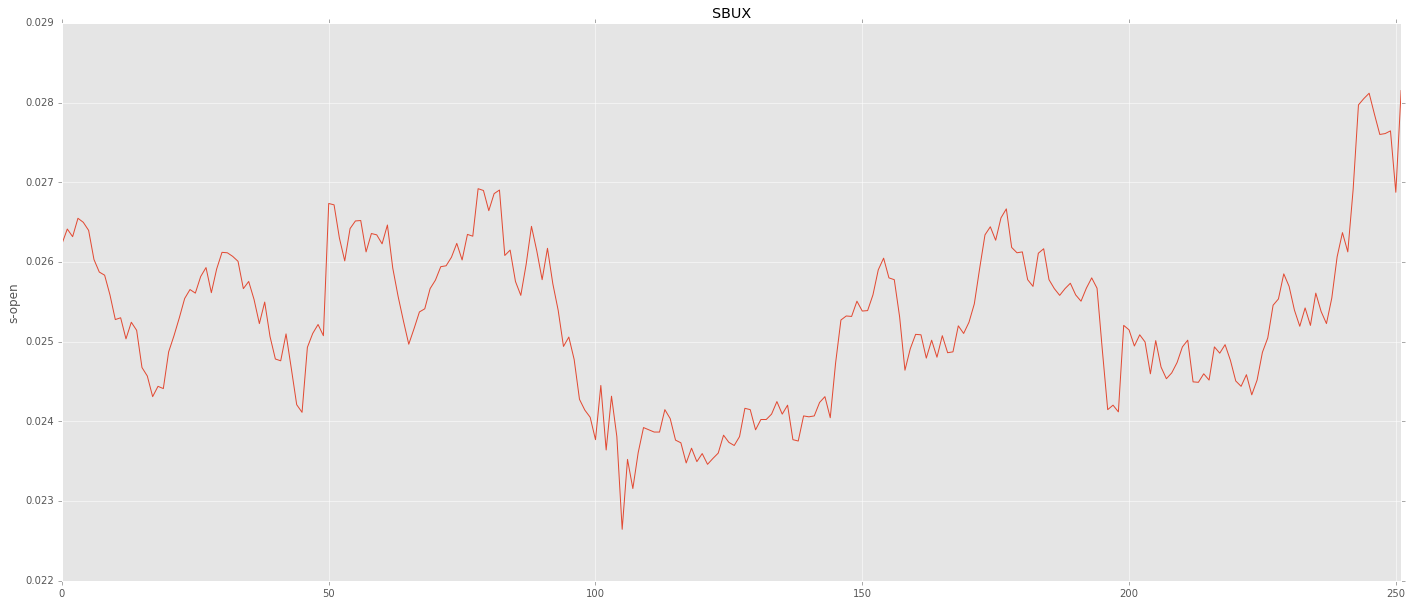

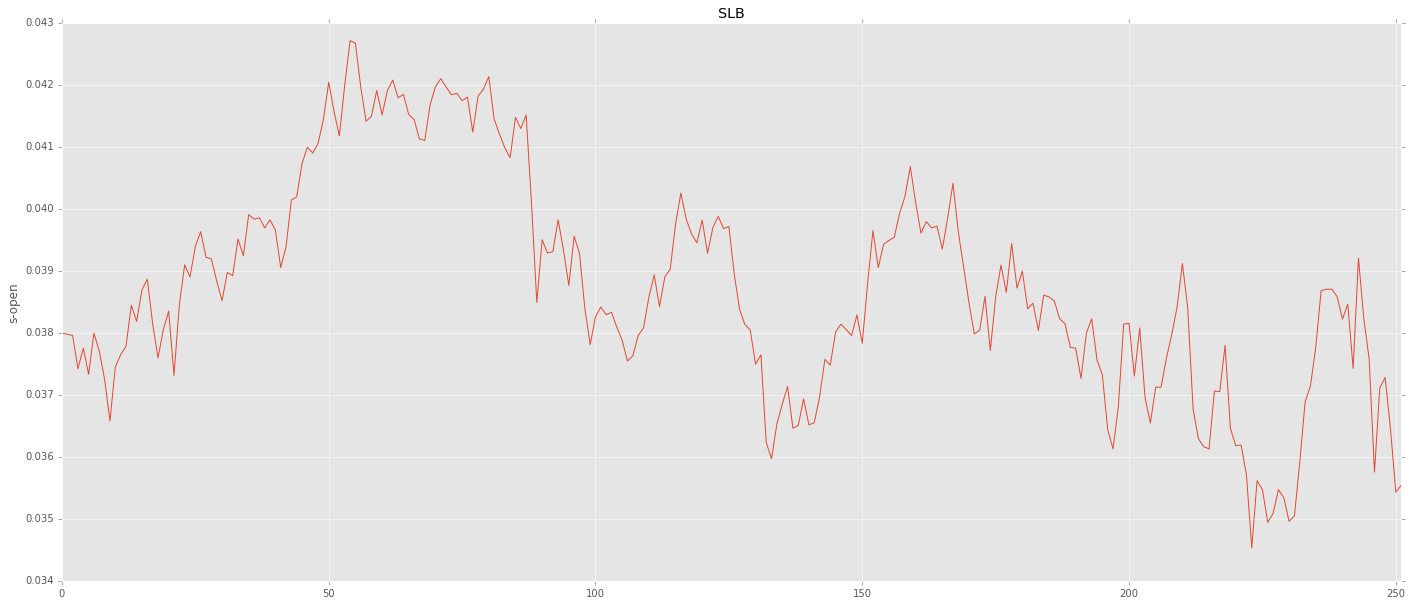

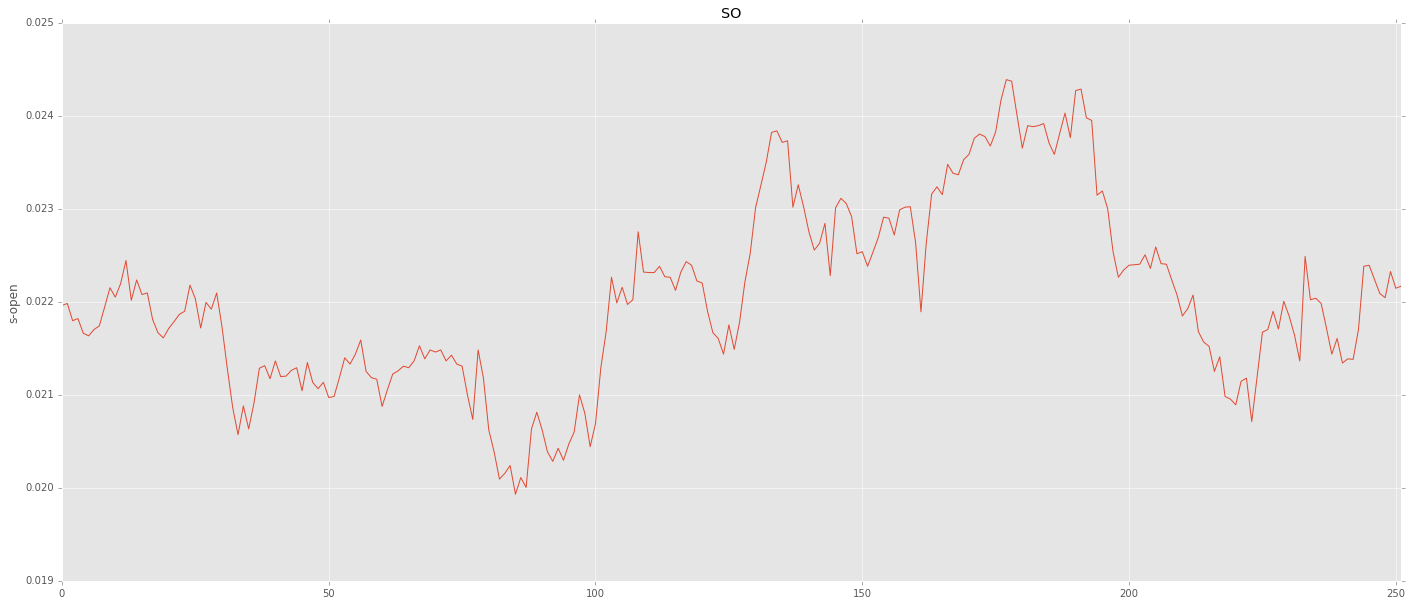

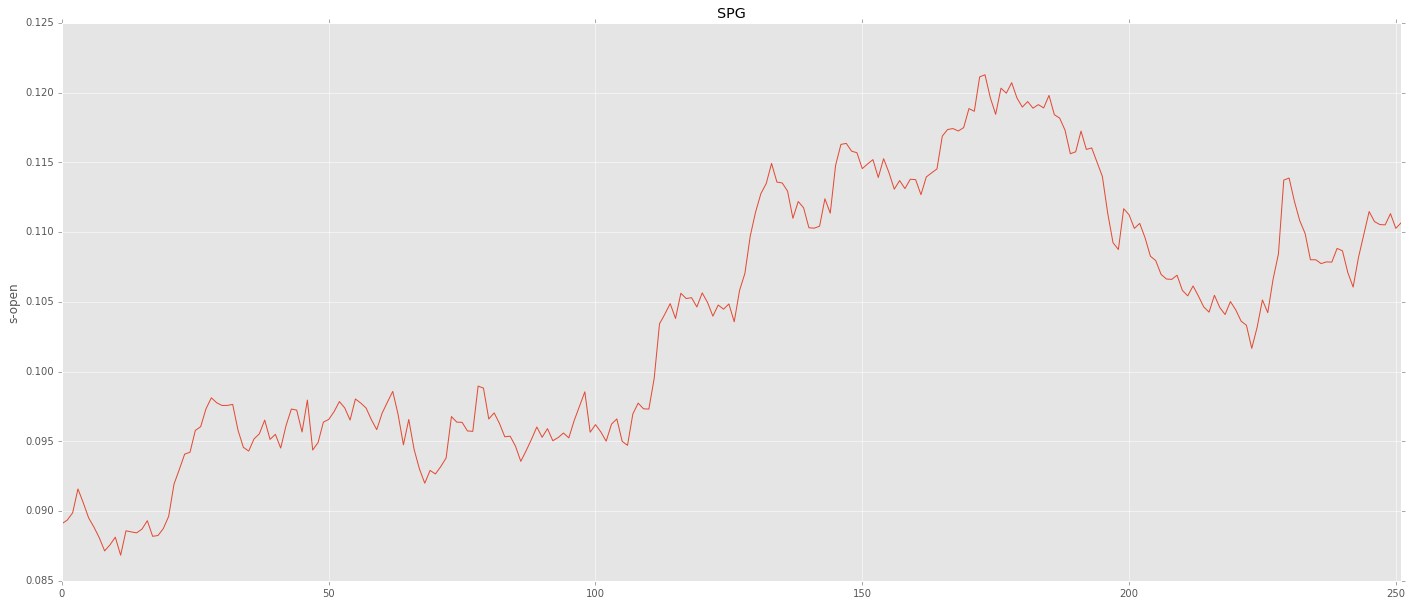

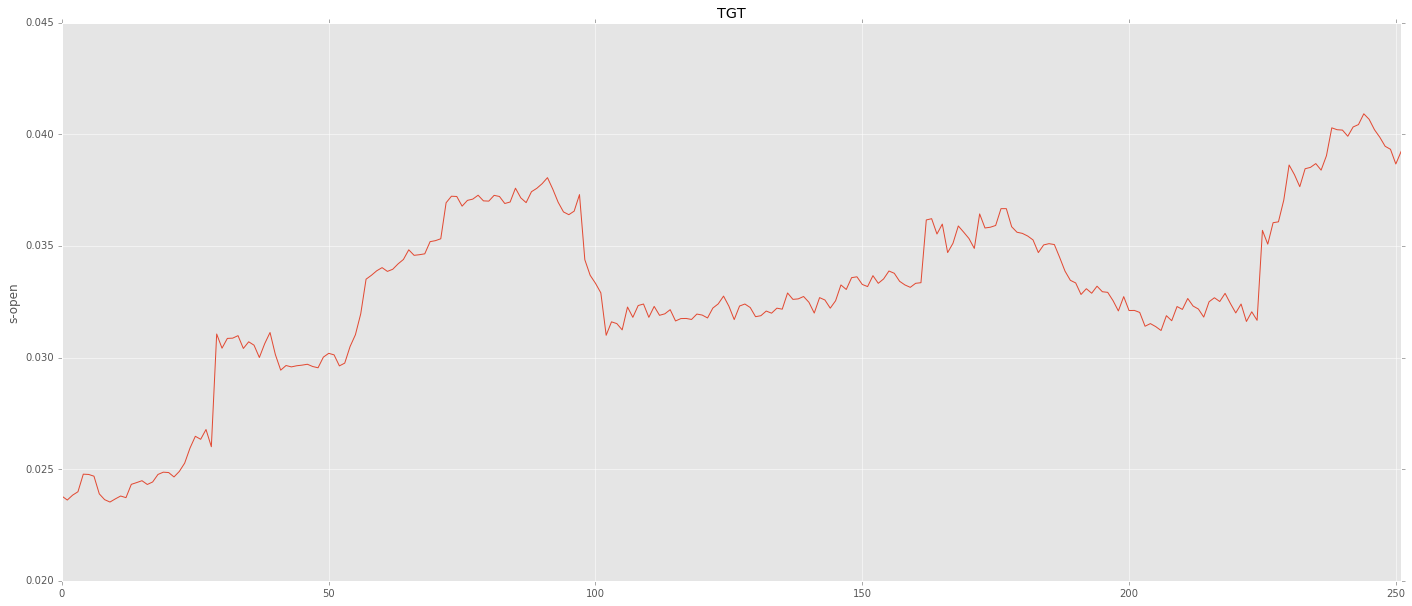

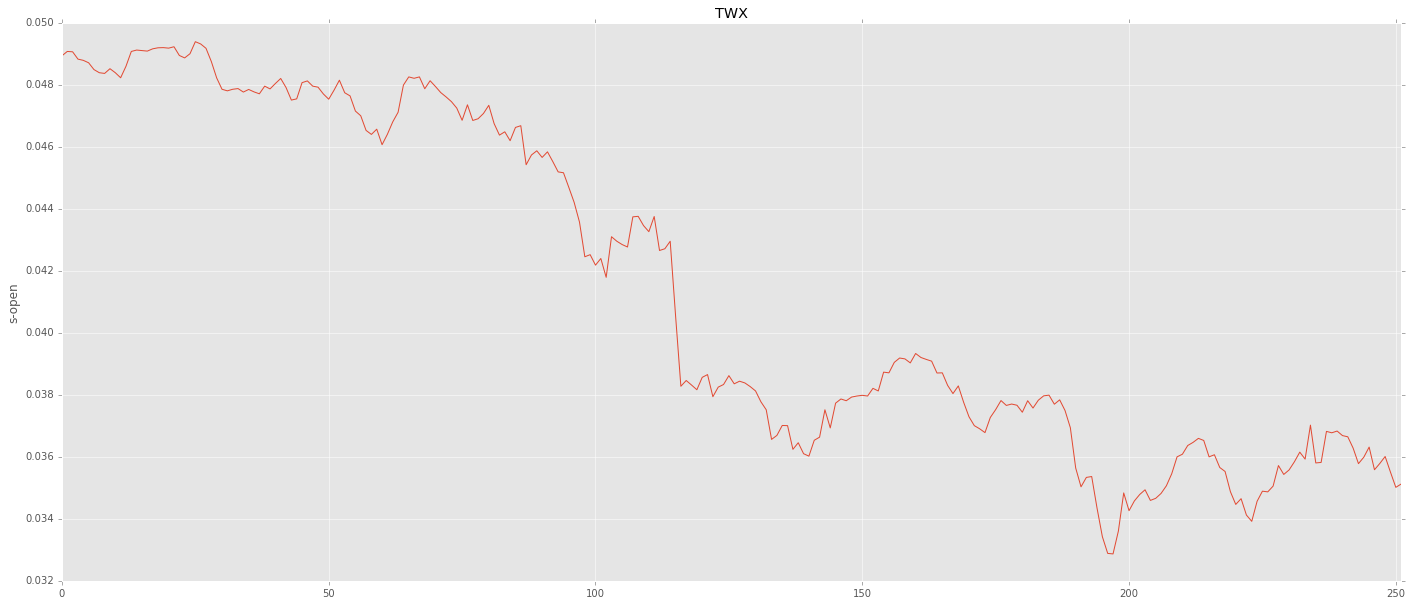

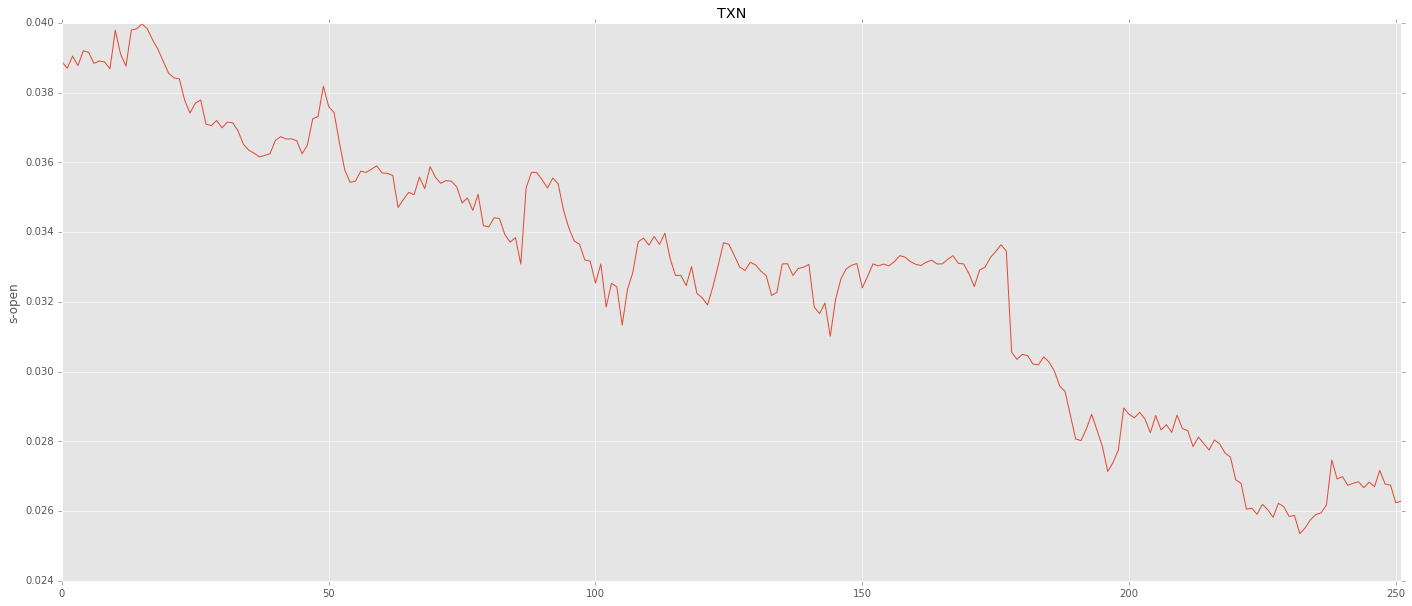

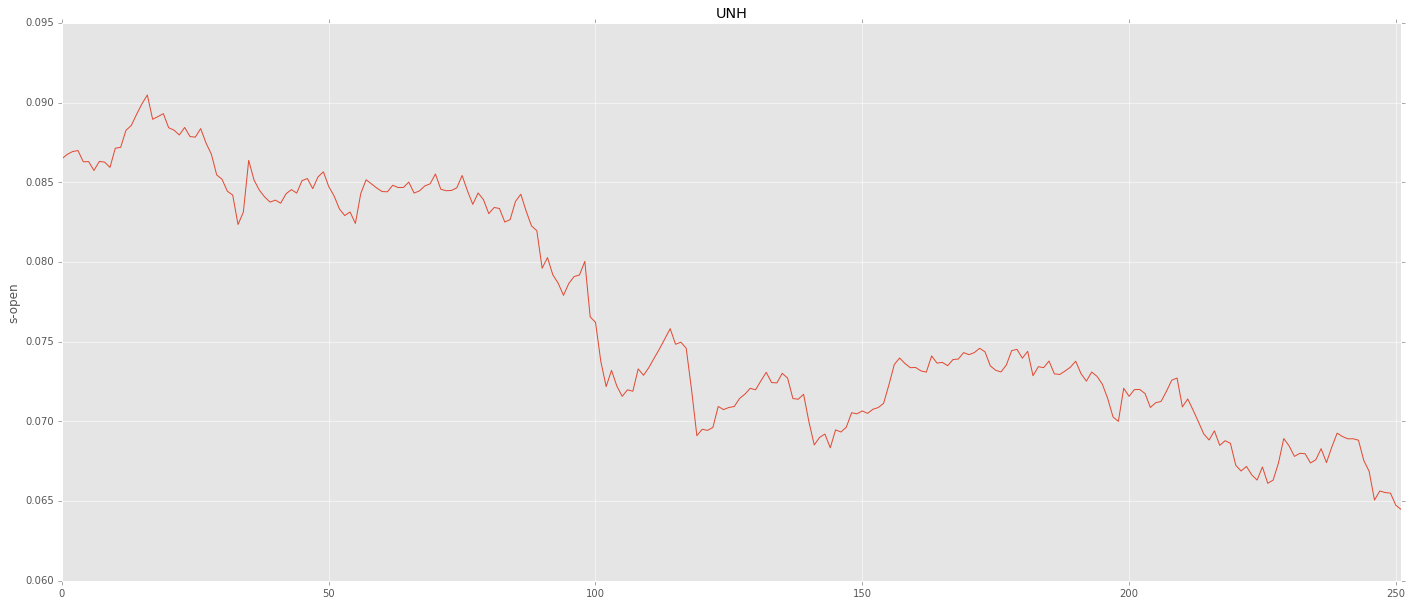

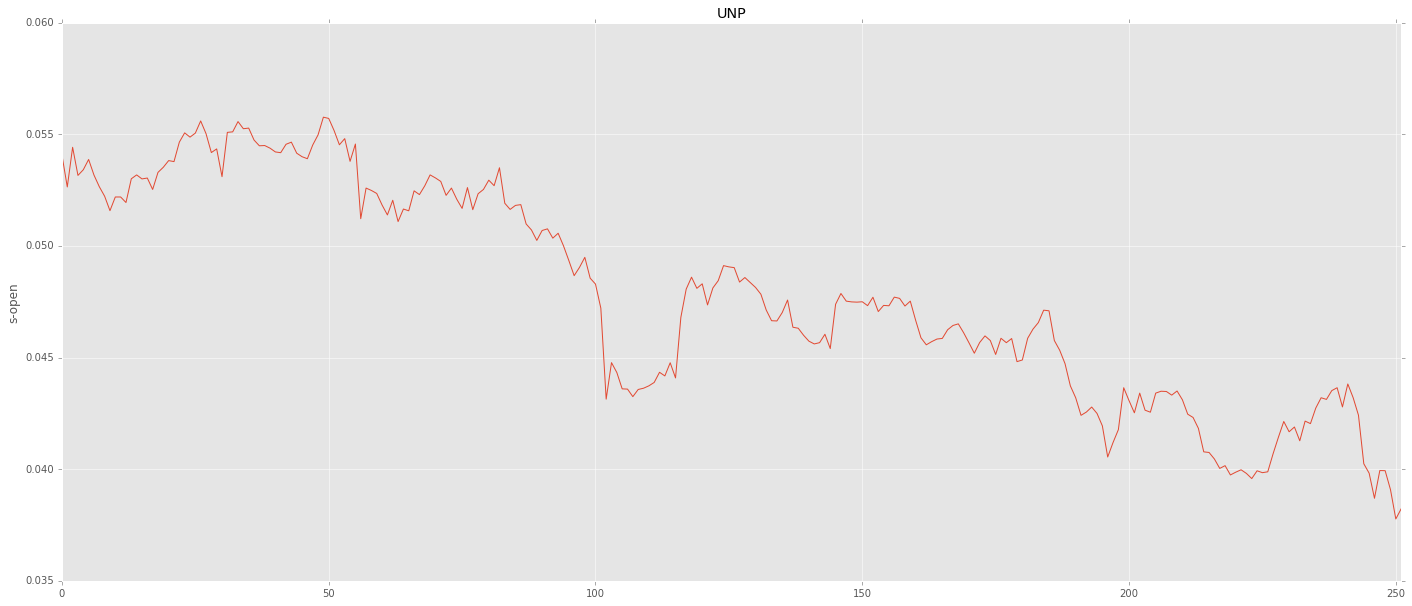

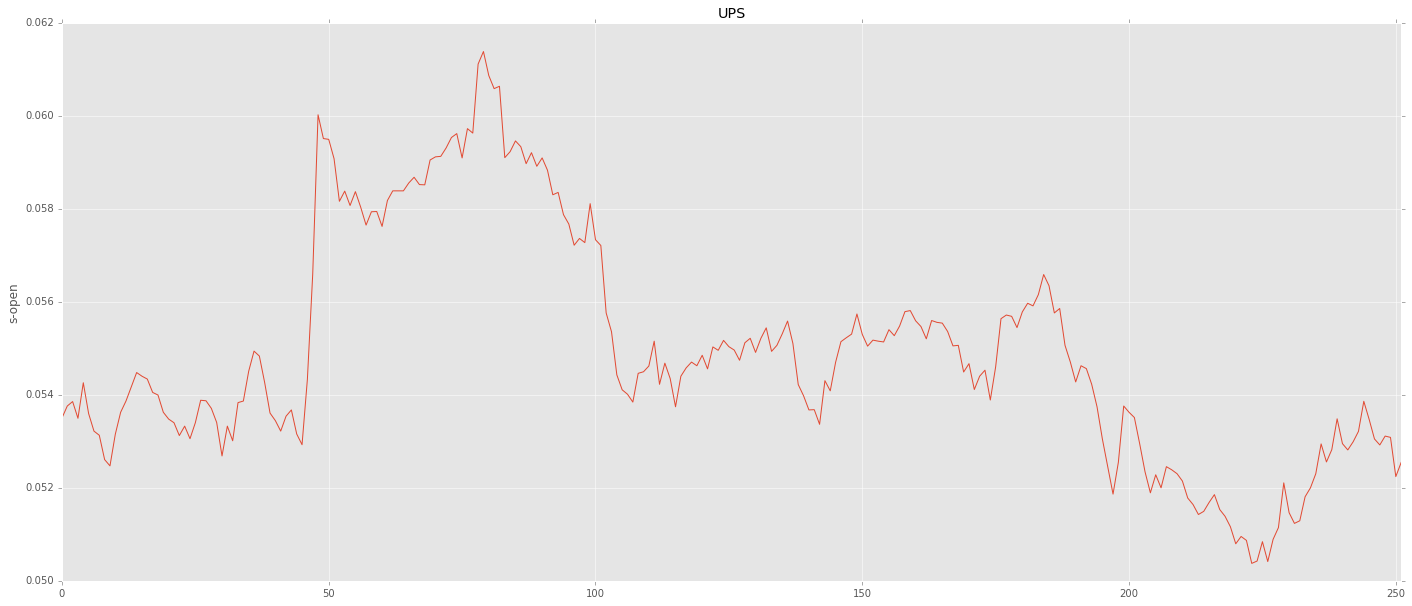

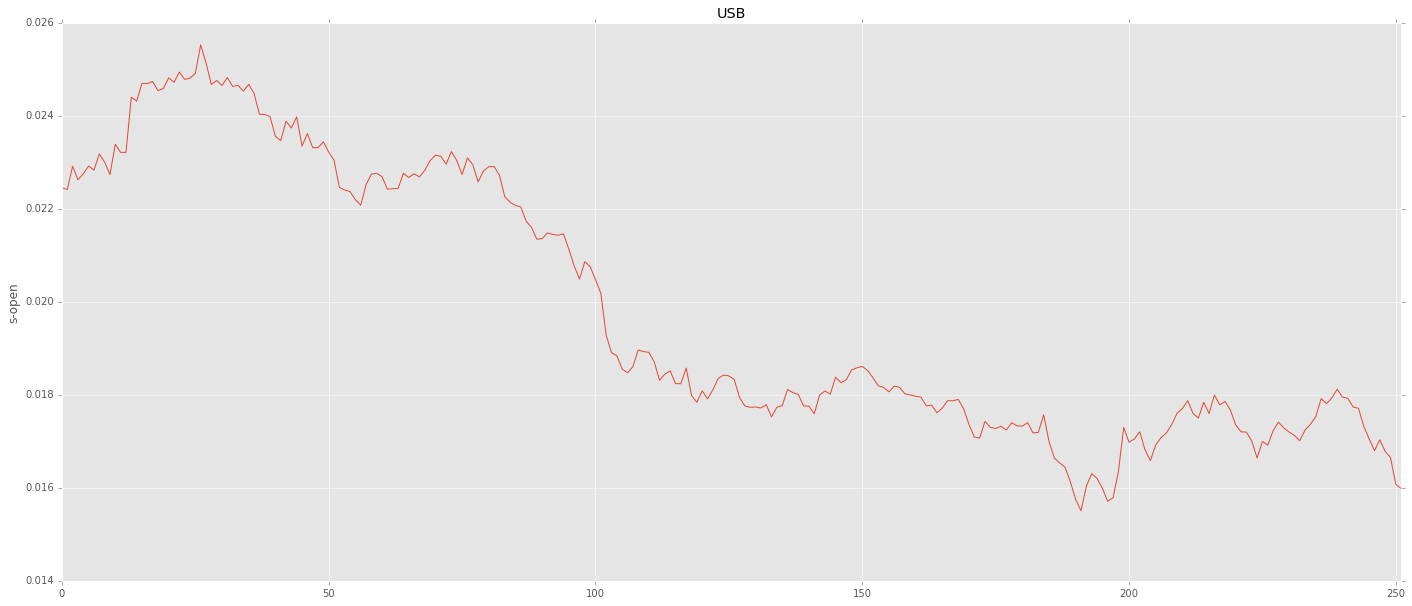

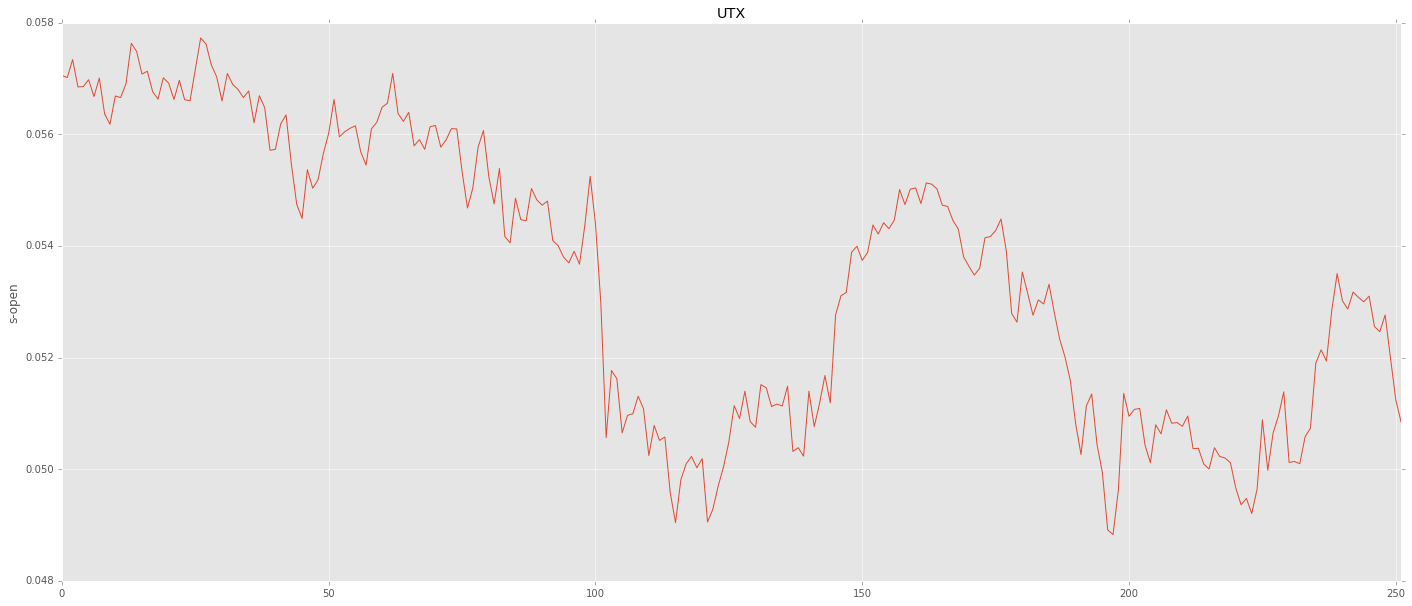

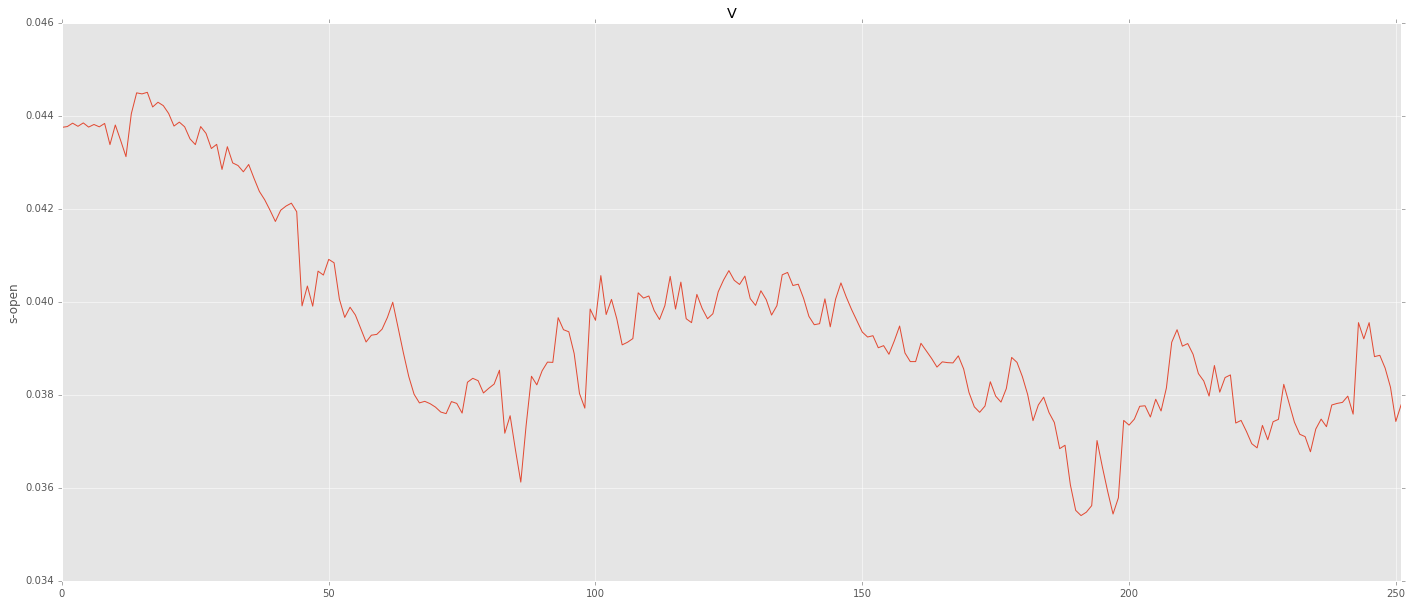

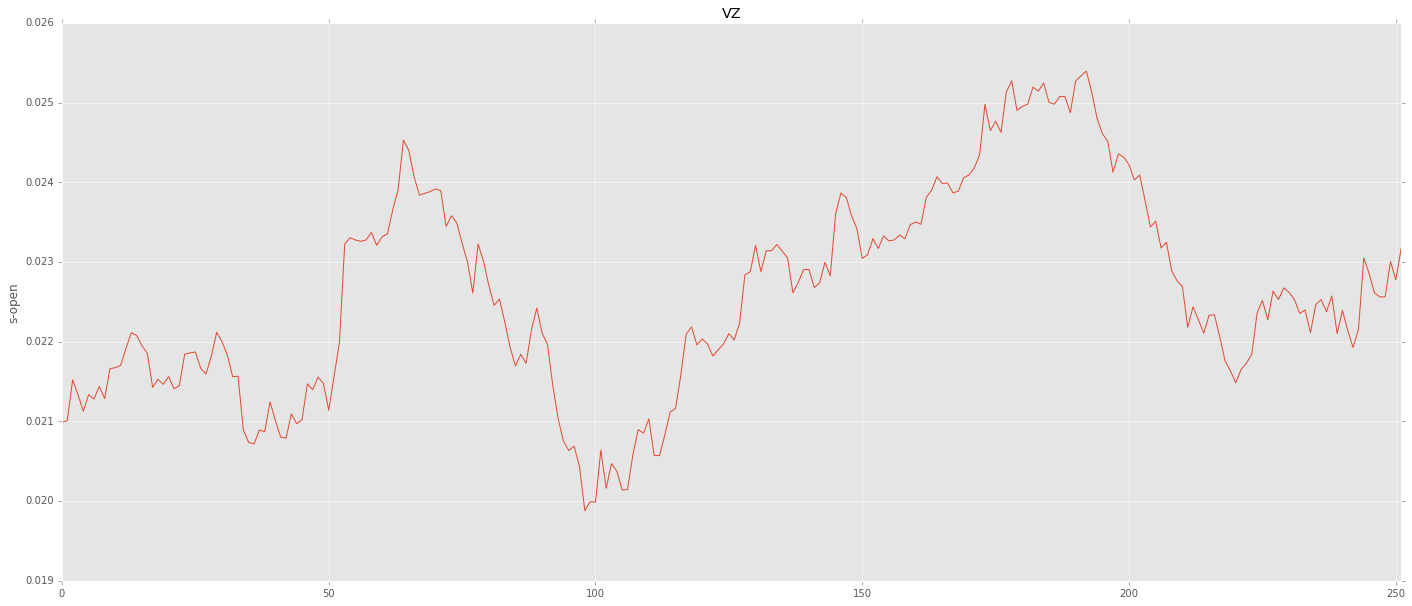

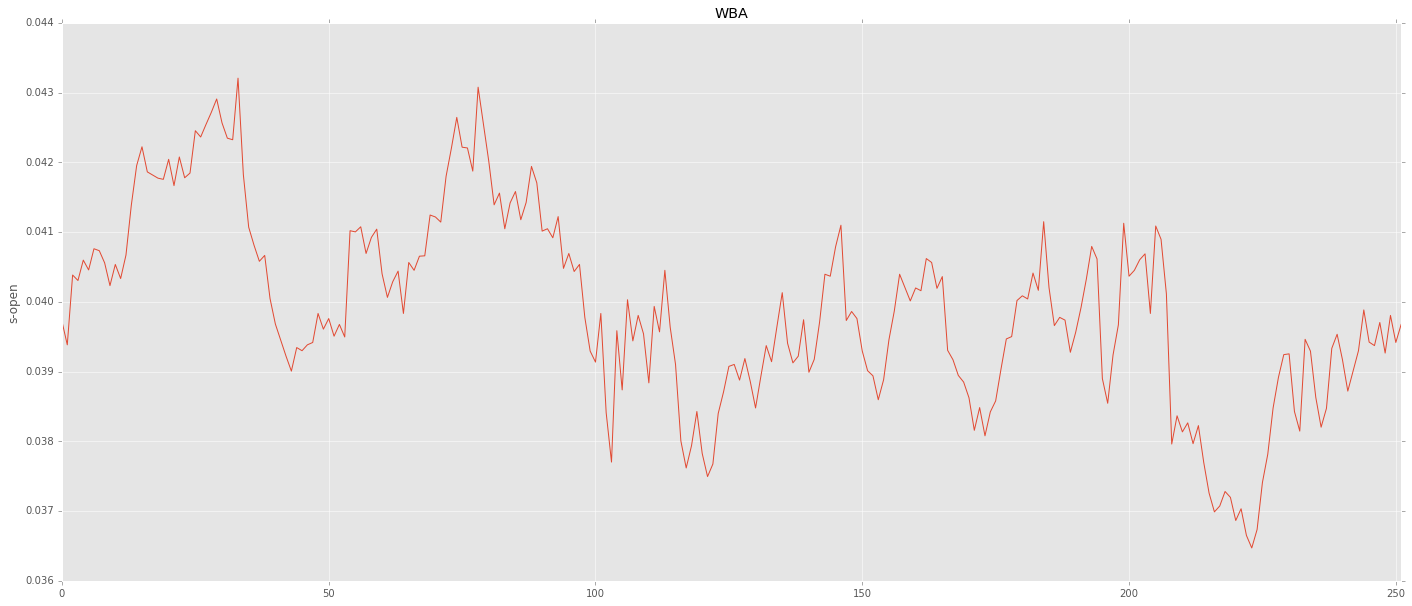

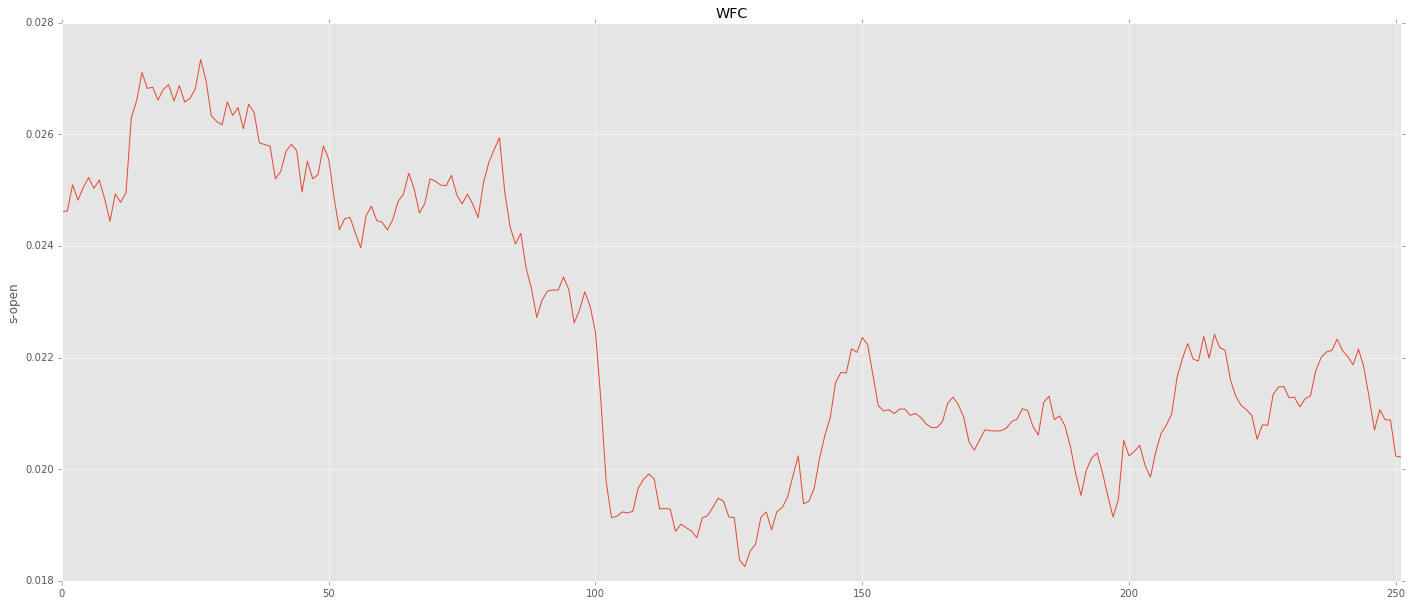

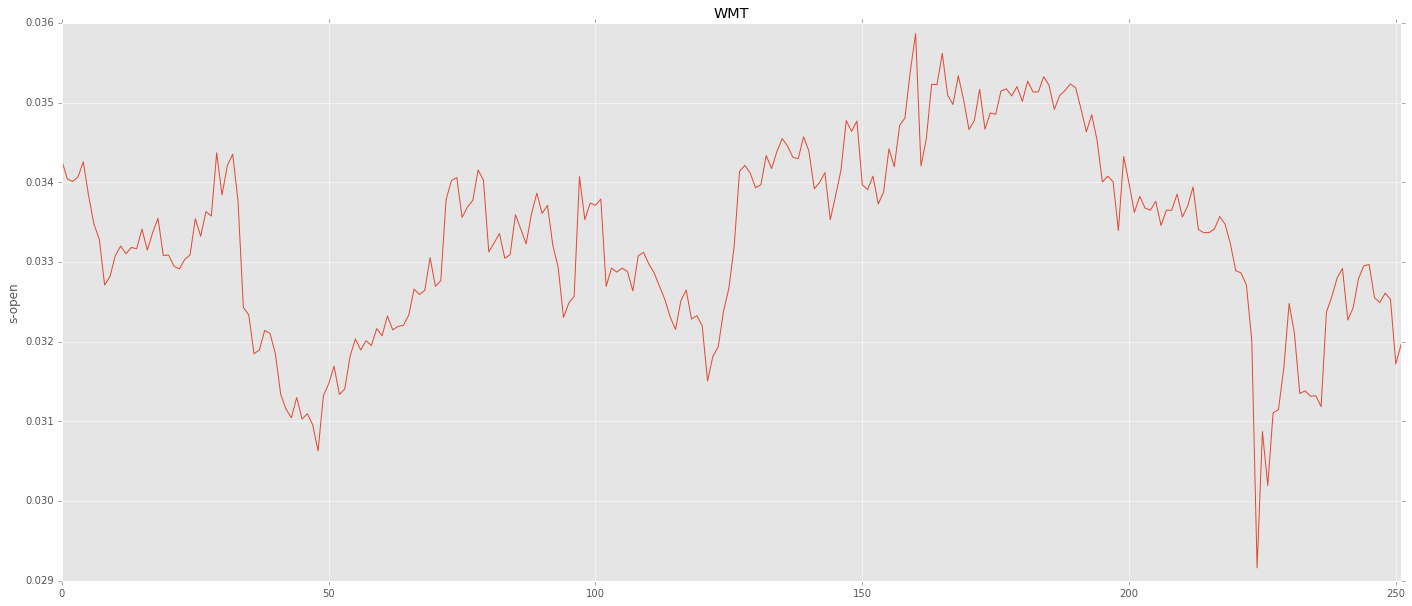

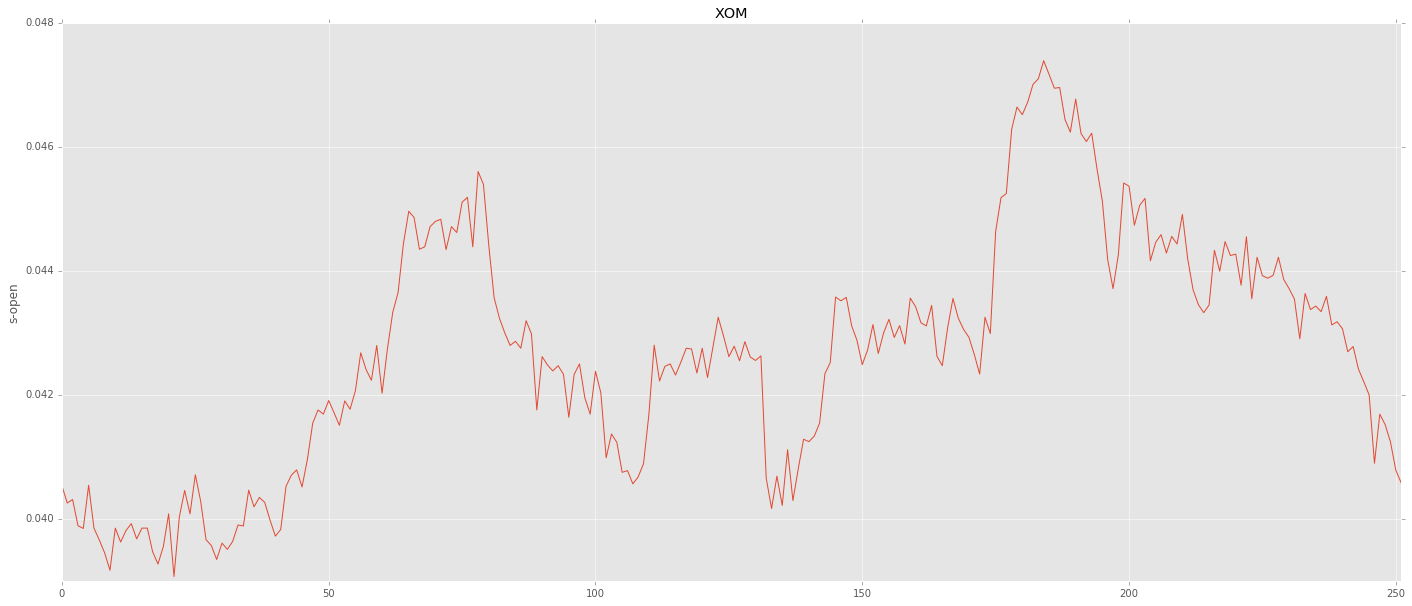

In [10]:


def build_graph(s_df):
    all_stock = s_df[s_df['idx'] == 0]['stock']
    for each_stock in all_stock:
    #     print code    
        plt.figure(figsize=(24,10))
        s_df[s_df['stock'] == each_stock]['s-open'].plot(kind="line")
        title(each_stock)
        ylabel('s-open')
    #     ylabel('sine and cosine values') % y-axis label
    #     legend('s-open')
    
build_graph(s_df)

In [12]:
def find_sum(xs, ys):
    return ((xs - ys)**2).sum()
def main(s_df):
    all_stock = s_df[s_df['idx'] == 0]['stock']
    all_stock = [i for i in all_stock]
    a = np.array(s_df[s_df['stock'] == all_stock[0]]['s-open'])
    b = np.array(s_df[s_df['stock'] == all_stock[43]]['s-open'])
    return 'sum of square errors = ',find_sum(a,b)
    
main(s_df)

('sum of square errors = ', 36.678339298223662)

In [30]:
all_stock = s_df[s_df['idx'] == 0]['stock']
all_stock = [i for i in all_stock]
def find_distance_matrix(all_stock):
    n = len(all_stock)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            cur_x = np.array(s_df[s_df['stock'] == all_stock[i]]['s-open'])
            cur_y = np.array(s_df[s_df['stock'] == all_stock[j]]['s-open'])
            dist = find_sum(cur_x,cur_y)
            distance_matrix[i,j] = dist
            distance_matrix[j,i] = dist
    return distance_matrix
distance_matrix = find_distance_matrix(all_stock)

In [36]:
def cluster(distance_matrix):
    clusters = KMeans().fit(distance_matrix)
    print 'there are 8 cluster that i observe',clusters.n_clusters
    predicted = clusters.predict(distance_matrix)
    cluster_dict = dict()
    for i in range(len(predicted)):
        if cluster_dict.get(predicted[i]) == None:
            cluster_dict[predicted[i]] = [all_stock[i]]
        else:
            cluster_dict[predicted[i]].append(all_stock[i])
    return cluster_dict
ans = cluster(distance_matrix)
ans

there are 8 cluster that i observe 8


{0: ['ABBV',
  'AIG',
  'ALL',
  'AXP',
  'BMY',
  'CAT',
  'CL',
  'COF',
  'CVS',
  'DD',
  'DHR',
  'DUK',
  'GILD',
  'JPM',
  'KHC',
  'LLY',
  'LOW',
  'MDT',
  'MO',
  'MRK',
  'MSFT',
  'OXY',
  'QCOM',
  'SLB',
  'TGT',
  'TWX',
  'TXN',
  'V',
  'WBA',
  'WMT',
  'XOM'],
 1: ['PCLN'],
 2: ['AMZN', 'GOOG', 'GOOGL'],
 3: ['AGN', 'BIIB'],
 4: ['AMGN', 'COST', 'FDX', 'GD', 'GS', 'IBM', 'MMM', 'RTN', 'SPG', 'UNH'],
 5: ['ABT',
  'BAC',
  'BK',
  'C',
  'CMCSA',
  'COP',
  'CSCO',
  'DOW',
  'EMR',
  'EXC',
  'F',
  'FOX',
  'FOXA',
  'GE',
  'GM',
  'HAL',
  'INTC',
  'KMI',
  'KO',
  'MDLZ',
  'MET',
  'MS',
  'NKE',
  'ORCL',
  'PFE',
  'PYPL',
  'SBUX',
  'SO',
  'USB',
  'VZ',
  'WFC'],
 6: ['BLK'],
 7: ['AAPL',
  'ACN',
  'CELG',
  'CVX',
  'DIS',
  'FB',
  'HD',
  'HON',
  'JNJ',
  'MA',
  'MCD',
  'MON',
  'NEE',
  'PEP',
  'UNP',
  'UPS',
  'UTX']}